# Testing the Pretrained Retrained Model

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Set-Up-Imports" data-toc-modified-id="Set-Up-Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Set-Up Imports</a></span></li><li><span><a href="#Load-Models" data-toc-modified-id="Load-Models-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Models</a></span><ul class="toc-item"><li><span><a href="#Load-Pretrained-Tokenizer" data-toc-modified-id="Load-Pretrained-Tokenizer-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load Pretrained Tokenizer</a></span></li><li><span><a href="#Load-Trained-Model" data-toc-modified-id="Load-Trained-Model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Load Trained Model</a></span></li><li><span><a href="#Create-Pipeline" data-toc-modified-id="Create-Pipeline-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Create Pipeline</a></span></li></ul></li><li><span><a href="#Testing-metaverse-politics-disinformation-society.txt" data-toc-modified-id="Testing-metaverse-politics-disinformation-society.txt-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Testing <code>metaverse-politics-disinformation-society.txt</code></a></span><ul class="toc-item"><li><span><a href="#Load-Dataset" data-toc-modified-id="Load-Dataset-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Load Dataset</a></span></li><li><span><a href="#Testing-the-Trained-Model" data-toc-modified-id="Testing-the-Trained-Model-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Testing the Trained Model</a></span></li><li><span><a href="#Annotate" data-toc-modified-id="Annotate-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Annotate</a></span></li></ul></li><li><span><a href="#Overkill" data-toc-modified-id="Overkill-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Overkill</a></span></li></ul></div>

## Set-Up Imports

In [1]:
from transformers import pipeline
from transformers import AutoTokenizer
from transformers import DataCollatorWithPadding
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
from transformers import PreTrainedModel
from transformers.pipelines.pt_utils import KeyDataset
import torch

from tqdm.auto import tqdm

from datasets import Dataset, DatasetDict, load_dataset
from datasets import load_metric

from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score

import pandas as pd
import numpy as np
import logging
from glob import glob
from os import path
import functools

from IPython.display import HTML, display

import spacy
from spacy import displacy

## Load Models

### Load Pretrained Tokenizer

In [2]:
model_checkpoint = "distilbert-base-uncased"
category_codes = dict(enumerate(['Claim', 'Concluding Statement', 'Counterclaim', 'Evidence', 'Lead', 'Position', 'Rebuttal']))
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)

### Load Trained Model

In [3]:
model_path = r"models_gitignored/distilbert-base-uncased-finetuned-sentence-classification/checkpoint-12626"
loaded_model = AutoModelForSequenceClassification.from_pretrained(model_path, id2label=category_codes)
loaded_model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
       

### Create Pipeline

In [4]:
pipe = pipeline("text-classification", model=loaded_model, tokenizer=tokenizer)
pipe

## Testing `metaverse-politics-disinformation-society.txt`

### Load Dataset

In [5]:
articles_dataset = load_dataset("text", data_files={"valid":[r"datagen/nytimes/metaverse-politics-disinformation-society.txt"]})['valid']

# filter out empty strings
articles_dataset = articles_dataset.filter(lambda example: example['text'])

articles_dataset[1]

Using custom data configuration default-af442e383791019f
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-af442e383791019f\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-af442e383791019f\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-e4ae27236b288068.arrow


{'text': 'In the metaverse, a user might curate a digital avatar, like a character in a video game. Through the eyes of their avatar, they would experience a digital reality as active and engaging as the physical one. Some futurists believe that soon we might attend doctor’s appointments or class there.'}

### Testing the Trained Model

In [6]:
lst = []
for i, out in enumerate(tqdm(pipe(KeyDataset(articles_dataset, "text")))):
    print(articles_dataset[i]['text'], out)
    lst.append((articles_dataset[i]['text'], out))

  0%|          | 0/21 [00:00<?, ?it/s]

The metaverse is coming. It was once a science-fiction fantasy, most notably in Neal Stephenson’s novel “Snow Crash,” of an all-encompassing virtual universe that would exist alongside the physical one. But technological advances have brought this transformation of human society close enough to reality to demand that we consider its consequences. {'label': 'Lead', 'score': 0.9138175845146179}
In the metaverse, a user might curate a digital avatar, like a character in a video game. Through the eyes of their avatar, they would experience a digital reality as active and engaging as the physical one. Some futurists believe that soon we might attend doctor’s appointments or class there. {'label': 'Evidence', 'score': 0.4578322768211365}
But while the metaverse could revolutionize work and play, it is essential to remain wary of the dangers that will emerge if it subsumes daily life. {'label': 'Rebuttal', 'score': 0.8579508066177368}
Virtual environments will supercharge disinformation campa

### Annotate

In [7]:
def displayAnnots(lst):
    df = pd.DataFrame([{"text":i, **j} for i, j in lst])
#     texts = []
#     labels = []
#     for text, label in df.loc[:, :"label"].values:
#         if len(labels):
#             if labels[-1] == label:
#                 texts[-1] += " "+text
#                 continue

#         texts.append(text)
#         labels.append(label)

#     df = pd.DataFrame({"text":texts, "label":labels})
    print(df)
    ents = functools.reduce(lambda lst, new: lst+[lst[-1]+len(new)], df.text, [0])
    df["start"] = ents[:-1]
    df["end"] = ents[1:]
    doc = {
        "text": df.text.sum(),
        "ents": [dict(start=int(row["start"]), end=int(row["end"]), label=row["label"]) for i, row in df.iterrows()],
        "title": "The Metaverse Is Coming, and the World Is Not Ready for It"
    }

    labels = ['Lead', 'Position', 'Evidence', 'Claim', 'Concluding Statement', 'Counterclaim', 'Rebuttal']
    colors = ["#ACDDDE", "#CAF1DE", "#E1F8DC", "#FEF8DD", "#FFE7C7", "#F7D8BA", "#D6CDEA"]
    options = {"ents": labels, "colors": dict(zip(labels, colors))}
    displacy.render(doc, style="ent", options=options, manual=True, jupyter=True)
    print('\n\n')
    return df



meta = displayAnnots(lst)

                                                 text     label     score
0   The metaverse is coming. It was once a science...      Lead  0.913818
1   In the metaverse, a user might curate a digita...  Evidence  0.457832
2   But while the metaverse could revolutionize wo...  Rebuttal  0.857951
3   Virtual environments will supercharge disinfor...  Evidence  0.730927
4   A failure to anticipate these possibilities ma...     Claim  0.484750
5   Today, glimpses of the metaverse are everywher...      Lead  0.699519
6   There’s already evidence that online multiplay...  Evidence  0.613328
7   The metaverse could allow motivated regimes or...  Evidence  0.683931
8   In environments where individuals can be repre...     Claim  0.549679
9   Digital espionage has already been used by doz...  Evidence  0.686262
10  Countries and corporations alike will likely a...     Claim  0.816655
11  States have already used facial recognition te...  Evidence  0.959065
12  Even the metaverse’s physical infr

In [8]:
df = pd.DataFrame([{"text":i, **j} for i, j in lst])
#     texts = []
#     labels = []
#     for text, label in df.loc[:, :"label"].values:
#         if len(labels):
#             if labels[-1] == label:
#                 texts[-1] += " "+text
#                 continue

#         texts.append(text)
#         labels.append(label)

#     df = pd.DataFrame({"text":texts, "label":labels})
ents = functools.reduce(lambda lst, new: lst+[lst[-1]+len(new)], df.text, [0])
df["start"] = ents[:-1]
df["end"] = ents[1:]
doc = {
    "text": df.text.sum(),
    "ents": [dict(start=int(row["start"]), end=int(row["end"]), label=row["label"]) for i, row in df.iterrows()],
    "title": "The Metaverse Is Coming, and the World Is Not Ready for It"
}

labels = ['Lead', 'Position', 'Evidence', 'Claim', 'Concluding Statement', 'Counterclaim', 'Rebuttal']
colors = ["#ACDDDE", "#CAF1DE", "#E1F8DC", "#FEF8DD", "#FFE7C7", "#F7D8BA", "#D6CDEA"]
options = {"ents": labels, "colors": dict(zip(labels, colors))}

html = displacy.render(doc, style="ent", options=options, manual=True)


In [9]:
meta["source"] = "metaverse-politics-disinformation-society"
pd.concat([meta, meta], ignore_index=True)

text     label     score  \
0   The metaverse is coming. It was once a science...      Lead  0.913818   
1   In the metaverse, a user might curate a digita...  Evidence  0.457832   
2   But while the metaverse could revolutionize wo...  Rebuttal  0.857951   
3   Virtual environments will supercharge disinfor...  Evidence  0.730927   
4   A failure to anticipate these possibilities ma...     Claim  0.484750   
5   Today, glimpses of the metaverse are everywher...      Lead  0.699519   
6   There’s already evidence that online multiplay...  Evidence  0.613328   
7   The metaverse could allow motivated regimes or...  Evidence  0.683931   
8   In environments where individuals can be repre...     Claim  0.549679   
9   Digital espionage has already been used by doz...  Evidence  0.686262   
10  Countries and corporations alike will likely a...     Claim  0.816655   
11  States have already used facial recognition te...  Evidence  0.959065   
12  Even the metaverse’s physical infrastructure w...     Claim  0.963662   
13  A constellation of technologies, including har...  Evidence  0.870708   
14  China could effectively control the metaverse’...  Evidence  0.893361   
15  This kind of physical infrastructure will, in ...  Evidence  0.863372   
16  Despite these threats, the metaverse also has ...  Rebuttal  0.626262   
17  Virtual environments have also shown promise f...  Evidence  0.980946   
18  But the metaverse’s consequences may be even m...  Rebuttal  0.859729   
19  If it becomes as all-encompassing as some pred...  Evidence  0.821782   
20  The metaverse may have been born in science fi...  Position  0.460967   
21  The metaverse is coming. It was once a science...      Lead  0.913818   
22  In the metaverse, a user might curate a digita...  Evidence  0.457832   
23  But while the metaverse could revolutionize wo...  Rebuttal  0.857951   
24  Virtual environments will supercharge disinfor...  Evidence  0.730927   
25  A failure to anticipate these possibilities ma...     Claim  0.484750   
26  Today, glimpses of the metaverse are everywher...      Lead  0.699519   
27  There’s already evidence that online multiplay...  Evidence  0.613328   
28  The metaverse could allow motivated regimes or...  Evidence  0.683931   
29  In environments where individuals can be repre...     Claim  0.549679   
30  Digital espionage has already been used by doz...  Evidence  0.686262   
31  Countries and corporations alike will likely a...     Claim  0.816655   
32  States have already used facial recognition te...  Evidence  0.959065   
33  Even the metaverse’s physical infrastructure w...     Claim  0.963662   
34  A constellation of technologies, including har...  Evidence  0.870708   
35  China could effectively control the metaverse’...  Evidence  0.893361   
36  This kind of physical infrastructure will, in ...  Evidence  0.863372   
37  Despite these threats, the metaverse also has ...  Rebuttal  0.626262   
38  Virtual environments have also shown promise f...  Evidence  0.980946   
39  But the metaverse’s consequences may be even m...  Rebuttal  0.859729   
40  If it becomes as all-encompassing as some pred...  Evidence  0.821782   
41  The metaverse may have been born in science fi...  Position  0.460967   

    start   end                                     source  
0       0   348  metaverse-politics-disinformation-society  
1     348   642  metaverse-politics-disinformation-society  
2     642   790  metaverse-politics-disinformation-society  
3     790  1177  metaverse-politics-disinformation-society  
4    1177  1323  metaverse-politics-disinformation-society  
5    1323  1708  metaverse-politics-disinformation-society  
6    1708  1954  metaverse-politics-disinformation-society  
7    1954  2188  metaverse-politics-disinformation-society  
8    2188  2399  metaverse-politics-disinformation-society  
9    2399  2752  metaverse-politics-disinformation-society  
10   2752  2885  metaverse-politics-disinformation-society  
11   

## Overkill

In [14]:
dfs = []

for filename in glob("datagen/nytimes/*.txt"):
    try:
        name = filename.split("/")[-1].split("\\")[-1]
        display(HTML("<h2>"+name+"</h2>"))
        articles_dataset = load_dataset("text", data_files={"valid":[filename]})['valid'].filter(lambda example: example['text'])
        lst = []
        for i, out in enumerate(tqdm(pipe(KeyDataset(articles_dataset, "text")))):
            print(articles_dataset[i]['text'], out)
            lst.append((articles_dataset[i]['text'], out))

        df = displayAnnots(lst)
        df["source"] = name
        dfs.append(df)
    except UnicodeDecodeError: print("UnicodeDecodeError")

Using custom data configuration default-c7f59a738d9c36bc
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-c7f59a738d9c36bc\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-c7f59a738d9c36bc\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-de0874ee69439509.arrow


  0%|          | 0/11 [00:00<?, ?it/s]

In 2019 a wave of anti-abortion laws swept this country — a common enough event in the United States, where hundreds of such laws have passed during the last decade. But these grabbed the public’s attention in a way many others hadn’t. Georgia banned abortion after about six weeks of pregnancy, or about two weeks after a missed menstrual period. Ohio, Mississippi, Louisiana and Kentucky did the same, while Missouri banned the procedure at eight weeks. Alabama went the furthest, banning virtually all abortions in the state. {'label': 'Evidence', 'score': 0.9837203025817871}
Though most of these laws were quickly blocked by the courts — they were obviously unconstitutional under Roe v. Wade — the backlash to their passing was intense, especially in Georgia, a major hub of film and television production. Boycotts were threatened. Netflix and Disney spoke out. The actress Alyssa Milano even tried to get a “Lysistrata”-style sex strike off the ground. {'label': 'Evidence', 'score': 0.934319

Using custom data configuration default-cb56c9191ae0b312
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-cb56c9191ae0b312\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-cb56c9191ae0b312\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-417af39066938978.arrow


  0%|          | 0/44 [00:00<?, ?it/s]

When Chris Lawson began dating Alexandra Salamis, the woman who would eventually become his partner, he was “Mr. Super Attentive Dude,” he said, the type of guy who enjoyed buying cards and flowers for no reason other than to show how much he loved her. {'label': 'Evidence', 'score': 0.7563069462776184}
But after they moved in together in 2015, things changed. {'label': 'Rebuttal', 'score': 0.8570256233215332}
He became more distracted and forgetful. Whether it was chores, planning social events or anything deadline-driven — like renewing a driver’s license — Ms. Salamis, 60, had to continually prod Mr. Lawson to get things done. Invariably, she just ended up doing them herself. {'label': 'Evidence', 'score': 0.9713975191116333}
“I was responsible for nothing,” Mr. Lawson, 55, admitted. {'label': 'Claim', 'score': 0.36051705479621887}
Ms. Salamis, who is not one to mince words, described that period of their relationship as “like living with a child,” later adding, “I hated him, frankl

It is within your right to insist that your partner get the kids to school on time, for example, and ideally you will find a way to make that happen. But, Dr. Tuckman cautioned, “you only get a small number of deal breakers.” {'label': 'Evidence', 'score': 0.6487324237823486}
Experts agree that medication alone is not the best way to manage A.D.H.D., but it can complement other strategies like cognitive behavioral therapy, coaching, mindfulness and exercise. {'label': 'Claim', 'score': 0.2920837700366974}
It wasn’t until he had been married for 16 years that Taylor Weeks, 36, finally realized that A.D.H.D. had been at the root of so much of the discord between him and his wife. {'label': 'Evidence', 'score': 0.4984033703804016}
As far back as he can remember, he struggled with time blindness and forgetfulness, continually dropping the ball and then chastising himself for it. {'label': 'Claim', 'score': 0.4741550087928772}
“It has always been kind of a huge stressor for my wife,” said M

Using custom data configuration default-2b3776106cac8ff7
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-2b3776106cac8ff7\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-2b3776106cac8ff7\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-daef8b9b32b920de.arrow


  0%|          | 0/13 [00:00<?, ?it/s]

KABUL, Afghanistan — A young boy died on Friday after being trapped in a well for several days in southern Afghanistan, Taliban officials said, heralding a tragic end to a round-the-clock rescue effort led by officials at the highest levels of the country’s new government. {'label': 'Evidence', 'score': 0.9430404305458069}
The boy, Haidar Jan, who was thought to be 5, fell into a roughly 85-foot-deep well on Tuesday in a village near Qalat, the capital of Zabul Province. By Thursday, rescuers had sent cameras and ropes down the barely foot-wide borehole to no avail, in a scene reminiscent of an effort in Morocco this month. {'label': 'Evidence', 'score': 0.9705137014389038}
Around the time they discovered that Haidar was not moving, officials said, they began digging into the earth around the scene. {'label': 'Evidence', 'score': 0.49000027775764465}
“Zabul officials, in coordination with Kabul officials and the Zabul municipality, worked for about 70 hours and used various tools and e

Using custom data configuration default-ccdc3eaf2e53c191
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-ccdc3eaf2e53c191\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-ccdc3eaf2e53c191\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-0eb4a93aec33ee65.arrow


  0%|          | 0/17 [00:00<?, ?it/s]

On Aug. 10, 2021, days before the collapse of Afghanistan’s government, Fawad Khan Safi arrived in the United States to begin his new life. {'label': 'Claim', 'score': 0.3872610032558441}
Mr. Safi, who previously worked as a contractor for the United States Agency for International Development in Afghanistan, had waited an agonizing 12 months to receive his Special Immigrant Visa, or S.I.V., and make it to Texas. His ordeal lasted several months longer than the maximum nine-month visa processing period mandated by law — and yet, Mr. Safi is one of the lucky ones. {'label': 'Evidence', 'score': 0.9845075607299805}
Around 60,000 Afghans who have worked with American forces and applied for visas remain in Afghanistan — many probably starving and on the run from the Taliban. Few, if any visas have ever been approved within that nine-month timeline. The system is clearly broken. {'label': 'Evidence', 'score': 0.9513683915138245}
Despite the disturbing images of last summer’s evacuation, the

Using custom data configuration default-778e2b27e9938a44
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-778e2b27e9938a44\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-778e2b27e9938a44\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-c2342b5c58d7916b.arrow


  0%|          | 0/22 [00:00<?, ?it/s]

BRUNSWICK, Ga. — Defense lawyers in the hate crimes trial of the three white men convicted of murdering Ahmaud Arbery rested their case on Friday after calling just a single witness. {'label': 'Evidence', 'score': 0.7033983469009399}
None of the defendants — Travis McMichael, his father, Gregory McMichael, and their neighbor William Bryan — took the stand in their own defense. {'label': 'Evidence', 'score': 0.420257031917572}
The men were convicted in state court last year of chasing Mr. Arbery through their South Georgia neighborhood and murdering him. All three were sentenced to life in prison. In the federal trial, they stand accused of pursuing and killing Mr. Arbery specifically because he was Black. {'label': 'Evidence', 'score': 0.9846514463424683}
On Friday, only the lawyer for Gregory McMichael presented evidence to the jury, in an attempt to buttress the defense’s central argument that the men chased Mr. Arbery because they suspected him of committing burglaries in the area, 

Using custom data configuration default-1e3e75405d1657ae
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-1e3e75405d1657ae\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-1e3e75405d1657ae\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-fd55efe037cf97bf.arrow


  0%|          | 0/23 [00:00<?, ?it/s]

This spring, Philips Pham was among the more than 12,000 people in 148 countries who took an online class called Code in Place. Run by Stanford University, the course taught the fundamentals of computer programming. {'label': 'Evidence', 'score': 0.6869553923606873}
Four weeks in, Mr. Pham, a 23-year-old student living at the southern tip of Sweden, typed his way through the first test, trying to write a program that could draw waves of tiny blue diamonds across a black-and-white grid. Several days later, he received a detailed critique of his code. {'label': 'Evidence', 'score': 0.8989871144294739}
It applauded his work, but also pinpointed an error. “Seems like you have a small mistake,” the critique noted. “Perhaps you are running into the wall after drawing the third wave.” {'label': 'Evidence', 'score': 0.36042529344558716}
The feedback was just what Mr. Pham needed. And it came from a machine. {'label': 'Claim', 'score': 0.7571551203727722}
During this online class, a new kind of

Using custom data configuration default-43c527e43a46eb96
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-43c527e43a46eb96\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-43c527e43a46eb96\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-91531cd381e8d63f.arrow


  0%|          | 0/11 [00:00<?, ?it/s]

The early 1990s were in many ways the most terrible of those first years of the AIDS epidemic in America. Research on the disease was in high gear, but drug after drug failed to stop H.I.V. Funerals for friends and family in their 20s, 30s, 40s and 50s continued unabated, and many of us at risk for getting sick had given up hope of a normal life. My friends and I, most of us just a few years out of college, lived in the moment because we weren’t sure of how much time we had left. {'label': 'Evidence', 'score': 0.9077416062355042}
My cousin Carl died from AIDS-related lymphoma in July 1995. That was also the year I found out that I, too, was H.I.V. positive. I wondered if Carl’s fate might be my own soon enough. {'label': 'Evidence', 'score': 0.9147146940231323}
But then we got lucky. In 1996 a new generation of treatments called protease inhibitors emerged that were able to control H.I.V. Doctors talked about the Lazarus effect: watching their patients go from near death to health. I e

Using custom data configuration default-36b949763b8cdb73
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-36b949763b8cdb73\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-36b949763b8cdb73\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-fe1c69b0acebb843.arrow


  0%|          | 0/37 [00:00<?, ?it/s]

On a Saturday in March 2020, as Covid-19 was invading the United States, Gov. Andrew M. Cuomo went on CNN for a live interview. Among other topics, he was asked about a possible government-enforced quarantine of New York that had been floated by President Donald J. Trump. {'label': 'Evidence', 'score': 0.6625468134880066}
It was a newsworthy topic, but its path onto viewers’ screens would turn out to be controversial — and highly consequential for the future of one of the world’s most powerful news networks. {'label': 'Claim', 'score': 0.4195939302444458}
Before the interview, Governor Cuomo had told a senior CNN executive, Allison Gollust, about subjects that he’d like to be asked about on air, according to several people familiar with the matter. Ms. Gollust, CNN’s longtime chief of communications and marketing and a former top aide of the governor, passed along the topics to CNN producers and then reported back to the governor. {'label': 'Evidence', 'score': 0.9698039293289185}
“Don

The internal investigation’s findings are especially notable because CNN journalists have repeatedly attacked Fox News personalities like Sean Hannity for having an overly close relationship with Republican leaders, in particular Mr. Trump. {'label': 'Evidence', 'score': 0.5319948196411133}
Mr. Trump, in turn, repeatedly accused CNN of being a mouthpiece for Democrats. {'label': 'Claim', 'score': 0.559249222278595}
                                                 text     label     score
0   On a Saturday in March 2020, as Covid-19 was i...  Evidence  0.662547
1   It was a newsworthy topic, but its path onto v...     Claim  0.419594
2   Before the interview, Governor Cuomo had told ...  Evidence  0.969804
3                                  “Done,” she wrote.     Claim  0.666134
4   On Tuesday, Ms. Gollust was forced to resign f...  Evidence  0.922566
5   The episode is the latest example of how close...     Claim  0.724356
6   Producers and bookers for television news show...  Evidence

Using custom data configuration default-7eb9ee19cf97a818
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-7eb9ee19cf97a818\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-7eb9ee19cf97a818\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-2d691d9400e03285.arrow


  0%|          | 0/35 [00:00<?, ?it/s]

On a Monday morning in February, Harry Hill, 27, showed up at the American Girl Cafe wearing a vintage Christian Dior sweater and carrying a Coach tote that held two of his beloved dolls. He was joined by Serena Kerrigan, 27, who brought her dolls in a pink mesh Victoria’s Secret bag. {'label': 'Evidence', 'score': 0.9235830307006836}
Mr. Hill, an influencer, is well documented as a fan: He has posed at a 7-Eleven dressed identically to one of his dolls on Instagram. He dressed as the Samantha doll for Halloween and created a series of memes made with American Girl dolls. {'label': 'Evidence', 'score': 0.9538633227348328}
Ms. Kerrigan, also an influencer, was dressed by her stylist in “head-to-toe Zara” — a Kelly green skirt suit with feather cuffs. “I am the green M&M,” she said of her outfit. Like the previous iteration of the green M&M character, Ms. Kerrigan’s personal brand can be ribald. {'label': 'Evidence', 'score': 0.9536901712417603}
The last time she and Mr. Hill came to Ame

A server emerged from the kitchen carrying a birthday cake shaped like a giant petit four. Mx. Flitton and the rest of the party erupted in applause. {'label': 'Lead', 'score': 0.5359991192817688}
The cheers died down as the waiter walked past the table. The cake was for someone seated behind them who was celebrating her ninth birthday. {'label': 'Evidence', 'score': 0.7414999604225159}
                                                 text     label     score
0   On a Monday morning in February, Harry Hill, 2...  Evidence  0.923583
1   Mr. Hill, an influencer, is well documented as...  Evidence  0.953863
2   Ms. Kerrigan, also an influencer, was dressed ...  Evidence  0.953690
3   The last time she and Mr. Hill came to America...  Evidence  0.603045
4   The two were far from the first adults to show...     Claim  0.620466
5   “Come with me to get absolutely obliterated at...  Evidence  0.499030
6   In the video, Ms. Griffin, 25, shouts out the ...  Evidence  0.961516
7   Ms. Griffin wa

Using custom data configuration default-7bfce597a2e65be1
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-7bfce597a2e65be1\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-7bfce597a2e65be1\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-ffec955b0d0c5d84.arrow


  0%|          | 0/23 [00:00<?, ?it/s]

LONDON — In a royal family where scandal seems to rotate among its members with nearly metronomic regularity, one might have predicted that Tuesday’s news that Prince Andrew had settled a sexual abuse lawsuit against him would soon be followed by a fresh, troubling disclosure about another royal. {'label': 'Evidence', 'score': 0.7766624093055725}
Sure enough, not 24 hours later, London’s Metropolitan Police announced an investigation into allegations that a charity led by Prince Charles offered to help with a knighthood and British citizenship for a wealthy Saudi in return for a donation. A spokesman for Charles insisted that he had no knowledge of any deal. {'label': 'Evidence', 'score': 0.7256741523742676}
For Queen Elizabeth II, it was a fraught start to a year that is supposed to celebrate her seven decades on the throne. And yet for all the questions surrounding the Prince’s Foundation — which have already led to the resignation of its chief executive — the downfall of Prince Andr

Using custom data configuration default-2dad5fdc01a92483
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-2dad5fdc01a92483\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-2dad5fdc01a92483\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-25333c2adde2b787.arrow


  0%|          | 0/23 [00:00<?, ?it/s]

This article is part of the On Tech newsletter. Here is a collection of past columns. {'label': 'Lead', 'score': 0.7628713846206665}
If the tech predictions pan out, we’ll soon be wearing computers on our faces and plugging into immersive realms of virtual people and places, perhaps blended with the real world around us. {'label': 'Claim', 'score': 0.5435036420822144}
(I don’t want to use the buzzword “metaverse” here, because ugh. This term from science fiction has been applied to anything and everything that we should just call the internet. But that’s partly what I’m talking about.) {'label': 'Position', 'score': 0.3765868544578552}
I am both apprehensive and excited about the potential next generation of technologies that may further blur the lines between computers and us, and between online and real life. I can get into the idea of glasses that let me scroll restaurant menu items and feel as if the sizzling burger is in front of me, or into headgear that lets me exercise next to 

Using custom data configuration default-cbd25a2499844d44
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-cbd25a2499844d44\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-cbd25a2499844d44\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-88b2f1a915ef35ed.arrow


  0%|          | 0/8 [00:00<?, ?it/s]

For a few weeks in February if the conditions are just right, for about 10 minutes around sunset, one waterfall in Yosemite National Park looks more like its opposite — a firefall. {'label': 'Evidence', 'score': 0.6506387591362}
Visitors who flocked to the California park last week, many with cameras in tow, have not been disappointed by the glowing transformation of Horsetail Fall, which flows from El Capitan. {'label': 'Claim', 'score': 0.4911796748638153}
“In the over 20 years I have been photographing the firefall and leading workshops there in Yosemite, I have never seen a more spectacular one,” said Michael Mariant, a photographer from Morro Bay, Calif., who leads teaching trips to Yosemite. {'label': 'Evidence', 'score': 0.8820597529411316}
The phenomenon occurs if there has been enough snow and rain in the Sierra Mountains to fuel the waterfall, if the skies are clear and if the setting sun strikes the water at an angle that creates the illusion of lava. {'label': 'Evidence', '

Using custom data configuration default-e1b2a9f5882f2331
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-e1b2a9f5882f2331\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-e1b2a9f5882f2331\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-393634d76a453063.arrow


  0%|          | 0/36 [00:00<?, ?it/s]

Moments after the Australian government announced that it would reopen the country’s borders to international travelers later this month, Emily Barrett locked in a fare for a flight to Sydney. The 32-year-old nanny from Palo Alto, Calif., spent three days researching and talking to Australian friends before she decided to book her trip to the island continent, which for two years had some of the world’s strictest border controls and longest lockdowns aimed at controlling the spread of the coronavirus. {'label': 'Evidence', 'score': 0.986412763595581}
“They all said, ‘if we go back into a lockdown now, people will go into the streets,’” she said. Her two-week trip is scheduled to start a few days after the border opens on Feb. 21. {'label': 'Evidence', 'score': 0.8587943911552429}
Potential travelers and tourism operators alike are cautiously optimistic about the reopening of “Fortress Australia,” but many wonder if the isolated nation’s ongoing Covid restrictions — such as vaccine and 

“I imagine there will be more and more confidence over the course of the year,” said Christie Hudson, a senior public relations manager at Expedia, the major online travel agency. “People are really ready to start thinking about these bucket-list trips again. I think for a lot of Americans, Australia is a bucket-list-type trip.” {'label': 'Evidence', 'score': 0.9475237727165222}
Cultural experiences led by Australia’s diverse Indigenous groups will be a focus of marketing to overseas travelers, according to Tourism Australia. But in the Northern Territory, the region with the highest proportion of Indigenous people, many remote communities are barred to outsiders until at least March 3 in an effort to protect the residents there from infection. {'label': 'Evidence', 'score': 0.9450604319572449}
International visitors are key for the region’s Indigenous tourism sector: Before the pandemic, nearly 70 percent of overseas visitors to the Northern Territory engaged in Aboriginal tourism act

Using custom data configuration default-7117e82c71cf4e5e
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-7117e82c71cf4e5e\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-7117e82c71cf4e5e\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-6e61d5c6e7aa1a2d.arrow


  0%|          | 0/13 [00:00<?, ?it/s]

Planning around naps, shelling out for nannies or yelling into the void — parents working from home all have ways of coping with the daily mayhem. For these intimate portraits — of anxiety, frustration and also unbridled joy — we visited the New York homes of working parents and photographed them during real video meetings at their jobs, occasionally donning noise-canceling headphones to preserve their offices’ privacy. All photos capture the natural reactions of both parent and child over the course of the meetings. (No babies were made to cry.) {'label': 'Evidence', 'score': 0.9590184092521667}
For Sheena Demby, remote work as a new parent felt utterly paralyzing at the start. “The first time I had Noah Olivia in a meeting, I didn’t know what to do,” says Demby, who works as a creative-operations program manager at Cash App. “Out of desperation, I tried so hard to keep her out of the camera and to keep her quiet so that I could still present myself as, like, competent and doing great

Irene Kelly has a nanny who comes during work hours to help out with her 9-month-old son, Henry, in her Forest Hills, Queens, apartment. But that doesn’t necessarily reduce any of her emotional load. “There’s never a break, even if the nanny’s here, because I hear him crying literally a room away,” Kelly, who works as an account executive at an insurance company, says. “And if I come downstairs to have a meal or a call, he sees me, and it’s like, ‘I only want my mom!’ There’s just so much pressure to make the right decisions.” While Kelly works from a makeshift setup at her dining-room table, her husband is currently working full time in a physical office. “Being home 24 hours with a baby is a blessing. But I get jealous of my husband sometimes because he has, to me, the freedom to compartmentalize,” Kelly says. “He has co-workers he can see regularly in a way that feels normal, and I’m behind a screen all day with this baby attached to me, who wants just as much attention as my job do

Using custom data configuration default-cf0a2fefc44ccb80
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-cf0a2fefc44ccb80\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-cf0a2fefc44ccb80\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-435a4d776e978a3e.arrow


  0%|          | 0/22 [00:00<?, ?it/s]

BOSTON — Ime Udoka has been emphasizing ball movement since the day the Celtics hired him as their coach. At his introductory news conference last June, Udoka apologized to Brad Stevens, his predecessor and the team’s newly appointed president of basketball operations, as a way of softening the blow before he pointed out that the Celtics had ranked near the bottom of the league in assists last season. {'label': 'Evidence', 'score': 0.8588799834251404}
“We want to have more team basketball,” Udoka said at the time. {'label': 'Claim', 'score': 0.5371426343917847}
It was not instant fix for Udoka, whose team hobbled into the middle of January with a losing record. The ball was not moving. A bit of frustration was evident. But even during their struggles, Udoka sensed that his players were receptive to coaching, he said. So he reinforced his pass-first concepts in film sessions and by citing statistics that showed the offense was more potent when the ball zipped around the court. {'label':

Using custom data configuration default-3b9a4ce8bc518d71
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-3b9a4ce8bc518d71\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-3b9a4ce8bc518d71\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-9689f3c3173661ec.arrow


  0%|          | 0/32 [00:00<?, ?it/s]

It seems like a story too good to be true, and for some in the art world, it is. Last weekend, 25 Jean-Michel Basquiat paintings were publicly unveiled at the Orlando Museum of Art before several thousand V.I.P.s. All of the paintings were said by the museum to have been created in late 1982 while Basquiat, 22, was living and working out of a studio space beneath Larry Gagosian’s home in Venice, Calif., preparing fresh canvases for a show at the art dealer’s Los Angeles gallery. {'label': 'Evidence', 'score': 0.8085633516311646}
According to the Orlando museum director and chief executive, Aaron De Groft, the vibrant artworks — layers of mixed media painted and drawn onto slabs of scavenged cardboard ranging in size from a 10-inch square featuring one of the artist’s iconic crowns to a nearly five-foot-high disembodied head — were sold by Basquiat directly to the television screenwriter Thad Mumford. The price? A quick $5,000 in cash — about $14,000 today — paid without Gagosian’s know

O’Donnell told The New York Times that he purchased an interest in six of the 25 paintings after Force, who had read about his authentication efforts on behalf of a disputed Jackson Pollock painting, approached him for help with the Basquiats. It was news coverage of this same Pollock legal standoff that also led the OMA’s De Groft to contact O’Donnell and then offer to exhibit the Basquiats. If Force and Mangin are seeking a payday, and De Groft hopes for a blockbuster exhibition, O’Donnell seems driven by the courtroom-like drama of it all. {'label': 'Evidence', 'score': 0.991001546382904}
“I treated these paintings as a client,” the lawyer explained. “I believe I could win this case nine and a half out of ten times with a jury. I’m not bragging. I’m just saying the evidence is compelling.” He cited the various reports done on the paintings, and, like De Groft, the Mumford-penned and Basquiat-signed poem that definitively sealed his case. “That poem is so revealing, and Basquiat’s in

Using custom data configuration default-24ff3082295f57a9
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-24ff3082295f57a9\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-24ff3082295f57a9\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-99fba4d3a047d96a.arrow


  0%|          | 0/15 [00:00<?, ?it/s]

BERLIN — What is your strategy during a nasal-swab antigen test? Personally, I look up and to the right as the technician inserts the little wand, either affecting an air of nonchalance or pretending I’ve been struck by a highly original thought. I know others make idle chitchat, and at least one fellow critic has taken to staring deeply into the tester’s eyes. It’s a pandemic: You get your kicks where you can. {'label': 'Evidence', 'score': 0.8664446473121643}
At the Berlin International Film Festival — which announced its prizewinners on Wednesday but is continuing public screenings through Feb. 20 — attending members of the press have had ample opportunity to hone their swab technique. Mandatory tests every 24 hours — even for the boosted — were part of a package of restrictions that the organizers of the festival, which is known as the Berlinale, agreed to so it could take place as a physical event. {'label': 'Evidence', 'score': 0.966467559337616}
There were complaints. But every 

Using custom data configuration default-4d9df6efc89dca36
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-4d9df6efc89dca36\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-4d9df6efc89dca36\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-83f9c2be74d17cb9.arrow


  0%|          | 0/16 [00:00<?, ?it/s]

Thirteen months into the Biden administration, Democrats face a troubling paradox. By many measures the economy has done very well, hugely outperforming expectations for growth and job creation. A record number of Americans say that it’s a good time to find a quality job. But inflation has spiked, consumer sentiment has plunged, and polls show that economic perceptions are currently a big liability for their party. {'label': 'Lead', 'score': 0.4596618413925171}
How should President Biden talk about this situation? Obviously he needs to acknowledge the inflation problem. But there’s a debate among pundits, and presumably within the party’s inner circles, about how much he should tout his achievements. Some commentators seem to believe that emphasizing the good news would be a mistake, that his best move would be to demonstrate that he’s in touch by acknowledging that things have gone wrong — that he should, in effect, ratify negative narratives about the economy. {'label': 'Lead', 'scor

Using custom data configuration default-b82e802c7777237b
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-b82e802c7777237b\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-b82e802c7777237b\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-30659dc51edca1ed.arrow


  0%|          | 0/13 [00:00<?, ?it/s]

WASHINGTON — The Biden administration said on Thursday it would propose a regulation that some say would make it harder for future administrations to restore the Trump-era “public charge” policy that allowed officials to deny permanent residency to immigrants who received or were most likely to need public benefits. {'label': 'Evidence', 'score': 0.68951416015625}
Immigration advocates, who have been critical of the progress President Biden has made over the past year in reversing his predecessor’s immigration policies, welcomed the announcement. Even though former President Donald J. Trump’s rule was halted last year, immigrants hoping for green cards have continued to be wary of doing anything that they feared could jeopardize their chances of getting them, including going to the hospital or getting a Covid-19 vaccine. {'label': 'Evidence', 'score': 0.8453570604324341}
Lingering fears about the Trump rule have made it “much more difficult to address the harms of the pandemic” for imm

Using custom data configuration default-353690eac02a55e7
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-353690eac02a55e7\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-353690eac02a55e7\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-526170a4c1f55025.arrow


  0%|          | 0/37 [00:00<?, ?it/s]

WASHINGTON — President Biden said on Friday that the United States has intelligence showing that President Vladimir V. Putin of Russia has made a final decision to reject diplomatic overtures and invade Ukraine, in what Mr. Biden said would be a “catastrophic and needless war of choice” in Eastern Europe. {'label': 'Evidence', 'score': 0.9345855116844177}
Speaking from the Roosevelt Room in the White House, Mr. Biden said “we have reason to believe the Russian forces are planning to and intend to attack Ukraine in the coming week, in the coming days,” adding that “we believe that they will target Ukraine’s capital, Kyiv, a city of 2.8 million innocent people.” {'label': 'Evidence', 'score': 0.9140444993972778}
Asked whether he thinks that Mr. Putin is still wavering about whether to invade, Mr. Biden said, “I’m convinced he’s made the decision.” Later, he added that his impression of Mr. Putin’s intentions is based on “a significant intelligence capability.” {'label': 'Evidence', 'scor

Russia’s drills will test its strategic nuclear forces, which include the land-based launchers, bombers and warships used to deliver nuclear weapons. They will involve the Black Sea Fleet, which has been engaged in large-scale exercises in the region bordering Ukraine. Mr. Putin will preside over them from a “situation center,” the Kremlin said. {'label': 'Evidence', 'score': 0.9916961789131165}
The Defense Ministry said the drills had been planned in advance, and Dmitri S. Peskov, Mr. Putin’s spokesman, denied that they were intended to raise tensions with the West. But they will come at a critical juncture in the standoff over Ukraine. {'label': 'Evidence', 'score': 0.9371641874313354}
Near the front in Ukraine, it was possible to hear the blasts from munitions fired by the Ukrainian military and incoming fire from the pro-Russian separatists. {'label': 'Evidence', 'score': 0.7469472885131836}
A total of 12 houses were damaged by shelling Friday morning, said a local branch of the Un

Using custom data configuration default-0b9301a59ee07381
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-0b9301a59ee07381\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-0b9301a59ee07381\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-e8584f9a20d1987b.arrow


  0%|          | 0/16 [00:00<?, ?it/s]

The stock market has lately soured on the technology industry. Stock prices of many of the largest companies are down this year, some slightly — shares of Apple and Google have fallen more than 6 percent — and some stupendously: Facebook's parent company, Meta, and Netflix have lost about a third of their value since the New Year. Because surging tech stocks drove a big part of the stock market’s rise in 2021, their decline has contributed much to the market’s fall. The S & P 500 is down by about 7 percent in 2022. {'label': 'Evidence', 'score': 0.9808128476142883}
It’s obvious why investors are spooked. Omicron, inflation, likely interest rate hikes, a possible war in Europe, Canadians acting very un-Canadianly — unpredictable forces have taken hold of the global economy, so it’s not unreasonable to expect trouble ahead for some of the largest companies in the world. {'label': 'Evidence', 'score': 0.7393566966056824}
But in the last few weeks, as corporations announced their financial

Using custom data configuration default-60eefd32def3e286
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-60eefd32def3e286\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-60eefd32def3e286\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-abaf2d330f573dc0.arrow


  0%|          | 0/27 [00:00<?, ?it/s]

MUNICH — President Biden and his top aides acknowledge they are risking American credibility as they constantly renew the alarm that Russia is only “several days” away from triggering an unprovoked land war in Europe that could kill tens of thousands of Ukrainians in its opening hours, and plunge the world back into something resembling the Cold War. {'label': 'Evidence', 'score': 0.8839187622070312}
But Mr. Biden’s aides say they are willing to take that risk. {'label': 'Rebuttal', 'score': 0.6927977800369263}
They would rather be accused of hyperbole and fearmongering than be proven right, they say, if that’s what it takes to deter Russian President Vladimir V. Putin from pursuing an invasion that they worry will not stop at Ukraine’s borders. {'label': 'Evidence', 'score': 0.7610129117965698}
“If Russia doesn’t invade Ukraine, then we will be relieved that Russia changed course and proved our predictions wrong,’’ Secretary of State Antony J. Blinken said at the United Nations Securi

In the Cuban missile crisis, the closest the world came to nuclear annihilation during the Cold War, Mr. Khrushchev ultimately took his missiles home, in return for a secret promise — which Mr. Kennedy delivered on months later — to take American Jupiter missiles out of Turkey, where their nuclear warheads were in easy range of the Soviet Union. {'label': 'Evidence', 'score': 0.9632332921028137}
It is a historical example that has lingered in the background of Situation Room debates about how to negotiate with Mr. Putin, according to two participants, who described the debates on the condition of anonymity. When Mr. Blinken offered in his speech on Thursday to meet his Russian counterpart in Europe next week, and ultimately to put together “a summit of key leaders, in the context of de-escalation, to reach understandings on our mutual security concerns,’’ it was part of the search for a modern-day analogue. {'label': 'Evidence', 'score': 0.9891172051429749}
Mr. Biden is no stranger to 

Using custom data configuration default-b53897dfecc23831
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-b53897dfecc23831\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-b53897dfecc23831\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-5887ba08893bc7ac.arrow


  0%|          | 0/5 [00:00<?, ?it/s]

As Omicron wanes in the United States, hopes are reviving for a brighter year in travel. But the new variant has also substantially altered the landscape.  {'label': 'Claim', 'score': 0.32275715470314026}
Our reporters explored some of the biggest travel trends to expect this year. Cities are back. Edu-vacations are a thing. And sexual wellness travel is on the rise.  {'label': 'Evidence', 'score': 0.7460879683494568}
Experts say that travelers are ready to “go big” in 2022 with bucket-list trips to far-flung destinations, after nearly two years of stagnation.  {'label': 'Counterclaim', 'score': 0.6380918025970459}
We want to hear from you: What’s in store for you and travel this year? Will you be going all out, or laying low? {'label': 'Lead', 'score': 0.8277377486228943}
You can let us know by filling out this form below. We may include your response in an upcoming Travel Dispatch newsletter. {'label': 'Evidence', 'score': 0.6823994517326355}
                                         

Using custom data configuration default-f75ca7c46ae59c9d
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-f75ca7c46ae59c9d\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-f75ca7c46ae59c9d\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-c203e3fcfcf3ecc3.arrow


  0%|          | 0/21 [00:00<?, ?it/s]

Dr. Jessi Gold, a psychiatrist at Washington University in St. Louis, knows she’s edging toward burnout when she wakes up, feels instantly angry at her email inbox and doesn’t want to get out of bed. It’s perhaps not surprising that a mental health professional who is trying to stem the rising tide of burnout could burn out sometimes, too. After all, the phenomenon has practically become ubiquitous in our culture. {'label': 'Evidence', 'score': 0.882779061794281}
In a 2021 survey of 1,500 U.S. workers, more than half said they were feeling burned out as a result of their job demands, and a whopping 4.3 million Americans quit their jobs in December in what has come to be known as the “great resignation.” When people think of burnout, mental and emotional symptoms such as feelings of helplessness and cynicism often come to mind. But burnout can lead to physical symptoms as well, and experts say it can be wise to look out for the signs and take steps when you notice them. {'label': 'Evide

Finally, while you may not want to add more to your plate, try to make a bit of time each day for something you love, Dr. Dyrbye said. Her work has found that surgeons who make time for hobbies and recreation — even just 15 to 20 minutes a day — are less likely to experience burnout than surgeons who don’t. {'label': 'Evidence', 'score': 0.7567983269691467}
“You have to have something outside of work that helps you de-stress, that helps you focus and helps you relax,” she said. {'label': 'Evidence', 'score': 0.45927539467811584}
                                                 text                 label  \
0   Dr. Jessi Gold, a psychiatrist at Washington U...              Evidence   
1   In a 2021 survey of 1,500 U.S. workers, more t...              Evidence   
2   Burnout, as it is defined, is not a medical co...              Evidence   
3   “You start not functioning as well, you’re mis...              Evidence   
4   But stress can have wear and tear effects on t...              Reb

Using custom data configuration default-2723789a9039caf1
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-2723789a9039caf1\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-2723789a9039caf1\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-3787125e270bfe2c.arrow


  0%|          | 0/18 [00:00<?, ?it/s]

The head of the California State University system, the largest four-year higher education system in the country, announced on Thursday that he was resigning, effective immediately. The chancellor, Joseph I. Castro, 55, did not give a specific reason for the decision, which came amid allegations that he had mishandled sexual harassment complaints against an administrator while he was the president of Fresno State University. {'label': 'Lead', 'score': 0.7538387179374695}
“I have been honored to serve the California State University for more than eight years, including as its eighth chancellor, and the decision to resign is the most difficult of my professional life,” Dr. Castro said in a statement. {'label': 'Evidence', 'score': 0.4901183545589447}
“While I disagree with many aspects of recent media reports and the ensuing commentary, it has become clear to me that resigning at this time is necessary so that the C.S.U. can maintain its focus squarely on its educational mission and the 

Using custom data configuration default-bba98ec5dbc62aab
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-bba98ec5dbc62aab\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-bba98ec5dbc62aab\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-19f728e5855bbb48.arrow


  0%|          | 0/97 [00:00<?, ?it/s]

A swell of police officers and heavy tow trucks closed in on the encampment of truckers on Friday after three weeks of demonstrations had roiled the capital and other parts of the country. {'label': 'Evidence', 'score': 0.8576035499572754}
Twenty-two days after a trucker convoy rumbled into Canada’s capital to protest pandemic restrictions, hundreds of police officers in downtown Ottawa moved in to arrest protesters Friday, hoping to end weeks of gridlock that have roiled the city, infuriated local residents and shaken the country. {'label': 'Evidence', 'score': 0.9588915705680847}
After a night of unusually heavy snowfall, rows of police officers in fluorescent jackets edged steadily toward protesters on Parliament Hill, backed by at least two armored vehicles and tactical officers armed with rifles and wearing helmets. {'label': 'Evidence', 'score': 0.9253764748573303}
By late afternoon, protesters were clashing with police officers in front of Canada’s Senate building. The Ottawa po

In front of Parliament, many members of the main protest group dashed over to watch the slow-moving advance of police officers toward an intersection blocked by other demonstrators and trucks to the east. Protesters swiftly retreated as officers, half a block away, stepped forward. {'label': 'Evidence', 'score': 0.8793975114822388}
“They’re coming in,” said one man wearing a Canadian flag as a cape. “They’re going to corral us.” {'label': 'Evidence', 'score': 0.692491352558136}
The truckers who remained, many of whom have been holding out for weeks, began to grow weary on Friday as the police closed in on them. {'label': 'Claim', 'score': 0.4869740903377533}
Mike Marsh, 48, doesn’t want to leave, but he knows what’s coming. “We can’t stop them,” he said, nodding toward the direction of the police formation heading toward the stronghold of protesters still camped out near Parliament. “All we can do is slow them down.” {'label': 'Evidence', 'score': 0.8925086259841919}
Mr. Marsh hasn’t b

During the occupation, his centrally located truck became a kind of command station for anyone who needed a break from the bitter cold or a place to charge a phone. The throngs of people who stopped by have moved Mr. Johnson with stories of losing their work because they don’t want to get vaccinated. {'label': 'Evidence', 'score': 0.9664930701255798}
Mr. Johnson believes that even once the police arrive in force, the truckers will have made a lasting mark on the country by drawing attention to their demands. {'label': 'Claim', 'score': 0.5196710228919983}
“This has already been a positive accomplishment,” he said, eyeing the police car parked on the lawn of the Parliament building. “Regardless of what happens.” {'label': 'Evidence', 'score': 0.413126677274704}
Canada has employed strict restrictions in its efforts to fight the coronavirus pandemic. But unlike in the United States, such measures have received very little pushback or politicization. {'label': 'Evidence', 'score': 0.56264

Any police response would be an overreaction, said another protester, Mark Fenson, 55, who said he was a drug and alcohol counselor from Petersburg, Ontario, and had spent the last 22 months attending anti-vaccine and anti-lockdown protests. Pointing toward the encampment on Thursday, which at times has included recreation activities for children, he said a clampdown would be “going a little far for a bunch of bouncy castles.” {'label': 'Evidence', 'score': 0.9866690635681152}
Still, Mr. Fenson said he would allow himself to be arrested, although he felt Prime Minister Justin Trudeau and the police were unfairly targeting the protesters. He said he believed that the official forces were acting on behalf of global elites trying to enforce a new world order. “I’m not about to fight against them,” he said. “I’ll deal with them in court.” {'label': 'Evidence', 'score': 0.7934477925300598}
                                                 text     label     score
0   A swell of police office

Using custom data configuration default-535e0fad92f48285
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-535e0fad92f48285\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-535e0fad92f48285\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-10094876cb574493.arrow


  0%|          | 0/19 [00:00<?, ?it/s]

Creative jazz at its best is a music of discovery: improvisers caught up together in a moment that’s passing even as they conjure it, with the next already materializing between them. {'label': 'Claim', 'score': 0.6565774083137512}
The jazz business, meanwhile, is often about rediscovery, as newly issued recordings from canonized greats frequently outsell and out-stream the releases of contemporary musicians, even those certain to be canonized themselves someday. {'label': 'Claim', 'score': 0.48525550961494446}
This Tuesday’s digital-only arrival of a mostly lost concert from the innovative pianist Cecil Taylor exemplifies both points. Recorded at the Town Hall in New York on Nov. 4, 1973, the music gushes as if it were an uncapped fireplug. Previously unreleased, the relentless 88-minute track “Autumn/Parade” catches the inexhaustible Cecil Taylor Unit in the grip of one revelation after another, playing free jazz, a style of improvisation, in the purest definition of free. {'label': 

Using custom data configuration default-bc532f727f0cf47a
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-bc532f727f0cf47a\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-bc532f727f0cf47a\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-171833fc339a6fbd.arrow


  0%|          | 0/22 [00:00<?, ?it/s]

Last summer the vast majority of American families with children saw money appear in their bank accounts without doing anything at all. Thanks to legislation passed by Democrats earlier in the year, an expanded Child Tax Credit automatically sent out $300 each month through the rest of the year for every child under 6 and $250 for older ones to people who regularly file taxes. It showcased what government can do when it works at its most efficient: seamlessly deliver meaningful benefits without requiring people to take much, or really any, action. {'label': 'Evidence', 'score': 0.9909952282905579}
But for the roughly 2.3 million children whose families hadn’t recently filed income taxes, the Child Tax Credit showcased all the worst instincts of governmental bureaucracy. The I.R.S. needed to know how many children they had, how much they earned and where they lived in order to send these families their money. Other government agencies probably had at least some of that data. But at firs

That’s just what Code for America helped set up in Minnesota. It worked with the state to create a new, simplified website where residents can apply for nine programs at once — including food stamps, child care subsidies and housing assistance — that has reduced the time involved from over an hour to less than 12 minutes. It works on a mobile phone, is available in Spanish, makes uploading documents easier, and doesn’t require a log-in. The questions it asks are in clear language and redundant ones are eliminated. Ninety-four percent of people using the new site say they had a positive experience. The organization plans to work with a number of other states to do something similar in the next few years. {'label': 'Evidence', 'score': 0.9362697601318359}
The simpler the requirements of a program — making it universal so that people don’t have to verify their incomes over and over, say — the fewer hurdles people will have to clear. When programs must include eligibility requirements, mor

Using custom data configuration default-120287c9e82da1ef
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-120287c9e82da1ef\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-120287c9e82da1ef\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-54d2ddbdeef07737.arrow


  0%|          | 0/32 [00:00<?, ?it/s]

China has done everything in its power to keep the virus outside its borders and protect its people — almost. {'label': 'Claim', 'score': 0.7139524817466736}
It has kept cases and deaths remarkably low through a “zero-Covid” strategy that has involved tracking and tracing every case, closed its borders and locked down cities of millions of people. It fostered domestic vaccines that allowed the country to carry out a massive inoculation effort. {'label': 'Evidence', 'score': 0.8464835286140442}
But two years into the pandemic, China’s 1.4 billion people still don’t have access to one of the most effective coronavirus vaccines the world has to offer. Those vaccines use the breakthrough mRNA technology that was developed and approved in the West, and they have been embraced by dozens of countries. {'label': 'Rebuttal', 'score': 0.8316982984542847}
The effectiveness of Chinese vaccines has been in doubt — partly because they use a century-old method for inoculation. Last spring, the countr

Last year, the United States added the Chinese Academy of Military Medical Sciences to an entity list, a federal trade restriction list, accusing it of using biotechnology to support activities like “brain control weaponry.” The designation would make it difficult to export any final vaccine product it develops. {'label': 'Evidence', 'score': 0.8679938912391663}
Researchers recently published the details of an initial trial of the ARCoVax vaccine involving 120 volunteers. They found it to be safe, and said it produced a moderate level of antibodies but caused more side effects, like fever, than the BioNTech shot. {'label': 'Evidence', 'score': 0.8565350770950317}
Abogen and Walvax did not respond to requests for comment. A senior executive at Walvax told Reuters last month that it had recruited 28,000 people for a large, Phase 3 clinical trial. ARCoVax is also being tested as a booster. {'label': 'Evidence', 'score': 0.9396300911903381}
One recent study showed that two doses of Sinovac

Using custom data configuration default-66607b3ae023340d
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-66607b3ae023340d\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-66607b3ae023340d\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-04f1628ff4a090c6.arrow


  0%|          | 0/35 [00:00<?, ?it/s]

This article is published with ProPublica, the nonprofit investigative newsroom. {'label': 'Claim', 'score': 0.5295079350471497}
BEIJING — Inside the Potemkin village of China’s propaganda, the Winter Olympics have unfolded as an unalloyed success, a celebration of sports and political harmony that has obscured — critics say whitewashed — the country’s flaws and rights abuses. {'label': 'Evidence', 'score': 0.3075408637523651}
At Beijing 2022, the hills are snowy, not brown as usual this time of year. A Uyghur skier is the symbol of national unity, the tennis player Peng Shuai just a curious spectator. Athletes and foreign journalists praise the polite volunteers and marvel at the high-speed trains and the robots that boil dumplings and mix drinks. {'label': 'Evidence', 'score': 0.9870136380195618}
While China’s control of what its domestic viewers and readers consume is well established, the country has spread its own version of the Games beyond its borders, with an arsenal of digital

China has defended its use of Twitter and Facebook, platforms that it bans at home. A foreign ministry spokeswoman, Hua Chunying, said last year that such sites were an “extra channel” to combat negative portrayals in the West. {'label': 'Evidence', 'score': 0.9439497590065002}
One American company, Vippi Media, based in New Jersey, signed a $300,000 contract with the consulate general of China in New York to help promote the Games, according to the company’s filing with the Justice Department under the Foreign Agents Registration Act. {'label': 'Evidence', 'score': 0.874495804309845}
Under the contract, first reported by the research group Open Secrets, the company has been promoting the Games by recruiting “social media stars” to post on Instagram, YouTube and TikTok, the company’s founder, Vipinder Jaswal, said in a telephone interview. {'label': 'Evidence', 'score': 0.703767716884613}
“They were very clear and I was very clear that it’s about the Olympics and the Olympics only, not

Using custom data configuration default-51dcca0881649558


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

UnicodeDecodeError


Using custom data configuration default-5718d36b4e51eeb2
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-5718d36b4e51eeb2\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-5718d36b4e51eeb2\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-0b2a1e796ac93cc0.arrow


  0%|          | 0/15 [00:00<?, ?it/s]

“How many feminists does it take to change a light bulb?” my friend P.J. O’Rourke asked me one less-than-sober evening years ago. The answer was “One — and that’s not funny!” {'label': 'Lead', 'score': 0.6709333062171936}
He was a fellow of infinite jest. I can scarcely recall, over the 40 years we were friends, P.J. saying anything that wasn’t funny. {'label': 'Evidence', 'score': 0.5709294080734253}
Of all human failings, he found humorlessness the funniest. Back then, the political left was so earnest about saving the world that there was no room for laughter, which denoted a lack of earnestness. Self-deprecating humor, P.J.’s trademark, wasn’t allowed because it could undermine the mission. Saving the world was no laughing matter. One titter and the whole edifice could come crashing down. {'label': 'Evidence', 'score': 0.7503572702407837}
Humorlessness has crept in its petty pace to the right, where it is conducted with North Korean-level solemnity by the bellowing myrmidons of MAG

Using custom data configuration default-091ae9753f5bffc0
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-091ae9753f5bffc0\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-091ae9753f5bffc0\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-e4a44bc03fe0291e.arrow


  0%|          | 0/19 [00:00<?, ?it/s]

A federal judge in Washington ruled on Friday that three civil lawsuits against Donald J. Trump related to the attack on the Capitol last January were able to move forward, saying that the former president was not shielded by the normal protections of immunity or the First Amendment. {'label': 'Evidence', 'score': 0.7737302780151367}
The ruling by the judge, Amit P. Mehta, meant that the plaintiffs in the suits — several members of Congress and police officers who served at the Capitol during the attack — will likely be able to seek information from Mr. Trump about the specific role he played in fostering the chaos at the building on Jan. 6, 2021. {'label': 'Evidence', 'score': 0.73347407579422}
If ultimately found liable, Mr. Trump could also be on the hook for financial damages. {'label': 'Claim', 'score': 0.7635857462882996}
Judge Mehta’s order capped a difficult week for Mr. Trump, one in which a judge in New York ruled that he had to answer questions from state investigators exami

Using custom data configuration default-a4caf305c7cc0857
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-a4caf305c7cc0857\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-a4caf305c7cc0857\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-b8976f555b73a043.arrow


  0%|          | 0/34 [00:00<?, ?it/s]

To hear more audio stories from publications like The New York Times, download Audm for iPhone or Android. {'label': 'Claim', 'score': 0.5785791277885437}
In the climactic scene of the musical “Caroline, or Change,” an 8-year-old Jewish boy, Noah, and his African American maid, Caroline, living in the Jim Crow South, get into a heated fight and end up trading ugly insults. Noah says he hopes a bomb kills all Black people, and Caroline responds that all Jews will go to hell. {'label': 'Evidence', 'score': 0.9518237113952637}
It’s always a charged moment, but there was something peculiarly unsettling about it the night I saw the recent Broadway revival. For while there was silence after Noah’s hateful outburst, what followed Caroline’s comment was something I did not expect: laughter. Nervous giggling in uncomfortable moments can be a coping mechanism. And that wasn’t the audience reaction every night. But in a radio interview, Sharon D Clarke, who played the title character, said that a

WHEN REPRESENTATION IN CULTURE is discussed today, what’s often emphasized is how valuable it can be when children from minority groups see or hear someone like them and how that can expand their horizons. I have never felt this was an issue for me, because there seemed to be an abundance of Jewish people in the arts. Sure, some changed their names or played down their background, but we could tell. I never questioned the idea that Jews had been well represented in popular culture until I read Jeremy Dauber’s book “Jewish Comedy: A Serious History” and learned that not one leading character on prime-time television clearly identified as Jewish from 1954 to 1972 and again from 1978 to 1987. {'label': 'Evidence', 'score': 0.8004509806632996}
That came as a surprise and made me reconsider my 1980s childhood diet of pop culture. Back then, this mainly consisted of the offerings of three television networks, along with the occasional PG movie. This was the era of “The Cosby Show” and “Famil

Though I still find that story of being fired to be funny, now the outraged response doesn’t seem ridiculous. Joking about dark things is one of the great joys in life. But some laughs should stick in your throat. {'label': 'Evidence', 'score': 0.3489997386932373}
                                                 text                 label  \
0   To hear more audio stories from publications l...                 Claim   
1   In the climactic scene of the musical “Carolin...              Evidence   
2   It’s always a charged moment, but there was so...              Evidence   
3   I found it jarring because I thought I could. ...              Evidence   
4   There is a long, rich Jewish tradition of grap...              Evidence   
5   Some artists argue that making light of prejud...          Counterclaim   
6   Those hung up on the question of whether the l...              Evidence   
7   THERE’S BEEN GROWING PUSHBACK in the last year...              Evidence   
8   On her podcast, Sara

Using custom data configuration default-c69279b8df05313c
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-c69279b8df05313c\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-c69279b8df05313c\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-064eda4b801610cc.arrow


  0%|          | 0/23 [00:00<?, ?it/s]

WASHINGTON — For weeks, as President Vladimir V. Putin of Russia signaled he was moving closer to invading Ukraine, members of Congress in both political parties vowed that the Senate would pass a “mother of all sanctions” bill targeting Moscow that would prove the overwhelming, bipartisan American resolve to stand with Kyiv against Russian aggression. {'label': 'Evidence', 'score': 0.959696352481842}
But on Thursday evening, with the threat of invasion looming ever more acutely, senators could muster only the legislative equivalent of a strongly worded letter scolding Mr. Putin for a “provocative and reckless” military buildup on Ukraine’s border, passing a nonbinding resolution quickly and without debate before leaving Washington for a weeklong break. {'label': 'Rebuttal', 'score': 0.7966356873512268}
Some senators praised the symbolic action, taken with a voice vote, as proof that the Senate could unite to deliver a strong message of support at a perilous moment. {'label': 'Counterc

Using custom data configuration default-185e8bd71d8b8e99
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-185e8bd71d8b8e99\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-185e8bd71d8b8e99\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-c4519ab8f833f4c2.arrow


  0%|          | 0/21 [00:00<?, ?it/s]

Americans are in a sour mood with their elected officials. Blame the pandemic or inflation or Trumpism or stress or structural problems like inequality, but people do not feel that the system, much less its leaders, are working for them. The nation is experiencing a crisis of confidence that is eating away at its strength and unity. {'label': 'Evidence', 'score': 0.7512912750244141}
Addressing this problem calls for long-term vision and commitment — things politicians aren’t always known for. But a straightforward idea gaining traction on Capitol Hill could reassure a frustrated and exhausted public that lawmakers at least recognize this trust deficit: a ban on stock trading by members of Congress and their spouses. {'label': 'Rebuttal', 'score': 0.5638980865478516}
This idea got a fresh jolt in the early days of the pandemic after some lawmakers faced awkward questions about whether they used nonpublic information to make lucrative stock trades just as the severity of the threat posed

The push for a trading ban is about more than imposing rules to keep lawmakers on the straight and narrow. It is about changing the widespread perception of public service as a playground for corruption and self-dealing. It is about restoring Americans’ faith in their government. For Congress, there may be no worthier cause. {'label': 'Evidence', 'score': 0.8422127962112427}
                                                 text     label     score
0   Americans are in a sour mood with their electe...  Evidence  0.751291
1   Addressing this problem calls for long-term vi...  Rebuttal  0.563898
2   This idea got a fresh jolt in the early days o...  Evidence  0.429987
3   A report in December by Insider was more defin...  Evidence  0.964380
4   In response to the uproar, there has been a pu...  Evidence  0.962419
5   In a high-stakes election year, with lawmakers...  Evidence  0.507118
6   It has been a decade since Congress last made ...  Evidence  0.795671
7   For all of the Democratic 

Using custom data configuration default-61685495b7258437
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-61685495b7258437\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-61685495b7258437\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-c5edc487b8fb01fb.arrow


  0%|          | 0/27 [00:00<?, ?it/s]

Social isolation, economic stress, loss of loved ones and other struggles during the pandemic have contributed to rising mental health issues like anxiety and depression. {'label': 'Claim', 'score': 0.5566884279251099}
But can having Covid itself increase the risk of developing mental health problems? A large new study suggests it can. {'label': 'Rebuttal', 'score': 0.8751872181892395}
The study, published Wednesday in the journal The BMJ, analyzed records of nearly 154,000 Covid patients in the Veterans Health Administration system and compared their experience in the year after they recovered from their initial infection with that of a similar group of people who did not contract the virus. {'label': 'Evidence', 'score': 0.7757354974746704}
The study included only patients who had no mental health diagnoses or treatment for at least two years before becoming infected with the coronavirus, allowing researchers to focus on psychiatric diagnoses and treatment that occurred after coronav

“There’s no one analysis that tells you the whole story,” Dr. Al-Aly said. “Maybe all of us or most of us experienced some sort of an emotional distress or mental health stress or some sleep problem,” he added. “But people with Covid did worse.” {'label': 'Evidence', 'score': 0.806209921836853}
                                                 text         label     score
0   Social isolation, economic stress, loss of lov...         Claim  0.556688
1   But can having Covid itself increase the risk ...      Rebuttal  0.875187
2   The study, published Wednesday in the journal ...      Evidence  0.775735
3   The study included only patients who had no me...      Evidence  0.460883
4   People who had Covid were 39 percent more like...      Evidence  0.985034
5   “There appears to be a clear excess of mental ...      Evidence  0.939929
6   The data does not suggest that most Covid pati...      Evidence  0.637922
7   “It’s not an epidemic of anxiety and depressio...      Evidence  0.312229
8 

Using custom data configuration default-792f600720f967e5
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-792f600720f967e5\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-792f600720f967e5\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-67545e6a2fec386c.arrow


  0%|          | 0/5 [00:00<?, ?it/s]

As hospitals in the United States battled another coronavirus wave in the past few months, another crisis was steadily growing more acute: a shortage of nurses. {'label': 'Claim', 'score': 0.6557772755622864}
At Pascagoula Hospital in Mississippi, one nurse acknowledged the inevitable: Under such relentless pressure, patient care is deteriorating. {'label': 'Claim', 'score': 0.6018339395523071}
We speak to some of the “forgotten warriors” of the nursing profession to find out what life is like on the front line of the pandemic. {'label': 'Claim', 'score': 0.5121787190437317}
Andrew Jacobs, a global health reporter for The New York Times. {'label': 'Claim', 'score': 0.7284315228462219}
The exodus of medical workers during the pandemic has been especially brutal for the small, nonprofit safety-net hospitals where millions of Americans seek care. {'label': 'Claim', 'score': 0.6175181865692139}
                                                text  label     score
0  As hospitals in the Uni

Using custom data configuration default-f71b96cec2acb335
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-f71b96cec2acb335\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-f71b96cec2acb335\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-dd1f0ffbd2df1cfa.arrow


  0%|          | 0/36 [00:00<?, ?it/s]

In the wake of a devastating pandemic, millions of people are dead and many more have had their lives upended. Many of those who survive, worn down by a sense of futility in their work and by the impassable gap between the wealthy and everyone else, refuse to return to their old jobs or quit en masse. Tired of being overworked and underpaid, they feel they deserve a better life. {'label': 'Evidence', 'score': 0.6132829189300537}
This could be a story about today, but it is also the pattern that emerged across Europe in the aftermath of one of the deadliest pandemics in recorded history, the Black Death. {'label': 'Rebuttal', 'score': 0.35075506567955017}
The struggles over wages and the value of labor that defined the postplague years were in some ways as dramatic as the pandemic itself. Eventually, Europe erupted into violence. Given where we are right now, it’s worth paying attention to the chain of events that led, link by link, from pandemic to panic to bloody uprising. {'label': '

In England, popular resentment about taxation and outrageous inequities burst into vandalism and violence in the Great Rising of 1381. Mobs executed the chancellor and mounted his messily severed head up on London Bridge. They demanded the end of lordship and recognized no authority but the king’s. {'label': 'Evidence', 'score': 0.9861024618148804}
Of course, there are many important differences between our financial and political situation and those in the decades after the plague. But the growing sense of frustration among the vast working population of our country connects us to those medieval peasants and artisans who bucked elite expectations to seek a better life for themselves. {'label': 'Evidence', 'score': 0.7847090363502502}
Over the past four decades, most Americans have seen wages stagnate against the cost of living. The Trump-era tax laws of 2017 legislated breaks that disproportionately benefited the rich. And we, like the medieval peasantry, are surrounded by the spectac

Using custom data configuration default-a716add4f4121bfd
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-a716add4f4121bfd\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-a716add4f4121bfd\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-23ff8fa08dfd6862.arrow


  0%|          | 0/21 [00:00<?, ?it/s]

A state trooper who says former Gov. Andrew M. Cuomo touched her inappropriately when she was a member of his protective detail sued him, his longtime top aide and the New York State Police on Thursday, accusing them of discrimination and retaliation. {'label': 'Evidence', 'score': 0.9385766983032227}
The filing of the lawsuit, which coincided with New York Democrats overwhelmingly endorsing Mr. Cuomo’s successor, Gov. Kathy Hochul, as their nominee in this year’s election, was a reminder that he still faces potential legal jeopardy over the events that hastened his resignation last August. {'label': 'Evidence', 'score': 0.6548900604248047}
The trooper appears to be the first of 11 women who have accused Mr. Cuomo of sexual misconduct to sue him. Her suit came several weeks after the Oswego County district attorney decided, like his counterparts in four other counties, against charging Mr. Cuomo criminally over acts the former governor’s accusers said had occurred in his jurisdiction. 

Using custom data configuration default-4c100879187442bf
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-4c100879187442bf\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-4c100879187442bf\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-31d9a696054225d9.arrow


  0%|          | 0/19 [00:00<?, ?it/s]

A combination of journalistic curiosity and advancing years prompts me to read obituaries regularly. I routinely check for ages and causes of death that can help inform what I write about and how I live. {'label': 'Evidence', 'score': 0.6441497206687927}
Increasingly, I’ve noted in published reports that people are often said to die of “complications of” some disease, rather than the disease itself. {'label': 'Claim', 'score': 0.7387056946754456}
For example, in an obituary published on Jan. 9 in The New York Times for Dwayne Hickman, who starred in the television sitcom “The Many Loves of Dobie Gillis,” a spokesman attributed his death at 87 to “complications of Parkinson’s disease.” And another, published two days earlier for Lani Guinier, a legal scholar and champion of voting rights, stated that she succumbed at 71 to “complications of Alzheimer’s disease.” {'label': 'Evidence', 'score': 0.9927451014518738}
What, I wondered, does that mean? How is it recorded on death certificates?

Using custom data configuration default-170df54b35f8d962
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-170df54b35f8d962\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-170df54b35f8d962\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-b5c871138a9cbef3.arrow


  0%|          | 0/19 [00:00<?, ?it/s]

It’s no surprise that when a person gets a diagnosis of heart disease, cancer or some other life-limiting or life-threatening physical ailment, they become anxious or depressed. But the reverse can also be true: Undue anxiety or depression can foster the development of a serious physical disease, and even impede the ability to withstand or recover from one. The potential consequences are particularly timely, as the ongoing stress and disruptions of the pandemic continue to take a toll on mental health. {'label': 'Evidence', 'score': 0.9492567181587219}
The human organism does not recognize the medical profession’s artificial separation of mental and physical ills. Rather, mind and body form a two-way street. What happens inside a person’s head can have damaging effects throughout the body, as well as the other way around. An untreated mental illness can significantly increase the risk of becoming physically ill, and physical disorders may result in behaviors that make mental conditions

Using custom data configuration default-2da713e065bae8af
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-2da713e065bae8af\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-2da713e065bae8af\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-287e2c07dc9f1c6e.arrow


  0%|          | 0/5 [00:00<?, ?it/s]

Road comedies that pair an animal and a movie star are a minor genre unto themselves. The best examples, in my opinion, involve Clint Eastwood and an orangutan named Clyde, though the recent one with Eastwood and a rooster wasn’t bad. Channing Tatum is a different kind of screen presence — sweeter, chattier, bulkier — and in “Dog,” which he directed with Reid Carolin, he amiably shares the screen with (spoiler alert!) a dog. {'label': 'Evidence', 'score': 0.9206098318099976}
She is a Belgian Malinois named Lulu (played by three talented canines), and she has served in the U.S. military in Iraq and Afghanistan. So has Tatum’s character, Jackson Briggs, a former Army Ranger living in a cabin in the Northwest. A history of brain injuries has kept him out of action, but he hopes that a good word from his commanding officer will give him a chance to go back overseas. {'label': 'Evidence', 'score': 0.977077841758728}
To make that happen, Jackson agrees to accompany Lulu from Fort Lewis, Wash

Using custom data configuration default-06033861187e33a3
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-06033861187e33a3\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-06033861187e33a3\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-f883580841581242.arrow


  0%|          | 0/21 [00:00<?, ?it/s]

WASHINGTON — John H. Durham, the Trump-era special counsel scrutinizing the investigation into Russia’s 2016 election interference, distanced himself on Thursday from false reports by right-wing news outlets that a motion he recently filed said Hillary Clinton’s campaign had paid to spy on Trump White House servers. {'label': 'Evidence', 'score': 0.9395196437835693}
Citing a barrage of such reports on Fox News and elsewhere based on the prosecutor’s Feb. 11 filing, defense lawyers for a Democratic-linked cybersecurity lawyer, Michael Sussmann, have accused the special counsel of including unnecessary and misleading information in filings “plainly intended to politicize this case, inflame media coverage and taint the jury pool.” {'label': 'Evidence', 'score': 0.9555286765098572}
In a filing on Thursday, Mr. Durham defended himself, saying those accusations about his intentions were “simply not true.” He said he had “valid and straightforward reasons” for including the information in the

Using custom data configuration default-ed0f0ffc361318cc
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-ed0f0ffc361318cc\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-ed0f0ffc361318cc\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-d5496cdacd79bc11.arrow


  0%|          | 0/36 [00:00<?, ?it/s]

When it comes to Eileen Gu, the 18-year-old Olympic gold medalist freestyle skier who was born in San Francisco but competed for China, Chinese Americans have lots of opinions. {'label': 'Claim', 'score': 0.5170131921768188}
There are those who love her, moved by her ability to soar over treacherous slopes with ease. Others are inspired by her efforts to navigate the uneasy political tension between two countries and cultures. Some believe she chose to represent China simply to cash in on the lucrative opportunities it has afforded her. {'label': 'Evidence', 'score': 0.7538778185844421}
But like her or not, many Chinese Americans interviewed in the New York region this week agreed on one thing: When Ms. Gu says, as she often does, “When I’m in the U.S., I’m American, but when I’m in China, I’m Chinese,” it resonates with them. {'label': 'Rebuttal', 'score': 0.5491899847984314}
“I think what I’m seeing is somebody who isn’t afraid to love her identities and share that with people,” said

Ricky Yeh, 37, said as a Taiwanese American, he was troubled by Ms. Gu’s choice. Beijing considers the island part of China and has long demanded unification, but an increasing number of Taiwanese people have distanced themselves from mainland culture. {'label': 'Evidence', 'score': 0.9574860334396362}
“If you are a supporter of human rights, according to her public speech, then why do you support that kind of country?” Mr. Yeh said. “Maybe that’s not her priority. But in recent days, every country has recognized that China has been harming human rights in every way they can.” {'label': 'Evidence', 'score': 0.6187537908554077}
And some, such as Ming Xia, a professor of political science at the City University of New York’s Graduate Center, feared that the longer Ms. Gu competes for China, the more vulnerable she may become to any of the country’s attempts to exploit her image for political propaganda. {'label': 'Evidence', 'score': 0.529441773891449}
“She was recruited to compete on be

Using custom data configuration default-8e9a77c5c5c37e7c
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-8e9a77c5c5c37e7c\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-8e9a77c5c5c37e7c\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-42c0fdd38c6c11c4.arrow


  0%|          | 0/32 [00:00<?, ?it/s]

To hear more audio stories from publications like The New York Times, download Audm for iPhone or Android. {'label': 'Claim', 'score': 0.5785791277885437}
The cost of just about everything has gone up. But nothing has been more ulcer-inducing than the skyrocketing price of a basic need: energy. {'label': 'Claim', 'score': 0.38837891817092896}
The price increases stem in large part from the pandemic’s many disruptions. Pacific Gas & Electric, the largest power provider in California, recently said natural gas prices this winter had jumped 90 percent from a year earlier because of stifled production worldwide. Electricity prices in January climbed 11 percent from last year, according to the Bureau of Labor Statistics. {'label': 'Evidence', 'score': 0.991795003414154}
On social media apps like Nextdoor and Twitter, thousands of people have complained throughout the winter about their soaring gas and electricity bills, some of which have quadrupled to $900 a month. That’s the equivalent of

Using custom data configuration default-d4a9503f2d6bce6d
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-d4a9503f2d6bce6d\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-d4a9503f2d6bce6d\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-1ee95ca45fed3a7c.arrow


  0%|          | 0/21 [00:00<?, ?it/s]

LONDON — Strong winds battered parts of Britain and Northern Europe on Friday, as a severe storm led to the deaths of at least seven people in the region, damaged buildings and severely disrupted travel by air, land and sea. {'label': 'Evidence', 'score': 0.9362918734550476}
The storm, called Eunice, tore into roofs, flung debris through streets, wobbled planes in the skies and led the British authorities to issue a rare weather safety warning for London. Britain’s national weather service, the Meteorological Office, said a wind gust of 122 miles per hour was recorded on the Isle of Wight, off the south coast of England, which if confirmed would be the country’s highest ever. Severe weather warnings were also issued in Belgium and the Netherlands. {'label': 'Evidence', 'score': 0.994831919670105}
Richard Miles, a spokesman for the Met Office, said the storm was going to be more significant than any since one in January 1990 that killed dozens of people in England. {'label': 'Evidence',

Using custom data configuration default-70ff68c06233a4fe
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-70ff68c06233a4fe\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-70ff68c06233a4fe\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-4b11db7d67192723.arrow


  0%|          | 0/8 [00:00<?, ?it/s]

Government is a bureaucratic, slow-moving institution. It’s too easily captured by special interests. It’s often incapable of acting at the speed and scale our problems demand. And when it does act, it can make things worse. Look no further than the Food and Drug Administration’s slowness to approve rapid coronavirus tests or major cities’ inability to build new housing and public transit or Congress’s failure to pass basic voting rights legislation. {'label': 'Evidence', 'score': 0.7441567778587341}
This criticism is typically weaponized as an argument for shrinking government and outsourcing its responsibilities to the market. But the past two years have revealed the hollowness of that approach. A pandemic is a problem the private sector simply cannot solve. The same is true for other major challenges of the 21st century, such as climate change and technology-driven inequality. Ours is an age in which government needs to be able to do big things, solve big problems and deliver where 

Using custom data configuration default-e74dc4484e78364f
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-e74dc4484e78364f\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-e74dc4484e78364f\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-5a8d0f6603cd950e.arrow


  0%|          | 0/24 [00:00<?, ?it/s]

This article is part of the On Tech newsletter. Here is a collection of past columns. {'label': 'Lead', 'score': 0.7628713846206665}
Facebook acts like a small child who falls in love with a new Lego set but then grows bored. It is up to users and business partners to pick up the mess. {'label': 'Evidence', 'score': 0.7583428621292114}
Six years ago, Facebook said its next big thing was robots in its Messenger app that send texts to help people order flowers or figure out which pair of jeans to buy. This idea isn’t a dud, but I’m guessing that a Messenger bot doesn’t pick out your pants. {'label': 'Evidence', 'score': 0.9178164005279541}
The company also went hot and then cool on a feature that let people broadcast live from their phones, and on a TV-like video hub called Facebook Watch. On Monday, Facebook threw in the towel on its planned digital currency, a project that forced financial and government establishments to respond, but that was half-baked from the start. {'label': 'Evid

Using custom data configuration default-79eb5f72797967b6
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-79eb5f72797967b6\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-79eb5f72797967b6\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-a4a629f9ddfc08bc.arrow


  0%|          | 0/42 [00:00<?, ?it/s]

To hear more audio stories from publications like The New York Times, download Audm for iPhone or Android. {'label': 'Claim', 'score': 0.5785791277885437}
Spotify has been rocked in recent weeks by the controversy engulfing its most popular podcaster, Joe Rogan. {'label': 'Claim', 'score': 0.5587451457977295}
Several prominent musicians and podcasters have left the streaming service to protest what they described as Mr. Rogan’s history of promoting misinformation about the coronavirus and vaccines. There have been calls for boycotts, and Mr. Rogan issued an apology for his past use of a racial slur and took down as many as 70 old episodes of his podcast, “The Joe Rogan Experience,” without explanation. {'label': 'Evidence', 'score': 0.9749962091445923}
The catalyst for much of the controversy was a December episode of his podcast that featured Dr. Robert Malone, a virologist and vaccine skeptic. Hundreds of public health officials and professors, citing the promotion of “several falseh

False. Studies have shown that the Covid-19 vaccine can be associated with an increased risk of myocarditis or inflammation of the heart muscle, but Mr. Rogan’s one-in-1,000 figure comes from a retracted study. {'label': 'Rebuttal', 'score': 0.5627805590629578}
Researchers identified 32 cases of post-vaccine myocarditis in Ottawa from June to July 2021 out of some 32,000 vaccine doses administered. But the actual number of doses administered during that time was more than 800,000. When alerted to the error, the authors withdrew the paper and apologized for their mistake. {'label': 'Evidence', 'score': 0.9751324653625488}
Moreover, several studies have shown that Covid-19 is more likely to cause myocarditis than the vaccine. {'label': 'Claim', 'score': 0.9110779166221619}
“Ninety-five percent of the people who have died from Covid had an average of four comorbidities.” — Mr. Rogan {'label': 'Evidence', 'score': 0.4374437630176544}
This is misleading. Throughout the pandemic, some social

Using custom data configuration default-2af44b322a0fb802
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-2af44b322a0fb802\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-2af44b322a0fb802\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-15e7c7f62cd666a0.arrow


  0%|          | 0/23 [00:00<?, ?it/s]

If you want to catch the heat of the lava flow that was United States racial politics in the 1960s, the second floor of the New Museum in Manhattan is a good place to go. There you’ll find the earliest work in “Faith Ringgold: American People,” the first local retrospective of the Harlem-born artist in almost 40 years. {'label': 'Evidence', 'score': 0.8383834958076477}
Now 91, Ringgold was already a committed painter when the Black Power movement erupted. And she had a personal investment in the questions it raised: not just how to survive as a Black person in a racist white world, but how, as a woman, to thrive in any world at all. {'label': 'Evidence', 'score': 0.43857434391975403}
As an artist of ambition, she seems to have made strategic decisions for forward movement. One was to be constantly producing, no matter what. Another was to seek out support within a Black matriarchy of family and friends. A third decision — the tough one — was to forge a career path of maximum resistance

The story-quilt form is also the vehicle for Ringgold’s most formally complex and buoyant painting project, “The French Connection,” which unfurls in 12 regally scaled hangings, like chapters, on the midnight-blue walls of the museum’s 4th floor. It related the experience of a single main character, a young African American painter named Willia Marie Simone, who comes to Europe for the first time in the 1920s with her two young children, to immerse herself in European art — a journey, which, as it happens, Ringgold herself made in 1961 for the same reason, and with her mother and daughters in tow. {'label': 'Evidence', 'score': 0.9887832999229431}
Once settled in, Simone is everywhere, meeting everyone. She poses for Matisse. She spends time in Gertrude Stein’s salon. She joins time-traveling compatriots — Sojourner Truth, Harriet Tubman, Rosa Parks — to stitch a sunflower quilt in Van Gogh’s Arles. Finally, back in Paris, she paints an all-female déjeuner sur l’herbe, in which all the

Using custom data configuration default-f60f5f0dd5e2b54c
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-f60f5f0dd5e2b54c\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-f60f5f0dd5e2b54c\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-6df510ea281c9e3f.arrow


  0%|          | 0/17 [00:00<?, ?it/s]

I have three grown sons, all married with children. The wives of the older two meticulously observe every family birthday and milestone event with cards and gifts. My youngest son didn’t marry until his mid-30s. While single, he often neglected these occasions. I would remind him about them, particularly for his young nieces and nephews, but he was spotty about acknowledging them. And I heard frequently from my daughters-in-law about hurt feelings. Now that he’s married, I had hoped his wife would take up the cause of cards and gifts for family unity. She hasn’t. And my other daughters-in-law still let me know about every omission. What more should I do? {'label': 'Evidence', 'score': 0.9270946383476257}
AMY {'label': 'Claim', 'score': 0.9901412129402161}
Before we deal with your problem, let’s deal with mine: All we’ve heard about the men in your family is that two of them married meticulous gift givers, and the youngest (who was spotty at it) hitched his wagon to an underperformer. Y

Using custom data configuration default-076469b233c5d75c
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-076469b233c5d75c\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-076469b233c5d75c\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-c9f5078163c6205b.arrow


  0%|          | 0/11 [00:00<?, ?it/s]

The Federal Reserve on Friday adopted a new set of ethics rules meant to prevent questionable financial market trading activity by top officials, a sweeping response to a scandal that has rocked the central bank since late last year. {'label': 'Evidence', 'score': 0.5827720761299133}
Fed officials traded in individual stocks, real estate securities and stock funds in 2020, a year in which the central bank rolled out a range of pandemic response programs that placed officials’ day-to-day decisions at the core of what happened in financial markets. Three high-ranking policymakers resigned earlier than they had planned after news of the trading broke last year and early in 2022. {'label': 'Evidence', 'score': 0.9932693839073181}
Jerome H. Powell, the Fed chair, acknowledged in the wake of the revelations that he and his colleagues were not “happy” with what had happened and said they would revamp the central bank’s ethics rules to prevent a similar situation in the future. {'label': 'Evid

Using custom data configuration default-5b9a217691a70eb9
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-5b9a217691a70eb9\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-5b9a217691a70eb9\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-074b99561e48f020.arrow


  0%|          | 0/16 [00:00<?, ?it/s]

A mammoth cargo ship believed to be carrying thousands of vehicles including 1,100 Porsches was on fire and drifting off the coast of the Azores on Thursday after its 22 crew members were rescued from the vessel. {'label': 'Evidence', 'score': 0.9494319558143616}
The fire broke out on Wednesday morning in the cargo hold of the ship, called the Felicity Ace, which had departed from Emden, Germany, on Feb. 10 and was scheduled to arrive in the port of Davisville, R.I., on Wednesday, according to a ship tracking website. {'label': 'Evidence', 'score': 0.9646376967430115}
The ship was about 200 miles from Terceira Island in the Azores, the Portuguese island territory, when Portuguese forces moved in on Wednesday to evacuate the crew. {'label': 'Evidence', 'score': 0.7266181707382202}
No rescuers or crew members were injured in the “highly skilled and physically demanding” operation, which included a helicopter that whisked the crew members to the nearby Portuguese island of Faial, accordin

Using custom data configuration default-9c9cdfce705bc222
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-9c9cdfce705bc222\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-9c9cdfce705bc222\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-1bb21bb7e0175a94.arrow


  0%|          | 0/21 [00:00<?, ?it/s]

Americans who stream a lot of television are likely to have some familiarity with British or South Korean or Latin American TV. They may even have an idea of what to expect from a Turkish or Israeli or South African show. {'label': 'Evidence', 'score': 0.8114705681800842}
It’s less likely that “Finnish TV” would conjure anything in their minds besides snow, or images of dour crime dramas from more celebrated TV-producing neighbors like Denmark and Sweden. But in a TV Venn diagram whose circles were tiny population, high productivity and “surprisingly enjoyable,” Finland would be in the center. {'label': 'Evidence', 'score': 0.8876912593841553}
Don’t go looking for Finnish comedies — they may exist, but they don’t appear to be what the streaming services are buying. What you’re going to find are dramas, typically ones that bring a twist to familiar genres. They also tend to have an unforced seriousness, without the sanctimony or self-consciousness that often mar their American counterpa

                                                 text     label     score
0   Americans who stream a lot of television are l...  Evidence  0.811471
1   It’s less likely that “Finnish TV” would conju...  Evidence  0.887691
2   Don’t go looking for Finnish comedies — they m...  Evidence  0.658705
3   Here’s a look at some of the most recent Finni...     Claim  0.504249
4   Premiering Thursday on the streaming service T...  Evidence  0.730838
5   Rita (Lotta Lehtikari) is the embittered veter...  Evidence  0.862074
6   A few American shows, like “Judging Amy” and “...  Evidence  0.968203
7   An American viewer also may be grimly amused b...  Evidence  0.433957
8   Released in 2015 but making its American debut...     Claim  0.339728
9   The central characters could have been lifted ...  Evidence  0.612024
10  But there’s so much more. The daughter, Sofia ...  Rebuttal  0.919521
11  Sofia is inclined to expose her father’s dirty...  Evidence  0.796152
12  As the highhanded but crafty scien

Using custom data configuration default-763e134aa68bd061
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-763e134aa68bd061\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-763e134aa68bd061\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-403568ea86e06efb.arrow


  0%|          | 0/19 [00:00<?, ?it/s]

It was the German shepherd in Row 4 that finally pushed Veronica, a flight attendant, over the edge. He was Veronica’s third ‘unruly passenger,’ as the Federal Aviation Administration calls them, in one month. A week or two before the dog, a middle-aged man reacted belligerently when, just before he boarded the plane, Veronica asked him to pull up his mask. ‘Who do you think you are, you liberals?!’ he screamed at her. ‘These masks don’t work.’ Then he threatened to punch her in the face. About a week before, it was a group of young female athletes. The girls kept removing their masks when they talked to one another, and Veronica, who was working the back of the plane near the girls, repeatedly reminded them: “Please put your mask on.” (She and most other attendants asked me not to use their full names, either because an airline’s media policy does not allow them to speak without permission or for fear that doing so might hinder their employment.) “Please put your mask on,” a girl mock

The threats are great enough that Roger, who has been flying for seven years, now avoids working as a lead attendant: The risk and responsibility aren’t worth it. Another attendant who asked me to use his middle name, Wilson, said he won’t sign up for jobs where he would be the sole attendant on smaller planes, like the 50-seater he worked last year when a passenger who was about 6-foot-3 and 200 pounds refused to put on a mask. When Wilson approached him, the man stood up and put his arms and hands out, essentially saying back off. Wilson was stuck 30,000 feet in the air with only pilots behind bulletproof doors to back him up. He reported the incident to the pilot, but when everyone disembarked, the passenger just walked away. “I’m getting all these emails from the airline saying we support you, and then I just felt alone and deflated,” he said. “I’m stuck in a tin can with this guy. It’s not like I can run. I knew he could whale the snot out of me.” {'label': 'Evidence', 'score': 0.

Using custom data configuration default-734e0fd9ed573990
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-734e0fd9ed573990\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-734e0fd9ed573990\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-23f9c5eb9793e1a3.arrow


  0%|          | 0/22 [00:00<?, ?it/s]

The typical American worker focuses on a given task for just three minutes. Each day, we touch or check our phones more than 2,000 times, and spend more than three hours staring at them, on average. So says Johann Hari, an author who has previously written about depression and addiction, in his new book “Stolen Focus.” It is an investigation into how we got ourselves into this distracted state — what Mr. Hari describes as an “attention crisis.” {'label': 'Evidence', 'score': 0.9880155920982361}
Some factors that Mr. Hari identifies seem straightforward, like the current business model of Big Tech, which makes money in direct proportion to the attention people give it. Other factors he unearths are less commonly discussed, from what we eat (highly processed food, filled with refined carbohydrates) and how we sleep (by some accounts, less than we used to) to the nature of American childhood, with its widespread loss of autonomy. Mr. Hari calls for an “attention rebellion,” a drastic coll

Using custom data configuration default-62991eba72ac6d9a
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-62991eba72ac6d9a\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-62991eba72ac6d9a\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-6edf97a7aefc63b5.arrow


  0%|          | 0/17 [00:00<?, ?it/s]

In pre-Covid times, Sundays at our Bangalore home were for biriyani with family and friends. {'label': 'Claim', 'score': 0.4823046028614044}
One Sunday, I received the verdict on my first attempt at my mother’s famed recipe. Everyone loved it but said that it lacked her “kai guna.” The phrase is from Kannada, the language of the South Indian state of Karnataka. It refers to the quality of the hand of a creator, or, in this case, the cook. There are variations of this word across South Indian languages that refer to the intangible uniqueness that people bring to something they have created. {'label': 'Lead', 'score': 0.6066861152648926}
While my family’s sentiments were understandable, this led me to think about whether the English language contained its own expressive words that encapsulated entire concepts about food. Was there a word like the Japanese “kuchinaoshi,” which translates to “mouth fix,” a way to describe eating something tasty to “fix” the bad taste in your mouth from som

Using custom data configuration default-c7dced11643524ca
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-c7dced11643524ca\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-c7dced11643524ca\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-3437bba380dea799.arrow


  0%|          | 0/19 [00:00<?, ?it/s]

WASHINGTON — Although new federal data suggests that the effectiveness of booster shots wanes after about four months, the Biden administration is not planning to recommend fourth doses of the coronavirus vaccine anytime soon. {'label': 'Evidence', 'score': 0.38389381766319275}
“We simply don’t have enough data to know that it’s a good thing to do,” Dr. Peter Marks, who heads the division of the Food and Drug Administration that regulates vaccines, said in an interview this week. {'label': 'Evidence', 'score': 0.5516361594200134}
In a separate interview, Dr. Anthony S. Fauci, the chief medical adviser to the White House, said the vaccines are still a firm bulwark against severe illness, despite data from the Centers for Disease Control and Prevention showing that booster shots lose some of their potency after four to five months. {'label': 'Evidence', 'score': 0.8193473815917969}
The C.D.C.’s research, released last Friday, analyzed hospitalizations and visits to emergency rooms and ur

Using custom data configuration default-452f73eba769cf53
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-452f73eba769cf53\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-452f73eba769cf53\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-b70f086bcb5891e0.arrow


  0%|          | 0/13 [00:00<?, ?it/s]

During the pandemic, emergency rooms across the country reported an increase in visits from teenage girls dealing with eating and other disorders, including anxiety, depression and stress, according to new data from the Centers for Disease Control and Prevention. {'label': 'Evidence', 'score': 0.6547771692276001}
The report provides new detail about the kinds of mental health issues affecting a generation of adolescents. {'label': 'Claim', 'score': 0.8916306495666504}
Mental health experts hypothesize that the pandemic prompted some youth to feel isolated, lonely and out-of-control. Some coped by seeking to have control over their own behavior, said Emily Pluhar, a pediatric psychologist at Boston Children’s Hospital and instructor at Harvard Medical School. {'label': 'Evidence', 'score': 0.8594391942024231}
“You take a very vulnerable group and put on a global pandemic,” she said. “The eating disorders are out of control.” {'label': 'Evidence', 'score': 0.5771181583404541}
In the C.D.

Using custom data configuration default-640c7389aced1e39
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-640c7389aced1e39\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-640c7389aced1e39\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-afd10b5cf5231da3.arrow


  0%|          | 0/26 [00:00<?, ?it/s]

This article is part of the On Tech newsletter. Here is a collection of past columns. {'label': 'Lead', 'score': 0.7628713846206665}
Google and Facebook love to talk about the cutting-edge stuff that they’re working on. Metaverse! Driverless cars! Cloud! Artificial intelligence! {'label': 'Lead', 'score': 0.5716049075126648}
The reality, though, is that these tech companies are rich and powerful because they are the biggest sellers of advertising in the world. They do essentially the same thing that William Randolph Hearst did a century ago: They draw our attention to try to sell us yoga pants. (OK, Hearst’s newspapers probably didn’t have ads for leggings.) {'label': 'Rebuttal', 'score': 0.6542215347290039}
There’s a vigorous public debate about the benefits and serious trade-offs of the digital worlds that Google and Facebook created. It’s less jazzy to think about digital advertising that these tech titans have popularized. But like everything else about these companies, it’s compli

Using custom data configuration default-01aee1ec192a8c11
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-01aee1ec192a8c11\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-01aee1ec192a8c11\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-ea6fa74885961637.arrow


  0%|          | 0/16 [00:00<?, ?it/s]

In the years since Harper Lee’s death in 2016, her 1960 novel, “To Kill a Mockingbird,” has been reimagined in surprising new ways. It was released as a graphic novel in 2018, and adapted into a hit Broadway production by the screenwriter Aaron Sorkin. {'label': 'Lead', 'score': 0.7724946141242981}
Now, after a yearslong legal battle, the path has been cleared for another major adaptation: a film remake or sequel. {'label': 'Claim', 'score': 0.6658762097358704}
No plans have been announced, or are even being contemplated, according to the successors and heirs of the makers of the original 1962 film adaptation starring Gregory Peck. {'label': 'Claim', 'score': 0.44161877036094666}
But unsealed documents filed in an Alabama federal court reveal how those successors and heirs successfully fought Lee’s estate to preserve the right to make any sequel or derivative movie, which they argued had been originally granted by Lee in 1961 and reaffirmed by her in 2008. {'label': 'Rebuttal', 'score'

Using custom data configuration default-45305696bb8bdbe3
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-45305696bb8bdbe3\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-45305696bb8bdbe3\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-7e233d84a6778792.arrow


  0%|          | 0/42 [00:00<?, ?it/s]

GREENWICH, Conn. — In a place where it is difficult to stand out among the secluded mansions, Birkin bags and Mercedes-Benz G-Wagons, one woman has drawn unwanted attention this week to one of America’s wealthiest bastions. {'label': 'Evidence', 'score': 0.5974879860877991}
Not long ago, photographs of Hadley Palmer, 53, had regularly graced the society pages here. She was a fixture at charity galas and can’t-miss parties. {'label': 'Evidence', 'score': 0.7985981106758118}
The daughter of a hedge fund founder, she lived with her family in a $10 million mansion overlooking Long Island Sound in Belle Haven. The enclave on a peninsula has been home to hedge fund moguls like Ray Dalio and Paul Tudor Jones II — and at least one celebrity, the singer Diana Ross. {'label': 'Evidence', 'score': 0.7851139903068542}
Now, Ms. Palmer is inmate No. 439165 at the York Correctional Institution in Niantic, with her mug shot in the papers and in heavy rotation on the local TV news. {'label': 'Evidence'

Mr. Russell knows what it’s like to have a criminal case become magnified, both as a lawyer and a defendant. {'label': 'Claim', 'score': 0.7229747772216797}
In 2006, he became entangled in a widely publicized criminal case in town when he destroyed a laptop computer containing sexual abuse images of children that had been used by a longtime music director at Christ Church Greenwich. Mr. Russell, who had been representing the church, pleaded guilty to failing to report the music director’s crimes and was sentenced to six months of home confinement. {'label': 'Evidence', 'score': 0.9744235873222351}
Christopher Fountain, who blogs about Greenwich on his website, For What It’s Worth, suggested on Monday that the legal system had exercised unusual discretion on Ms. Palmer’s behalf. {'label': 'Evidence', 'score': 0.46471577882766724}
Writing on his blog, he cited the case of an elected official in Greenwich who made international headlines in 2016 after his arrest on charges that he had gro

Using custom data configuration default-5afd5bb7e7242e78
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-5afd5bb7e7242e78\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-5afd5bb7e7242e78\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-b61d557caa214302.arrow


  0%|          | 0/41 [00:00<?, ?it/s]

It happens almost every day: A friend, an acquaintance or a complete stranger confides in me about a past struggle that only a few people in his or her life are privy to, about physical pain or emotional turmoil that almost nobody sees. {'label': 'Evidence', 'score': 0.7900803685188293}
It happened just the other day. Someone who’d always struck me as a portrait of unflappable confidence and unforced buoyancy told me for the first time about a medical misfortune that he suffered decades ago and repercussions from it that linger. {'label': 'Evidence', 'score': 0.7682421803474426}
I was surprised by the details of his hardship but not by the fact of it. His story is my story. My story is many people’s stories. Our outward calm veils inner turbulence. Much of the confidence we project is a camouflage we perfect. {'label': 'Evidence', 'score': 0.49624165892601013}
And when you admit to that, you’re blessed with others’ admissions. You join an informal community of people eager or at least 

Here’s Molly Young on the new book “Love in the Time of Contagion” by Laura Kipnis: “For three of the book’s four essays, scooting around Kipnis’s mind feels like eating the world’s finest trail mix: no dud raisins to shift aside, only M&M’s and the fancier nuts.” (Barbara Buswell, Oakland, Calif.) {'label': 'Lead', 'score': 0.7498250603675842}
And here’s Maureen Dowd, wittily connecting President Richard Nixon’s nickname for some of his key aides with reports that President Donald Trump may have stuffed important papers into the toilet: “Nixon had the plumbers. Trump’s the one who needed them.” (Karen Shectman, Pittsboro, N.C., and Stan Seltzer, Trumansburg, N.Y., among others) {'label': 'Evidence', 'score': 0.9789961576461792}
To nominate recent bits of writing from The Times or other publications to be mentioned in “For the Love of Sentences,” please email me here, and please include your name and place of residence. {'label': 'Concluding Statement', 'score': 0.8912336230278015}
In 

Using custom data configuration default-874ed5e38df4c018
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-874ed5e38df4c018\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-874ed5e38df4c018\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-0d74ae506f160084.arrow


  0%|          | 0/24 [00:00<?, ?it/s]

This article is part of the On Tech newsletter. Here is a collection of past columns. {'label': 'Lead', 'score': 0.7628713846206665}
My colleagues and I write a lot about failures of government and the horrors of technology. But this week we have good news. {'label': 'Claim', 'score': 0.31057217717170715}
On Tuesday, the Food and Drug Administration started the process — after a long wait — to create a new category of government-approved hearing aids that Americans will be able to buy without a prescription. Congress authorized over-the-counter hearing aids in 2017. {'label': 'Evidence', 'score': 0.941742479801178}
These over-the-counter hearing aids have the potential to prove that the best efforts of government and technology companies can improve Americans’ lives. {'label': 'Claim', 'score': 0.6501889824867249}
You can buy reading glasses at Walgreens without a prescription. Perhaps by this time next year, you’ll be able to do the same with an officially labeled hearing aid at a cos

Using custom data configuration default-71936c54c6489131
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-71936c54c6489131\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-71936c54c6489131\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-72dacdaec1ce58fa.arrow


  0%|          | 0/32 [00:00<?, ?it/s]

A recent family crisis has taught me a lot about what it means to be a supportive friend. {'label': 'Claim', 'score': 0.7757872343063354}
My father, whose wife recently died, was briefly hospitalized himself in January, prompting me to board a plane, dog in tow, to aid his recovery. We both have many friends and colleagues who have called and texted with support. {'label': 'Evidence', 'score': 0.8710840344429016}
How are you? What can I do to help? Any updates? {'label': 'Lead', 'score': 0.8450433015823364}
These are the sort of texts I myself have sent when I’ve reached out to a friend in need. What I’ve learned during this experience, though, is that many of those well-meaning calls and texts can sometimes be more of a burden than a help. {'label': 'Evidence', 'score': 0.7424948811531067}
Today, I’m going to share some of the lessons I’ve learned from this experience. Here’s a short guide to the dos and don’ts of helping out. {'label': 'Claim', 'score': 0.24069558084011078}
Do: Think

Using custom data configuration default-b14259ecddd3793a
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-b14259ecddd3793a\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-b14259ecddd3793a\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-9e9f07ef20e10bfb.arrow


  0%|          | 0/30 [00:00<?, ?it/s]

Denisse Takes’s world is very small these days. She makes a living by producing songs from her living room, plays “Animal Crossing” online with friends and leaves her home in Burbank, Calif., only occasionally to walk her dog. {'label': 'Evidence', 'score': 0.6461986899375916}
Even as her social media feeds are flooded with friends and family members returning to their normal lives, she sees no one except for her husband, who donated his kidney in 2015 so that Ms. Takes, 37, could receive a compatible donor’s kidney in return. {'label': 'Evidence', 'score': 0.866166353225708}
The medication that keeps her immune system from rejecting the organ also suppresses it from creating antibodies in response to a coronavirus vaccine. Her body is so bad at fighting off infection that she has gone to the emergency room with common colds, she said. She fears that Covid-19 would kill her. {'label': 'Evidence', 'score': 0.9884776473045349}
But the isolation and depression — amplified as the rest of t

Govind Persad, an assistant professor of health law at the University of Denver’s Sturm College of Law, suggested using federal pandemic relief money to upgrade ventilation in businesses and schools, making prophylactic antibody treatments such as Evusheld widely available to immunocompromised people, and managing the distribution of scarce antiviral medications so that they go to the highest-risk people, rather than those with the most resources to find them. {'label': 'Evidence', 'score': 0.895167350769043}
“It would be frustrating to have states fail to protect people at higher risk, and then try to frame things as an individual-individual trade-off between people who want to maintain mask requirements versus removing them,” Dr. Persad said. {'label': 'Evidence', 'score': 0.5869267582893372}
Ms. Cain, the cancer patient in Iowa, said the prophylactic antibodies seemed like her only chance to regain a semblance of normalcy, but supplies are very limited, even after Health Secretary X

Using custom data configuration default-53e06ab7f0edc2df
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-53e06ab7f0edc2df\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-53e06ab7f0edc2df\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-468323222c041ea6.arrow


  0%|          | 0/61 [00:00<?, ?it/s]

The housing market was maddening for first-time buyers, even before the pandemic spurred a crush of sales last year. {'label': 'Claim', 'score': 0.8383710384368896}
The median U.S. sale price reached $346,900 in 2021, up almost 17 percent from the previous year and the highest on record, according to the National Association of Realtors, a trade group. And more existing homes sold last year — 6.12 million — than in any year since 2006, with nearly one in four going to all-cash buyers. {'label': 'Evidence', 'score': 0.9846166372299194}
Now a number of companies ranging from billionaire-backed tech firms to nonprofit housing groups are competing in a small but quickly growing segment of the market with a shared pitch: Don’t go it alone. {'label': 'Claim', 'score': 0.4208487570285797}
A wide mix of partnership models offer potential home buyers deals that lie somewhere between ownership and renting. One or more parties (besides the mortgage company) has a stake in your home. For the perso

So she entered a lease contract with Divvy, in which the company bought her a two-bedroom townhouse in Lithonia, Ga., for $129,000, and she became their tenant. She was given three years to qualify for a mortgage to buy the house back, at a premium — $138,000 if she bought after the first 18 months.  {'label': 'Evidence', 'score': 0.9815826416015625}
But Ms. Scott got a mortgage in just five months, and bought the home for $133,500, an early-buyer discount.  {'label': 'Rebuttal', 'score': 0.8507797718048096}
To qualify for the rent-to-own contract, she paid a 2 percent down payment to move into the home, and also paid an above-market rent of $1,520, which included $255 toward home equity.  {'label': 'Evidence', 'score': 0.8387646079063416}
Working with financial coaches through Divvy, Ms. Scott said she paid down her debt, which mostly came from her previous marriage. After saving about $11,000, including the cash put toward the equity, she financed the home with a conventional 30-year

Since the building converted to a limited-equity co-op in 2011, she says management of the 83-unit building has improved, and units have remained affordable to a largely Latino buyer pool, many of whom work in restaurants and service jobs. Even after a surge in prices in the region fueled by the pandemic, sales at the building start at just $1,500 for a studio apartment, with monthly fees of around $1,100.  {'label': 'Evidence', 'score': 0.9810749888420105}
“It’s the permanent affordability that means everything,” she said about the shared equity model. “No matter how much our community gentrifies, we don’t have to worry about displacement.”  {'label': 'Evidence', 'score': 0.5845109820365906}
                                                 text     label     score
0   The housing market was maddening for first-tim...     Claim  0.838371
1   The median U.S. sale price reached $346,900 in...  Evidence  0.984617
2   Now a number of companies ranging from billion...     Claim  0.420849
3 

Using custom data configuration default-bfbb26b2e1acb1a7
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-bfbb26b2e1acb1a7\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-bfbb26b2e1acb1a7\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-7179888cb6063148.arrow


  0%|          | 0/37 [00:00<?, ?it/s]

Mayor Eric Adams and Gov. Kathy Hochul announced on Friday an aggressive plan to deploy police officers and mental-health workers into New York City’s subway, pledging to remove more than 1,000 homeless people who shelter there regularly, some of whom have contributed to escalating violence and harassment in the system. {'label': 'Evidence', 'score': 0.9429720640182495}
Starting Monday, the officials said, there will be a zero-tolerance policy — enforced by the hundreds of officers who already patrol the system — for people sleeping sprawled across train seats or in stations, or for other violations of the subway’s often flouted rules of conduct, including littering, unruly behavior and lingering in a station for over an hour.  {'label': 'Evidence', 'score': 0.8936271071434021}
Dozens of mental-health professionals with the power to order the involuntary hospitalization of people who they deem a danger to themselves or others will be added to outreach teams systemwide. {'label': 'Claim

The teams — there will be up to 30 — will focus on high-priority stations and train lines where either ridership or reported crime have increased, Keechant Sewell, the police commissioner, said. {'label': 'Evidence', 'score': 0.851690948009491}
The measures build on a state plan announced by Ms. Hochul last month to create similar “Safe Options Support” teams. {'label': 'Claim', 'score': 0.7337753772735596}
Taking broader aim at the problem of untreated mental illness, the plan calls for expanding the use of Kendra’s Law, which enables a judge to order someone into outpatient treatment. {'label': 'Claim', 'score': 0.7070660591125488}
The plan also calls on hospitals to reverse what has been a significant decrease in inpatient psychiatric beds over the past decade, which some experts say has contributed to the number of people with severe mental illness in the streets and the subway. Ms. Hochul said the state would increase Medicaid payments to hospitals for psychiatric beds. {'label': 

Using custom data configuration default-ceaba373eb99fcb9
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-ceaba373eb99fcb9\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-ceaba373eb99fcb9\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-c345d52be5dee773.arrow


  0%|          | 0/28 [00:00<?, ?it/s]

Imagine living a virtual reality world where you can have your avatar play video games, shop, hang out with friends, attend concerts and weddings and even travel the world — all without leaving your home. {'label': 'Lead', 'score': 0.5994582772254944}
Or imagine walking down the street and checking the latest sports scores from a digital display that floats in front of you. Or sitting in class with students who are right next to you — and others who are not.  {'label': 'Evidence', 'score': 0.8171373009681702}
These are just a few of the scenarios envisioned in a future metaverse, a fully realized digital world that exists beyond the one in which we live. {'label': 'Concluding Statement', 'score': 0.6297931671142578}
Do you find the idea intriguing? Exciting? Scary? Are you looking forward to a future when we are always hooked into a virtual world? Or do you fear it will be a dystopian nightmare? {'label': 'Lead', 'score': 0.9751518368721008}
In “What’s All the Hype About the Metaverse?

Using custom data configuration default-c58ad9715136184c
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-c58ad9715136184c\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-c58ad9715136184c\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-a5c5eae377de0302.arrow


  0%|          | 0/20 [00:00<?, ?it/s]

In an interview with Lester Holt of NBC last week, President Biden hewed closely to his talking points on inflation, which over the past 12 months has risen at its fastest rate in 40 years. “The reason for the inflation is the supply chains were cut off,” he insisted, as he has done several times before. {'label': 'Evidence', 'score': 0.9473212361335754}
Well, no. That’s both simplistic and misleading. {'label': 'Rebuttal', 'score': 0.8346660733222961}
For starters, the supply chains have not been “cut off,” just stretched. And supply issues are by no means the root cause of our inflation. Blaming inflation on supply lines is like complaining about your sweater keeping you too warm after you’ve added several logs to the fireplace. {'label': 'Evidence', 'score': 0.9710797071456909}
The bulk of our supply problems are the product of an overstimulated economy, not the cause of it. Sure, there have been some Covid-related challenges, such as health-related worker shortages in factories and

Using custom data configuration default-56fa749de6cedfad
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-56fa749de6cedfad\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-56fa749de6cedfad\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-237027e5f8b41bf8.arrow


  0%|          | 0/20 [00:00<?, ?it/s]

Good news on inflation has been hard to come by lately. But this week we got two encouraging reports from the Federal Reserve Bank of New York — results from its latest Survey of Consumer Expectations, and an analysis of the recent behavior of inflation expectations by New York Fed economists. {'label': 'Evidence', 'score': 0.8965890407562256}
Neither report had any bearing on the inflation we’re actually seeing, which continues (so far) to run hotter than it has for decades. Instead, they were all about the hypothetical future. Consumers, it turns out, don’t expect inflation to stay hot. Rather, they appear to believe it will continue for a while, then fade away. In fact, expected inflation over the medium term has actually come down over the past couple of months. {'label': 'Evidence', 'score': 0.9342697262763977}
Furthermore, it’s unlikely that a few more bad numbers will create an inflation panic: Consumers appear much less likely to revise up their expectations of future inflation

Using custom data configuration default-30ea9c8a7ea4d9a8
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-30ea9c8a7ea4d9a8\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-30ea9c8a7ea4d9a8\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-3157eeca6cf180c0.arrow


  0%|          | 0/22 [00:00<?, ?it/s]

In the late 2000s, when the artist Jeff Koons was asked to design a BMW Art Car, he considered three concepts. “I made Plan A, Plan B and Plan C,” Mr. Koons said. {'label': 'Lead', 'score': 0.3918105363845825}
Since its establishment in 1975, the Art Car program has commissioned blue-chip artists — including Andy Warhol, Jenny Holzer, Robert Rauschenberg and Cao Fei — to create one-off iterations of a BMW vehicle, museum-quality pieces that are displayed or raced. The racecar that Mr. Koons unveiled in 2010 featured a windswept riot of brightly colored streaks. This design, he said, was Plan B. {'label': 'Evidence', 'score': 0.9425411820411682}
Plan C did not maintain Mr. Koons’s interest, so he discarded it. But Plan A remained with him. “I wanted to make a car that, when it drove by, would go pop-pop-pop,” he said. {'label': 'Evidence', 'score': 0.4503190815448761}
Now, a dozen years later, he has brought that vision to life with the 8 by Jeff Koons, a limited edition of 99 specially

Using custom data configuration default-b7c090a5aa6903f6
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-b7c090a5aa6903f6\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-b7c090a5aa6903f6\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-ff409c8c3c05f857.arrow


  0%|          | 0/20 [00:00<?, ?it/s]

Representative Jim Hagedorn, a second-term Minnesota Republican who was a staunch ally of former President Donald J. Trump and who joined with other members of his party in seeking to overturn the election of Joseph R. Biden Jr., died on Thursday. He was 59.  {'label': 'Evidence', 'score': 0.8829991817474365}
His wife, Jennifer Carnahan Hagedorn, the former chair of the Minnesota Republican Party, announced the death on Facebook. She did not specify the cause or say where he died. He had long been public about his three-year struggle with cancer and announced in January that he had tested positive for Covid-19. {'label': 'Evidence', 'score': 0.9482771158218384}
Mr. Hagedorn was diagnosed with stage IV kidney cancer in 2019, shortly after he was sworn in as a first-term member of the House of Representatives. He underwent immunotherapy treatment at the Mayo Clinic, and doctors removed the affected kidney in December 2020. He said at the time that 99 percent of the cancer was gone, but h

Using custom data configuration default-9e87bb1d878ff68a
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-9e87bb1d878ff68a\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-9e87bb1d878ff68a\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-249858843281efb7.arrow


  0%|          | 0/27 [00:00<?, ?it/s]

It was as if a “Seinfeld” plot met John le Carré. {'label': 'Claim', 'score': 0.6412143111228943}
Kristin Zawatski, 44, who works in information technology, in a department of about 70 people, was helping to conduct a virtual job interview. She said she was impressed by the candidate’s sharp understanding of the technical skills required for the position. But about 15 minutes into the conversation, one of her colleagues muted the video call. {'label': 'Evidence', 'score': 0.9510107636451721}
“The person answering the questions isn’t the person on camera,” he declared, according to her recollection, prompting an audible gasp from his teammates. {'label': 'Claim', 'score': 0.5357956886291504}
Ms. Zawatski’s colleague had recognized the voice coming from the screen and realized it was an acquaintance who was answering the technical questions while the job candidate moved his lips onscreen — something the candidate’s friend had just confessed to over text message. {'label': 'Evidence', 'sc

Interviewers are also getting savvier at detecting dishonesty. Meta, formerly Facebook, has in-house psychologists who devise probing questions that would be hard for interviewees to fake. Scott Gregory, chief executive of the personality testing company Hogan Assessment Systems, encourages employers to scrap classic interview questions — “What are your greatest strengths?” — in favor of situational and behavioral ones, in which candidates narrate experiences they’ve had or explore hypothetical scenarios. Meta’s head recruiter said the company expected candidates to turn on their camera for video interviews, though it can accommodate any circumstances that make it hard to do so. {'label': 'Evidence', 'score': 0.98575758934021}
Still, the subtler stresses of the interview process remain: In a corporate culture where a popular term of art is transparency, how much of your true personality can you reveal before you’re hired? Should you be yourself if yourself might not get you the job? {'

Using custom data configuration default-a8e2e167413396e1
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-a8e2e167413396e1\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-a8e2e167413396e1\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-7a5c6f3b6bc9b514.arrow


  0%|          | 0/13 [00:00<?, ?it/s]

WASHINGTON — A top Justice Department official said on Thursday that the agency was bolstering its efforts to address cybercrime, as cryptocurrencies have increasingly become part of the global economy and cyberthreats become more and more common. {'label': 'Evidence', 'score': 0.5878015756607056}
Lisa O. Monaco, the No. 2 official at the department, said in a virtual speech at the annual Munich cybersecurity conference that the agency had established a team at the F.B.I. dedicated to cryptocurrency; added a dozen federal prosecutors to a unit investigating and prosecuting criminal misuses of cryptocurrency; and tapped a director to lead it. {'label': 'Evidence', 'score': 0.9669702649116516}
“We continue to confront cybercriminals who enjoy safe haven in authoritarian countries and who wreak havoc in both the digital and physical worlds,” Ms. Monaco said, adding that the changes were the result of a monthslong review scrutinizing a threat inextricably tied to hostile nations and crimin

Using custom data configuration default-c7847bbe19b0b184
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-c7847bbe19b0b184\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-c7847bbe19b0b184\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-563568d93b36fcfa.arrow


  0%|          | 0/39 [00:00<?, ?it/s]

BEIJING — Kamila Valieva, the Russian figure skating star at the center of a doping scandal, showed up at the Olympic rink on Thursday night facing a single, heavy expectation, especially heavy for a 15-year-old who has soared to the top of her sport in a quick four months, only to fall from it while the world was watching. {'label': 'Evidence', 'score': 0.9181435108184814}
Her job was to win, for Russia. Continuing the country’s streak of two consecutive Olympic gold medals in the women’s event was at stake. {'label': 'Evidence', 'score': 0.5706595778465271}
In a mostly black costume with flame-red gloves that glowed at the end of her long arms, she set out, determined, as Maurice Ravel’s “Bolero” began to play. But jump by jump, as her routine crumbled after uncharacteristic falls and stumbles, she knew a victory that everyone had once expected her to deliver was not to be. {'label': 'Lead', 'score': 0.5151236057281494}
Instead of ending the night in first place to perhaps salvage an

In an interview after being cleared to compete in the individual event, Valieva told Russia’s Channel One, the state-run TV station, that she had not slept at all on Sunday night after spending seven hours in a hearing with arbitrators who were considering her participation. {'label': 'Evidence', 'score': 0.6924571394920349}
“I’m happy but emotionally I’m tired, so this is tears of happiness, I think, mixed with a bit of sorrow,” she told Channel One. “But I’m surely happy to be at the Olympic Games and to try to represent our country, and I hope I will fully focus and demonstrate my results.” {'label': 'Evidence', 'score': 0.5172749757766724}
With her doping case looming, focusing had proved impossible. It took years for her to get to this point, on the cusp of her life’s goal. {'label': 'Claim', 'score': 0.5401129126548767}
Winning an Olympic gold medal had been her aim since she was just a young girl growing up in Kazan, a city about 450 miles east of Moscow. In those early years of

Using custom data configuration default-8de04c90a164578c
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-8de04c90a164578c\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-8de04c90a164578c\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-9e2053c6989bb781.arrow


  0%|          | 0/19 [00:00<?, ?it/s]

No one could quite understand why the young producer was being followed by a cameraman. Almost everywhere Kanye West went beginning in the early 2000s — before “Through the Wire,” before “The College Dropout,” before anything, really — he was trailed by Clarence Simmons, known as Coodie, a comedian and public-access TV host from Chicago who had decided to document West’s attempts to become a successful musician. {'label': 'Evidence', 'score': 0.962213397026062}
In “Jeen-yuhs: A Kanye Trilogy,” the three-part Netflix documentary that draws heavily on that footage, the camera serves two functions: It captures West at a vulnerable moment in his nascent career, when the future was anything but guaranteed. And it is also a kind of marker of success on its own. The camera’s presence forces the people West encounters to treat him just a tad more seriously, or at least to wonder if they should. In almost every encounter captured, there is a slight hiccup at the beginning, in which the other pe

Using custom data configuration default-3dea1923c836dca9
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-3dea1923c836dca9\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-3dea1923c836dca9\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-4d2137a61a0fae9b.arrow


  0%|          | 0/16 [00:00<?, ?it/s]

WASHINGTON — Representative Kevin McCarthy, the House Republican leader, on Thursday endorsed Representative Liz Cheney’s G.O.P. rival for Wyoming’s sole congressional seat, taking the unusual step of intervening in a party primary to oust a onetime ally who has become the prime political target of former President Donald J. Trump. {'label': 'Evidence', 'score': 0.9752094149589539}
Mr. McCarthy said he was backing Harriet Hageman, a pro-Trump candidate who has repeated the former president’s false claims that the 2020 presidential election was stolen, in a race that has become a prominent test for the Republican Party. {'label': 'Evidence', 'score': 0.8569081425666809}
“I look forward to welcoming Harriet to a Republican majority next Congress, where together, we will hold the Biden administration accountable and deliver much-needed solutions for the American people,” Mr. McCarthy said in a statement. “The most successful representatives in Congress focus on the needs of their constitu

Using custom data configuration default-9d1540392c18cd40
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-9d1540392c18cd40\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-9d1540392c18cd40\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-71f92d3edd32f39b.arrow


  0%|          | 0/26 [00:00<?, ?it/s]

The former police officer who fatally shot Daunte Wright during a traffic stop was sentenced to two years in prison on Friday, far less than the standard of about seven years for manslaughter, after a judge said leniency was warranted because the officer had meant to fire her Taser and not her gun. {'label': 'Evidence', 'score': 0.9264496564865112}
Jurors convicted the former officer, Kimberly Potter, on two counts of manslaughter in December. They found that she had acted recklessly when she fired a bullet into Mr. Wright’s chest after warning that she was going to stun him and yelling: “Taser! Taser! Taser!” {'label': 'Evidence', 'score': 0.893659770488739}
Ms. Potter, a 49-year-old white woman who served on the police force in Brooklyn Center, Minn., resigned two days after the shooting in April, during a time of chaotic protests over the killing of Mr. Wright, a 20-year-old Black man. She has been imprisoned since the guilty verdict on Dec. 23. {'label': 'Evidence', 'score': 0.9734

Using custom data configuration default-dd811714e3fb7e42
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-dd811714e3fb7e42\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-dd811714e3fb7e42\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-7b6ca61e3b6bb66c.arrow


  0%|          | 0/18 [00:00<?, ?it/s]

This weekend, listen to a collection of narrated articles from around The New York Times, read aloud by the reporters who wrote them. {'label': 'Claim', 'score': 0.6180790066719055}
Tissue engineers and scientists in several countries are trying to find a commercially viable way to transform animal stem cells into a marbled Wagyu steak, briny oysters or sushi-grade salmon. {'label': 'Claim', 'score': 0.46828168630599976}
The global market for what is most commonly known as cell-based or cultivated meat could reach $25 billion by 2030, according to the consultants McKinsey & Company. That would be a tiny slice of the projected $1.4 trillion meat market, but one that food companies see as a key player in the fast-growing category called alternative meat. {'label': 'Evidence', 'score': 0.9805665016174316}
Growing cells into meat remains the Wild West of food production. Although companies are racing to file for patents, and guard breakthroughs in cell technology like gold, almost a decade

Using custom data configuration default-82da186f7e7f414d
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-82da186f7e7f414d\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-82da186f7e7f414d\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-3645b74edeccf906.arrow


  0%|          | 0/10 [00:00<?, ?it/s]

If you were going to watch a police procedural — which, for the record, I don’t particularly recommend — you could do worse than NBC’s “Law & Order” franchise. Across 32 years and more than 1,200 episodes, the original series and its six American spinoffs have offered a gentle critique of law enforcement, presenting a parade of flawed individuals navigating a byzantine justice system. Detectives are stymied by bureaucrats and squabble with lunkhead patrol officers, who reliably contaminate crime scenes. Idealistic prosecutors grow disillusioned and leave for nonprofit work. And yet the franchise still hinges on a lesser-of-two-evils logic: The institutions may be imperfect, and the cops imperfect, but their vocation is, by definition, good. There are always more victims to avenge, and none better equipped to do it than the New York Police Department. {'label': 'Evidence', 'score': 0.9667088985443115}
This cautiously optimistic view of policing was once embodied by Elliot Stabler, the d

Using custom data configuration default-18e35013b63a3487
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-18e35013b63a3487\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-18e35013b63a3487\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-00f52ba2d74df52e.arrow


  0%|          | 0/25 [00:00<?, ?it/s]

Letitia James took the convention stage just before lunch, hours before the Democratic State Convention’s main attractions were to appear, to accept a nomination for re-election as New York attorney general. {'label': 'Evidence', 'score': 0.4484795928001404}
She delivered an impassioned speech on Thursday, focusing on her broad efforts to pursue justice on behalf of New Yorkers, especially in her investigations revolving around former President Donald J. Trump and former Gov. Andrew M. Cuomo. {'label': 'Evidence', 'score': 0.7366084456443787}
She scarcely mentioned Mr. Trump or Mr. Cuomo by name. Nor did she discuss her brief, abandoned bid for governor, a decision that she said was based on her desire to continue her unfinished work as attorney general, which includes her office’s inquiry into Mr. Trump and his family. {'label': 'Evidence', 'score': 0.9056617617607117}
The impact of that choice was hammered home just hours after Ms. James spoke on Thursday, as a judge ruled that her o

Using custom data configuration default-bc9291a808ec2565
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-bc9291a808ec2565\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-bc9291a808ec2565\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-49d47e7e6d291dfc.arrow


  0%|          | 0/29 [00:00<?, ?it/s]

In the early 1990s I was a roving correspondent for The Wall Street Journal, based in Europe. Some years it felt as if all I did was cover good news: the end of the Soviet Union, Ukrainians voting for independence, German reunification, the spread of democracy across Eastern Europe, Mandela coming out of prison and the end of apartheid, the Oslo peace process that seemed to bring stability to the Middle East. {'label': 'Evidence', 'score': 0.9253960847854614}
I obsess about those years now. I obsess about them because the good times did not last. History is reverting toward barbarism. We have an authoritarian strongman in Russia threatening to invade his neighbor, an increasingly authoritarian China waging genocide on its people and threatening Taiwan, cyberattacks undermining the world order, democracy in retreat worldwide, thuggish populists across the West undermining nations from within. {'label': 'Evidence', 'score': 0.7930455803871155}
What the hell happened? Why were the hopes o

In normal times, people crave order and leaders like Vladimir Putin arise to give it to them. Putin and Xi Jinping have arisen to be the 21st century’s paradigmatic men. {'label': 'Evidence', 'score': 0.6978890299797058}
Putin has established political order in Russia by reviving the Russian strong state tradition and by concentrating power in the hands of one man. He has established economic order through a grand bargain with oligarch-led firms, with him as the ultimate C.E.O. As Fiona Hill and Clifford G. Gaddy write in their book, “Mr. Putin,” corruption is the glue that holds the system together. Everybody’s wealth is deliberately tainted, so Putin has the power to accuse anyone of corruption and remove anyone at any time. {'label': 'Evidence', 'score': 0.963930606842041}
He offers cultural order. He embraces the Russian Orthodox Church and rails against the postmodern godlessness of the West. He scorns homosexuality and transgenderism. {'label': 'Evidence', 'score': 0.795927643775

Using custom data configuration default-9f700c1ef061df5e
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-9f700c1ef061df5e\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-9f700c1ef061df5e\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-8cf4a96f311a2524.arrow


  0%|          | 0/40 [00:00<?, ?it/s]

LONDON — Vines crawl up headstones, tipping them on their side. Roots overtake tombs as if reclaiming them for the earth. On one toppled cross, a message: “Peace, Perfect Peace.” {'label': 'Evidence', 'score': 0.594359278678894}
This is the final resting place for about 170,000 Londoners, among them George Eliot, Karl Marx and Henry Moore. {'label': 'Evidence', 'score': 0.6700843572616577}
Perched on a steep hillside peering over the capital city, Highgate Cemetery, a Victorian graveyard that is still in use today, is a tangle of monuments partly engulfed by a forest that has sprung up around it. {'label': 'Lead', 'score': 0.5363481640815735}
To stroll through its meandering trails is to experience a catalog of Victorian lives, the great and the small, the rogues and the upstanding citizens, as well as the Victorian way of death. Many in 19th-century Britain’s burgeoning middle-classes prepared all of their working lives for a magnificent funeral and burial site as a way to prove their

For Patrick Caulfield, a famed British painter most often associated with Pop Art and who died in 2005, the message he left behind was a direct one. Spelled out on his granite step-design headstone in bold cut letters was one simple word: “D E A D.” {'label': 'Evidence', 'score': 0.9257120490074158}
Nearby is the grave of Jeremy Beadle, who died in 2008. “Writer, presenter, curator of oddities. Ask my friends,” his headstone reads. {'label': 'Evidence', 'score': 0.5396390557289124}
And across a path lies “Gordon Belle (Middle name Ernest, though he placed no importance on it.)” {'label': 'Claim', 'score': 0.721684455871582}
Two friends puzzling over a map of the cemetery’s winding trails, Kristin Brooks-Dowsett, 33, and Claudia Kowalczyk, 32, who had set aside the day for some outdoor exploring together, said they enjoyed learning about the lives lived. {'label': 'Evidence', 'score': 0.9258248209953308}
“I think it tells these amazing stories,” Ms. Brooks-Dowsett said. “I don’t think w

Using custom data configuration default-86d3ca202336d66a
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-86d3ca202336d66a\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-86d3ca202336d66a\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-ac7d36c93a866d30.arrow


  0%|          | 0/22 [00:00<?, ?it/s]

It was a routine scuffle that normally would have gotten little attention: two teenagers taking swings at each other in a New Jersey mall. {'label': 'Evidence', 'score': 0.7119939923286438}
But when the police arrived and pulled them apart, one teenager, who is Black, was placed in handcuffs. The other one, who is white, was allowed to sit unrestrained on a couch. {'label': 'Rebuttal', 'score': 0.7874784469604492}
The fight, which took place at the Bridgewater Commons mall on Saturday, was captured in a video that has been viewed more than 1.8 million times on Twitter. {'label': 'Evidence', 'score': 0.6380353569984436}
“The appearance of what is racially disparate treatment,” Gov. Philip D. Murphy of New Jersey said at a news conference on Wednesday, “is deeply, deeply disturbing.” {'label': 'Evidence', 'score': 0.5409238338470459}
On Monday, the Bridgewater Police Department wrote on Facebook, “We recognize that this video has made members of our community upset and are calling for an

Using custom data configuration default-4dd37ccae19565a6
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-4dd37ccae19565a6\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-4dd37ccae19565a6\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-aad60d8fabfe783a.arrow


  0%|          | 0/27 [00:00<?, ?it/s]

WASHINGTON — An Oklahoma school that specializes in teaching advanced computer science skills has rejected an offered donation by Melania Trump, who said on Friday that “politics got in the way of my mission to support children.” {'label': 'Evidence', 'score': 0.780186653137207}
Mrs. Trump disclosed the clash with the school in a statement defending her charitable fund-raising efforts since she left the White House, which she has said are focused on supporting foster children. {'label': 'Evidence', 'score': 0.7090475559234619}
Mrs. Trump did not name the school that she said rejected her donation, noting only that it was “a computer science school founded in Silicon Valley with a campus in Oklahoma.” {'label': 'Evidence', 'score': 0.5133937001228333}
That fits the description of an organization known as Holberton School, a San Francisco-based education company that has more than 30 schools around the world that specialize in computer science training as an alternative to traditional co

Using custom data configuration default-280c8ab59135a75e
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-280c8ab59135a75e\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-280c8ab59135a75e\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-3f96483148932189.arrow


  0%|          | 0/15 [00:00<?, ?it/s]

“OK, I give up,” said the 74-year-old man. “I’ll go to the hospital.” His wife of 46 years gave an inner sigh of relief. Her husband was stubborn, a seventh-​generation Mainer, not given to complaining. But a few weeks earlier, she noticed that he was parking his tractor next to the back porch so he could get on it without pulling himself up. Then he needed help getting out of his big chair. Now he could barely walk. It happened so suddenly it scared her. {'label': 'Evidence', 'score': 0.7259745597839355}
She eased the car right next to the porch. He needed both hands on the railing to get down, grunting with each step. His legs moved awkwardly, as if they had somehow forgotten what to do. {'label': 'Evidence', 'score': 0.6393219828605652}
At the LincolnHealth-Miles Campus Hospital in nearby Damariscotta, it was clear to the E.R. doctors that the patient wasn’t weak but ataxic, lacking not strength but coordination. Virtually every movement the body makes requires several muscles worki

Using custom data configuration default-78c87ffcb0c3deec
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-78c87ffcb0c3deec\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-78c87ffcb0c3deec\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-b931dbe6cfffdcba.arrow


  0%|          | 0/23 [00:00<?, ?it/s]

This article is part of the On Tech newsletter. Here is a collection of past columns. {'label': 'Lead', 'score': 0.7628713846206665}
The company we know as Facebook on Tuesday declared that its employees will henceforth be known as “Metamates.” This is apparently a naval reference? And a cognitive scientist who doesn’t use social media was the one who suggested this moniker, in the postscript to an email. {'label': 'Evidence', 'score': 0.9421728849411011}
All weird. Then again, “Facebookers” was pretty weird, too. {'label': 'Claim', 'score': 0.471498966217041}
The issue is not that Facebook/Meta/whatever picked an awkward name to refer to its employees. The issue is that companies in technology love to use proper nouns for their workers. This is not normal. {'label': 'Evidence', 'score': 0.6506941914558411}
The thing is, technology is normal now. There was a time when the tech industry was novel and different, and its corporate cultures were, too. But technology is so ingrained in our 

Using custom data configuration default-6c8c4bcd76bba24e
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-6c8c4bcd76bba24e\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-6c8c4bcd76bba24e\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-29e623d65a8bdd40.arrow


  0%|          | 0/21 [00:00<?, ?it/s]

The term “metaverse” is everywhere. {'label': 'Claim', 'score': 0.7112748622894287}
On Tuesday, Microsoft cited the so-called metaverse as a reason for acquiring the game developer Activision Blizzard for $68.7 billion, saying the deal would provide “building blocks for the metaverse.” Facebook’s founder, Mark Zuckerberg, has also bet on the metaverse and renamed his social networking company Meta. Google has worked on metaverse-related technology for years. And Apple has its own related devices in the works. {'label': 'Evidence', 'score': 0.9923776388168335}
But what does the metaverse really mean, and does it even exist? Here’s what you need to know. {'label': 'Rebuttal', 'score': 0.8782995939254761}
The metaverse is the convergence of two ideas that have been around for many years: virtual reality and a digital second life. {'label': 'Claim', 'score': 0.5103964805603027}
For decades, technologists have dreamed of an era when our virtual lives play as important a role as our physical

Using custom data configuration default-af442e383791019f
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-af442e383791019f\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-af442e383791019f\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-e4ae27236b288068.arrow


  0%|          | 0/21 [00:00<?, ?it/s]

The metaverse is coming. It was once a science-fiction fantasy, most notably in Neal Stephenson’s novel “Snow Crash,” of an all-encompassing virtual universe that would exist alongside the physical one. But technological advances have brought this transformation of human society close enough to reality to demand that we consider its consequences. {'label': 'Lead', 'score': 0.9138175845146179}
In the metaverse, a user might curate a digital avatar, like a character in a video game. Through the eyes of their avatar, they would experience a digital reality as active and engaging as the physical one. Some futurists believe that soon we might attend doctor’s appointments or class there. {'label': 'Evidence', 'score': 0.4578322768211365}
But while the metaverse could revolutionize work and play, it is essential to remain wary of the dangers that will emerge if it subsumes daily life. {'label': 'Rebuttal', 'score': 0.8579508066177368}
Virtual environments will supercharge disinformation campa

Using custom data configuration default-aa026f4fd1d65feb
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-aa026f4fd1d65feb\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-aa026f4fd1d65feb\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-611f62bfc4678622.arrow


  0%|          | 0/21 [00:00<?, ?it/s]

This article is part of the On Tech newsletter. Here is a collection of past columns. {'label': 'Lead', 'score': 0.7628713846206665}
Microsoft is making a big bet on video games, and even if you’re like me and don’t really play them, it’s worth taking notice. {'label': 'Claim', 'score': 0.5387420058250427}
Microsoft said on Tuesday that it would buy Activision Blizzard, which makes video games including Candy Crush and Call of Duty. Microsoft will pay close to $70 billion for the game maker, a lot of money even for such a rich company. Activision slots into Microsoft’s other video game businesses, including the Xbox game console and video games like Halo and Minecraft. {'label': 'Evidence', 'score': 0.9923815131187439}
But Microsoft’s acquisition also shows that video games are not merely entertainment anymore. They have become weapons that today’s technology titans wield to try to shape our future in their preferred direction. {'label': 'Rebuttal', 'score': 0.8405957818031311}
I’m tal

Using custom data configuration default-71b2dc8352669aa3
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-71b2dc8352669aa3\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-71b2dc8352669aa3\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-97720db852d7e92a.arrow


  0%|          | 0/33 [00:00<?, ?it/s]

My husband and I married in a Presbyterian church in Watkins Glen, N.Y., on the banks of Seneca Lake. It was June 2006, three months before he started seminary and five-and-a-half years after I had quit the sex industry. I considered our wedding the marriage of the former stripper and the future minister. {'label': 'Evidence', 'score': 0.7654452323913574}
After the wedding, I followed the contours of his career with the flexibility and accord of a synchronized swimmer. I left my job at a Vermont newspaper and moved to Boston, where he had enrolled in theological school. While he studied, I read books that told me how to read The Book, how to live The Book. {'label': 'Evidence', 'score': 0.9504602551460266}
To cross the Jordan, I read, we must die, symbolically. We must give ourselves up, let go and be embodied by Christ. I let go of all my friends, gave up my Blues music (too sexy) and Celtic music (too many mentions of whiskey) and my tight iridescent clothes. {'label': 'Evidence', 's

Stripping is not inherently shameful; by thinking in polarities of good and bad, I ascribed it with shame. In both extremes, I felt incomplete, preferring to categorize my behavior as all bad or all good. I looked to my husband to be my “other half.” When I felt naughty, he seemed holy. When I thought of myself as virtuous, I only saw his faults. {'label': 'Evidence', 'score': 0.9283772706985474}
The marriage lasted 15 years. As a divorced mother, I have relaxed into my body and learned to see through my own eyes — to look, not to look like; to be, not to pose. I no longer adjust myself according to my reflection in others’ eyes. {'label': 'Evidence', 'score': 0.8583499789237976}
My body has changed since I danced in clubs more than two decades ago. Birthing four children has stretched my belly from a six-pack to a boule of unbaked bread. It is a mother’s body. It is my body, to embrace and be embraced with love. {'label': 'Evidence', 'score': 0.7882555723190308}
We are pleased to anno

Using custom data configuration default-d3a0f74000f214bc
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-d3a0f74000f214bc\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-d3a0f74000f214bc\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-c9dce7f455e81195.arrow


  0%|          | 0/3 [00:00<?, ?it/s]

Before Andrew Limbong went off to college, his mother cautioned him about the dire consequences he would face if he hugged a girl. Andrew grew up in a strict Christian household, and his parents are Indonesian immigrants, so they never spoke about sex at home. {'label': 'Evidence', 'score': 0.9050554633140564}
When Andrew was 20, he met his first girlfriend, Sam. As they started dating, he felt his cultural and parental influences putting “pressure on my blood vessels, not allowing the blood to go where I oh so desperately wanted it to,” he wrote in his Modern Love essay in 2011. {'label': 'Evidence', 'score': 0.8785298466682434}
According to Andrew’s Muslim American friend, his fears were the result of the “ham sandwich” effect: the feeling of shame when you’re breaking family tradition. Today, we unpack this metaphor — and then we hear from Andrew. He gives us an update about him and Sam (it’s exciting), and he shares advice for others who are struggling to take a bite of their own h

Using custom data configuration default-cbfe731fdc0e781b
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-cbfe731fdc0e781b\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-cbfe731fdc0e781b\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-a518e6d87494c1ab.arrow


  0%|          | 0/31 [00:00<?, ?it/s]

This April, I was feeling good. I’d figured out the public pool’s lane-reservation system and swam several times a week. I couldn’t wait to write new stories once my kids went back to school. With vaccines on their way, I even made travel plans. {'label': 'Evidence', 'score': 0.8682533502578735}
Three months later, I’m in a slump. The pool stopped requiring reservations, but I haven’t been since June. Between Covid-19 variants and Western wildfires, I’m not fired up about a family road trip. And when my editor asked me to research a story about motivation, all I could think was: Ugh. {'label': 'Evidence', 'score': 0.9409634470939636}
Motivation is the energy that gets us to take action — and I’m not the only one finding it hard to come by. Some of us might have full-on burnout after a year-plus of loss, grief and pandemic challenges. Others could feel more like I do — nothing’s terribly wrong, but we can’t quite find our spark. Whatever situation we’re in, a closer look at motivation m

“The key thing about self-compassion and motivation is that it allows you to learn from your failures,” Dr. Neff said. {'label': 'Claim', 'score': 0.7066034078598022}
And I’ve got plenty of failures to learn from, so on a morning run, I gave self-compassion a try. What did I need? First, exercise and more sleep. I could consider new approaches to this story and ask some colleagues for advice. Then I realized what I really needed to do: pay attention. {'label': 'Evidence', 'score': 0.9185405373573303}
I looked around. Even at dawn, I wasn’t alone: I saw dog walkers and maintenance workers, people commuting to work, people pulling up their masks. I imagined people in hospitals and homes, starting a new day whether they felt like it or not. The idea of all of us, trying and failing and trying again, carried me to the end of the run and to the end of this story. And if you’re still reading, you’ve found enough motivation to get here, too. {'label': 'Lead', 'score': 0.7321572303771973}
    

Using custom data configuration default-44b057146028e639
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-44b057146028e639\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-44b057146028e639\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-10fdd78e929f3b63.arrow


  0%|          | 0/45 [00:00<?, ?it/s]

NASHVILLE — Not since Patsy Cline made it a country standard in 1961, perhaps, has “I Fall to Pieces” resonated so poignantly in Music City. {'label': 'Claim', 'score': 0.38449567556381226}
Nashville has been represented by a single seat in the House of Representatives for as long as Tennessee has been a state. The seat has been held by a Democrat for 147 years. {'label': 'Evidence', 'score': 0.7410423755645752}
All that was blown up this month when Gov. Bill Lee signed into law new political maps approved by fellow Republicans in the state legislature. The maps dismembered Nashville’s solidly Democratic House district and scattered its remains among three new districts that stretch deep into Republican rural areas. {'label': 'Evidence', 'score': 0.9495350122451782}
Almost certainly, each of the next House members representing parts of Nashville will be a conservative Republican. To Democrats, the Nashville gerrymander is an especially egregious twist of the political knife by a rural-

The newcomers include luminaries from the conservative power structure, including a contingent of Fox News and Daily Wire commentators like Tomi Lahren, Matt Walsh and Candace Owens. The Daily Wire, a widely read conservative news and opinion outlet, moved to Nashville from Los Angeles in 2020. {'label': 'Evidence', 'score': 0.9759607315063477}
Parler, the Twitter clone known for hosting advocates of the Jan. 6 riot, followed last year. {'label': 'Claim', 'score': 0.5510144829750061}
Most recently, Morgan Ortagus, the frequent Fox News guest and State Department spokeswoman during the Trump administration, moved to town — and was quickly endorsed by Mr. Trump for the new Fifth Congressional District, angering some prominent Republicans who preferred Robby Starbuck, a conservative filmmaker and another relative newcomer. {'label': 'Evidence', 'score': 0.974592924118042}
“My husband and I moved to Nashville because we wanted to raise our daughter in a state that embraces conservative val

Using custom data configuration default-6b57923f8f7bd2e7
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-6b57923f8f7bd2e7\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-6b57923f8f7bd2e7\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-26a31a1d99ad6a21.arrow


  0%|          | 0/43 [00:00<?, ?it/s]

As polarizing as natural wine has been, as heated and contentious as the arguments have gotten over its name and its reasons for being, its audience continues to expand, as do the number of producers. {'label': 'Claim', 'score': 0.6595341563224792}
Recently, I went shopping online for natural wines and found a dozen that are a pleasure to recommend. I might have included twice that many as I found bottles everywhere and from all over. The 12 I recommend are from New York, California, Australia, Chile, the Czech Republic, Spain, Germany, Austria, Italy and France. {'label': 'Evidence', 'score': 0.9872719645500183}
Among natural wine’s growing audience, some have surely been attracted because they think it’s fashionable. Others are curious about wines made outside the norm, wines that combine a respect for nature with traditional methods of production and that both taste and feel really good. {'label': 'Evidence', 'score': 0.8349119424819946}
Regardless of the initial allure, for many th

Milan Nestarec Czech Republic OKR 2020, 12.5 percent, $30, 1 liter {'label': 'Evidence', 'score': 0.6453218460083008}
Milan Nestarec makes natural wines using grapes from his family vineyards in the Moravia region of the Czech Republic, which is closer to Vienna than to Prague. Over the last decade his wines have gotten better and better. This easy-drinking white blend of chardonnay, grüner veltliner, sauvignon blanc and savagnin is macerated with the skins briefly for a touch of texture and a hint of tannins. With its lively acidity, OKR is like a bolt of energy, dry and thoroughly refreshing. (Jenny & François Selections, New York) {'label': 'Evidence', 'score': 0.9839030504226685}
2Naturkinder Black Betty Landwein 2019 11.5 percent, $30 {'label': 'Evidence', 'score': 0.5349502563476562}
Michael Völker and Melanie Drese, the proprietors of 2Naturkinder (meaning two children of nature in German), make luminous wines from sometimes unlikely combinations of grapes. This one is made most

Using custom data configuration default-d288b555a57403a3
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-d288b555a57403a3\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-d288b555a57403a3\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-f4058b429eeef55e.arrow


  0%|          | 0/32 [00:00<?, ?it/s]

BEIJING — They’re doing it again. {'label': 'Claim', 'score': 0.837540864944458}
Norway, with a population of just five million, is executing its quadrennial triumph over the rest of the world. {'label': 'Claim', 'score': 0.6768748164176941}
It may not surpass the historic 2018 Pyeongchang Games, when Norway won 39 medals, eight more than its closest competitor, Germany, which has 16 times as many people. {'label': 'Evidence', 'score': 0.5268270373344421}
But it’s close. {'label': 'Rebuttal', 'score': 0.9412171244621277}
Norway won its 15th gold medal of the Beijing Games on Friday, a record for a single country at a Winter Olympics, a total that put it seven ahead of Russia (population 144 million) in the overall medals table and five ahead of Germany (population 83 million) in the race for the most golds. {'label': 'Evidence', 'score': 0.9658406376838684}
Its most recent triumph came in men’s biathlon, but Norway also has medals in ski jumping, Nordic combined, speedskating and cross

                                                 text     label     score
0                   BEIJING — They’re doing it again.     Claim  0.837541
1   Norway, with a population of just five million...     Claim  0.676875
2   It may not surpass the historic 2018 Pyeongcha...  Evidence  0.526827
3                                     But it’s close.  Rebuttal  0.941217
4   Norway won its 15th gold medal of the Beijing ...  Evidence  0.965841
5   Its most recent triumph came in men’s biathlon...  Evidence  0.771346
6   “We have a strong team,” said Kjetil Jansrud, ...  Evidence  0.593874
7   More than strong. Norway is now so successful ...  Evidence  0.905568
8   During the last four years though, several cou...  Evidence  0.536365
9   “After watching what Norway did in Pyeongchang...  Evidence  0.915553
10  And so, that spring, Bodensteiner and top exec...  Evidence  0.508098
11  Norway’s willingness to offer tutorials to com...     Claim  0.432697
12  Bodensteiner and his team left Nor

Using custom data configuration default-5fc332a8531a11f8
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-5fc332a8531a11f8\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-5fc332a8531a11f8\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-e16fcf4ce287df3d.arrow


  0%|          | 0/16 [00:00<?, ?it/s]

Rotten-tomato reviews were perhaps inevitable after Mayor Eric Adams proposed across-the-board 3 percent budget cuts, and some of the earliest and loudest are about actual decomposing vegetables. {'label': 'Evidence', 'score': 0.6167201399803162}
Supporters of composting are furious over the plan to suspend the expansion of New York’s long-troubled program to recycle food scraps. {'label': 'Counterclaim', 'score': 0.5913155674934387}
Mr. Adams promised during his campaign to expand curbside composting services to every city neighborhood, a goal his predecessor, Bill de Blasio, failed to reach. Methane from organic waste was “destroying our environment and speeding climate change,” Mr. Adams’s environmental campaign platform stated, pledging to pay for the expansion through deals with private contractors. {'label': 'Evidence', 'score': 0.9445005655288696}
But now, Mr. Adams wants to save $18.2 million in his first budget by halting the re-introduction and expansion of curbside compost p

Using custom data configuration default-f2d5a05f686005fe
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-f2d5a05f686005fe\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-f2d5a05f686005fe\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-26400af06c986e82.arrow


  0%|          | 0/20 [00:00<?, ?it/s]

An extensive fire on Thursday caused major damage to the clubhouse at the historic Oakland Hills Country Club in Bloomfield Township, Mich., the site of several U.S. Open golf tournaments, officials said. {'label': 'Evidence', 'score': 0.884670615196228}
John LeRoy, the fire chief in Bloomfield Township, said in an interview on Thursday night that firefighters were dispatched about 9:17 a.m. on Thursday to a report of the smell of smoke in the clubhouse. Using thermal imaging cameras and inspection holes, Chief LeRoy said, they were able to find flames in the attic of the clubhouse. {'label': 'Evidence', 'score': 0.9819419980049133}
“It was just taking multiple people to narrow down that location,” Chief LeRoy told reporters on Thursday. “Unfortunately, the smell of smoke was in a large area. In large buildings, trying to figure out exactly where it’s coming from is very difficult.” {'label': 'Evidence', 'score': 0.8393391370773315}
Firefighters also found heavy fire inside the walls a

Using custom data configuration default-e0470b655cfb5b80
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-e0470b655cfb5b80\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-e0470b655cfb5b80\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-eb69d76d956e9a44.arrow


  0%|          | 0/10 [00:00<?, ?it/s]

IN HIS 1869 poetic novel, “Les Chants de Maldoror,” the French writer Isidore Lucien Ducasse, known pseudonymously as the Comte de Lautréamont, describes a young boy who is as “beautiful as the chance encounter of a sewing machine and an umbrella on an operating table.” Lautréamont’s book was rediscovered and championed by the Surrealists after World War I, and this particular simile became a kind of foundational mantra for the movement. Its juxtaposition of mundane objects in an unexpected setting conveyed the Surrealists’ cheekiness, their love of the incongruous and irrational and their overriding fascination with found curiosities. {'label': 'Evidence', 'score': 0.7691245079040527}
The Surrealists were, as we would put it today, obsessed with the totemic power of the object and its ability to re-enchant humdrum reality: Marcel Duchamp’s punning readymades and Hans Bellmer’s fetishistic dolls, Salvador Dalí’s winkingly evocative lobster phone and Méret Oppenheim’s more overtly sugge

Using custom data configuration default-2e57a48a390a623f
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-2e57a48a390a623f\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-2e57a48a390a623f\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-58968bc80cdf0f8e.arrow


  0%|          | 0/37 [00:00<?, ?it/s]

BEIJING — China’s leader, Xi Jinping, opened an Olympic Games on Friday intended to celebrate his country’s increasingly assured global status standing defiantly with his Russian counterpart, Vladimir V. Putin, in an increasingly ideological contest with the United States and its allies. {'label': 'Evidence', 'score': 0.7598515748977661}
While President Biden and other democratic leaders shunned the opening ceremony over China’s human rights abuses, Mr. Xi drew his own bloc of supportive guests. Mr. Putin, another strongman leader bristling against the United States’ demands, appeared with him in a calculated display of solidarity while Moscow’s tensions with Ukraine could tip into war. {'label': 'Evidence', 'score': 0.9824612736701965}
The meeting with Mr. Putin, with the opening ceremony, amounted to a choreographed display of China’s shifting place in the world — wanting to win over countries wary of its rising power, but growing impatient, and disdainful, of Western censure. {'labe

Mr. Xi, who was vice president in 2008, has since taking power in 2012 presided over a vigorous restoration of Communist Party power that he clearly hopes the Olympics will validate. {'label': 'Evidence', 'score': 0.44686001539230347}
“If you look back at that time, 2008, they were still willing to show the world that they speak the same language, that they were part of some idea,” Ai Weiwei, the Chinese artist who helped design the Bird’s Nest stadium, said in an interview from Portugal. He left China in 2015 after his outspoken criticisms of the government. The open, airy design of the stadium was at odds with the direction China has taken, he said. {'label': 'Evidence', 'score': 0.9725834131240845}
“But by now,” he said, “the Chinese Communist Party is in a very different position. The whole tone has changed.” {'label': 'Rebuttal', 'score': 0.6349632143974304}
Holding the games could help put Mr. Xi in a flattering glow before a Communist Party congress late this year that will be c

Using custom data configuration default-a35a925519ac7648
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-a35a925519ac7648\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-a35a925519ac7648\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-dc88c89b784ce00a.arrow


  0%|          | 0/32 [00:00<?, ?it/s]

BEIJING — When the figure skater Nathan Chen won an Olympic gold medal for the United States, the state media in China, his parents’ birthplace, practically ignored his victory. {'label': 'Evidence', 'score': 0.6384665369987488}
When the Californian-born skater Beverly Zhu stumbled on the ice in her first appearance for China, Chinese social media users told her to “go back to America.” {'label': 'Evidence', 'score': 0.6747229695320129}
When Eileen Gu won gold skiing for China, people in China celebrated her as the nation’s pride. But in the United States, where she was born and trained, some conservative political pundits called her ungrateful. {'label': 'Evidence', 'score': 0.7754689455032349}
To be an American-born athlete of Chinese descent on sport’s most prominent global stage is to be a lightning rod for patriotic, some say nationalistic, sentiment. Once held up as bridges linking the two countries, the Chinese American Olympians — and their successes and failures — are increasi

Two decades ago, China held up athletes like the figure skater Michelle Kwan and the tennis player Michael Chang as cultural ambassadors. {'label': 'Evidence', 'score': 0.7465742826461792}
David Zhuang, a Chinese-born table tennis player competing for the United States, recalled receiving a raucous welcome when he returned to Beijing in 2008 for the Summer Olympics. Mr. Zhuang, who had moved to the United States in 1990, said in a phone interview that during one match he played, a group of Chinese fans gathered around and shouted encouraging words. {'label': 'Evidence', 'score': 0.9172182083129883}
“Can you imagine, I had left the country 18 years before and here they were cheering me on,” recalled Mr. Zhuang. “I couldn’t play after that, I was so emotional.” {'label': 'Evidence', 'score': 0.6276606321334839}
Watching the Games this time around, he said, the atmosphere felt completely different. {'label': 'Claim', 'score': 0.747776448726654}
“When I look at the relationship today, and 

Using custom data configuration default-0e6bffd40e8d00c8
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-0e6bffd40e8d00c8\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-0e6bffd40e8d00c8\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-1ea99f59ec65b58d.arrow


  0%|          | 0/28 [00:00<?, ?it/s]

Like so many other people who watched the Russian star Kamila Valieva crumble during her free skate at the Beijing Games, Tara Lipinski, the Olympic champion and NBC announcer, woke up still feeling shaken over it. {'label': 'Evidence', 'score': 0.9513756036758423}
She had slept just two and a half hours, worried about Valieva, 15, and her 17-year-old Russian teammates, whose raw emotions of devastation, joy and rage were captured on live TV as they navigated the debacle on their own, without any real comfort from adults. {'label': 'Evidence', 'score': 0.8839029669761658}
It’s the opposite of how Lipinski felt when she won her Olympic gold medal, at 15. {'label': 'Claim', 'score': 0.417884886264801}
“I had a very supportive team around me that gave me a safe place to pursue my Olympic dream and catch me when I fell,” she said in a telephone interview. “That’s not the case for everyone and that’s not everyone’s situation, and something needs to be put in place to protect these young ath

Using custom data configuration default-33522e57eb6dcae3
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-33522e57eb6dcae3\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-33522e57eb6dcae3\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-93b74f84bd123a2a.arrow


  0%|          | 0/11 [00:00<?, ?it/s]

After much internal discussion, the Academy of Motion Picture Arts and Sciences has come to an agreement on coronavirus safety measures for attendees of the 94th Oscars, which will be held on March 27 in Los Angeles: The audience of 2,500 invited guests — including all nominees — will be required to show proof of vaccination against the coronavirus and at least two negative P.C.R. tests. {'label': 'Evidence', 'score': 0.8725216388702393}
Performers and presenters also must undergo rigorous testing — but those people will not need to show proof of vaccination, a decision that an academy spokeswoman said on Thursday was in keeping with virus safety protocols on some television sets and return-to-work standards set by Los Angeles County. {'label': 'Evidence', 'score': 0.873621940612793}
Under an agreement last year between entertainment unions and the Alliance of Motion Picture and Television Producers, production companies (in this case the academy) have the option to mandate vaccination

Using custom data configuration default-fa5f8fd966709cd8
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-fa5f8fd966709cd8\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-fa5f8fd966709cd8\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-709cc2ec8efec39b.arrow


  0%|          | 0/30 [00:00<?, ?it/s]

OTTAWA — When I asked Matthew Wall, a 36-year-old electrician from Manitoba, what brought him to this city, which has been overwhelmed by a giant protest encampment, he answered with one word: “Mushrooms.” Searching for his purpose in life, he said, he went on a psychedelic spiritual journey and had an image of the Freedom Convoy, a demonstration against Covid rules that has converged on the Canadian capital with trucks and other large vehicles. {'label': 'Evidence', 'score': 0.956616997718811}
“I’m here for the rights of our kids, for parents’ rights, for everyone’s rights,” said Wall. “So kids can live in a future where they don’t have to have something covering their face, lose emotion. You don’t have the human connection, don’t see them smile anymore. It’s dehumanizing.” His daughters, he told me, were seeing a school therapist weekly because of the emotional fallout of the pandemic. “You’re taking away the love!” he said. {'label': 'Evidence', 'score': 0.8459618091583252}
Wall was

Not everyone at the protests comes from the far right, but the organizers do. Among them are Tamara Lich, formerly a leading figure in the fringe Maverick Party, which promotes the secession of three of Canada’s Western provinces, and Patrick King, a “great replacement” conspiracy theorist who has railed against a plot to use refugees “to depopulate the Anglo-Saxon race because they are the ones with the strongest bloodlines.” {'label': 'Evidence', 'score': 0.9388723969459534}
The crowds themselves contain a number of extremists. At an encampment at the border crossing in Coutts, Alberta, four people were arrested and charged with conspiracy to murder police officers. Two of them reportedly had ties to a white nationalist network called Diagolon, whose founder, Jeremy MacKenzie, has been part of the Ottawa demonstrations. {'label': 'Evidence', 'score': 0.9857286810874939}
“One of the dynamics here is there are multiple faces to this occupation,” said Jeff Leiper, a member of the Ottawa

Using custom data configuration default-7f7c42398c0f636f
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-7f7c42398c0f636f\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-7f7c42398c0f636f\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-6b833cc9f378cfb5.arrow


  0%|          | 0/6 [00:00<?, ?it/s]

Follow our live coverage of the 2022 Winter Olympics. {'label': 'Claim', 'score': 0.8650999665260315}
The final figure skating competition of the Beijing Olympics opened on Friday, as 18 pairs took the ice for the short program, which lasts 2 minutes 40 seconds. {'label': 'Evidence', 'score': 0.6359302401542664}
Unlike the ice dancing competition that took place earlier in the Games, pairs figure skating prioritizes more acrobatic skills: jumps, overhead lifts and throws. {'label': 'Evidence', 'score': 0.535818874835968}
Friday’s competition included performances by the rival pairs Anastasia Mishina and Aleksandr Galliamov of Russia, the reigning world champions, and Sui Wenjing and Han Cong of China, who won world titles in 2017 and 2019. {'label': 'Evidence', 'score': 0.9220681190490723}
Sui and Han are eager for redemption. They had the gold within their grasp at the 2018 Olympics, but lost by a mere 0.43 points to a German team. {'label': 'Evidence', 'score': 0.6428400874137878}
Th

Using custom data configuration default-bb9397d0364f1d66
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-bb9397d0364f1d66\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-bb9397d0364f1d66\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-4ee0f052b8bffa86.arrow


  0%|          | 0/25 [00:00<?, ?it/s]

We have a mainstream directive for raising children in our society: You provide them with support, shelter and care until they’re 18, and then they’re supposed to be, more or less, self-sufficient, launched into the world as adults. This framework leaves out millions of parents whose children struggle with substance abuse or mental illness, who may be providing active care to their adult children for the rest of their lives. {'label': 'Evidence', 'score': 0.7921118140220642}
A new book, “Difficult: Mothering Challenging Adult Children through Conflict and Change,” by Judith R. Smith, an associate professor at the Graduate School of Social Service at Fordham, seeks to define and explore this often painful type of parenting. An estimated 8.4 million Americans care for “an adult with an emotional or mental health issue,” according to a 2016 report from the National Alliance for Caregiving, and 45 percent of mental health caregivers are caring for an adult child. {'label': 'Evidence', 'sco

Each person talked about what wasn’t. One mom talked about her sadness at the birth of her first grandchild. It should have been the most joyous time in her life. But it made her remember her first birth, which was her son who ended up dying by suicide at 45. She had three other living children, and she felt so bad that she was feeling sorrowful at such a wonderful moment. {'label': 'Evidence', 'score': 0.9673960208892822}
But this is what it is. There is a study where they actually, with a large data set, proved that you’re only as happy as your least happy child. There are a couple of books that are written about when our kids disappoint us, and the message is: “Move on. Let them take care of themselves.” But they’re not talking about this population. These mothers cannot just move on. {'label': 'Rebuttal', 'score': 0.8597837090492249}
Reporting for The Times in 2021, Julie Halpert wrote about “How to Support Adult Children Struggling With Mental Health.” {'label': 'Evidence', 'score

Using custom data configuration default-22185a18bfb16f38
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-22185a18bfb16f38\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-22185a18bfb16f38\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-6874ddcac729caec.arrow


  0%|          | 0/18 [00:00<?, ?it/s]

The pro golfer Phil Mickelson faced a mounting backlash this week for his reported remarks about a Saudi-backed golf tour, with a biographer quoting him as saying that though he knew of the kingdom’s “horrible record on human rights,” the tour was a “once-in-a-lifetime opportunity.” {'label': 'Evidence', 'score': 0.7903271317481995}
Mickelson, a six-time major winner, made the comments during a nearly hourlong phone interview last November, Alan Shipnuck, a longtime golf writer who is completing a biography on the golfer, said on Friday. {'label': 'Evidence', 'score': 0.7946921586990356}
A former writer for Sports Illustrated and Golf magazine, Mr. Shipnuck reported the remarks on Thursday on The Fire Pit Collective, a golf site. {'label': 'Evidence', 'score': 0.7501142024993896}
Mickelson, 51, had been asked to comment about his connection to the Super Golf League, an upstart tour whose main source of funding is the Public Investment Fund of Saudi Arabia, a sovereign wealth fund total

Using custom data configuration default-4d6b5327928a43d4
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-4d6b5327928a43d4\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-4d6b5327928a43d4\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-791c3c6208283f2b.arrow


  0%|          | 0/35 [00:00<?, ?it/s]

Four years ago, progressive prosecutors were in the sweet spot of Democratic politics. Aligned with the growing Black Lives Matter movement but pragmatic enough to draw establishment support, they racked up wins in cities across the country. {'label': 'Evidence', 'score': 0.43922996520996094}
Today, a political backlash is brewing. With violent crime rates rising in some cities and elections looming, their attempts to roll back the tough-on-crime policies of the 1990s are increasingly under attack — from familiar critics on the right, but also from onetime allies within the Democratic Party. {'label': 'Lead', 'score': 0.5703282952308655}
In San Francisco, District Attorney Chesa Boudin is facing a recall vote in June, stoked by criticism from the city’s Democratic mayor. In Los Angeles, the county district attorney, George Gascón, is trying to fend off a recall effort as some elected officials complain about new guidelines eliminating the death penalty and the prosecution of juveniles 

“Over 80,000 San Franciscans signed our petition and we only needed 53,000 signatures,” Ms. Jung said. “There’s only 33,000 registered Republicans in the city. So, you know, you do the math.” {'label': 'Evidence', 'score': 0.9636886715888977}
Some progressives warn against ignoring people’s fears. Kim Foxx, the state’s attorney for Cook County, which includes Chicago and some of the country’s most violence-plagued communities, said that any dismissive rhetoric could make prosecutors risk looking out of touch. {'label': 'Counterclaim', 'score': 0.857381284236908}
“You can’t dismiss people,” Ms. Foxx said. “I live in Chicago, where we hit 800 murders last year, and that represents 800 immediate families and thousands of people who are impacted.” {'label': 'Evidence', 'score': 0.659423291683197}
Ms. Foxx faced a well-funded opponent and won re-election in 2020, as did Philadelphia’s district attorney, Larry Krasner, the following year. Those victories show the resilient support for progre

Using custom data configuration default-6e1010e3d68c6bf5
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-6e1010e3d68c6bf5\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-6e1010e3d68c6bf5\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-d3e5f037aa3808e6.arrow


  0%|          | 0/20 [00:00<?, ?it/s]

MOSCOW — At this moment of crescendo for the Ukraine crisis, it all comes down to what kind of leader President Vladimir V. Putin is. {'label': 'Claim', 'score': 0.6146241426467896}
In Moscow, many analysts remain convinced that the Russian president is essentially rational, and that the risks of invading Ukraine would be so great that his huge troop buildup makes sense only as a very convincing bluff. But some also leave the door open to the idea that he has fundamentally changed amid the pandemic, a shift that may have left him more paranoid, more aggrieved and more reckless. {'label': 'Evidence', 'score': 0.6877636909484863}
The 20-foot-long table that Mr. Putin has used to socially distance himself this month from European leaders flying in for crisis talks symbolizes, to some longtime observers, his detachment from the rest of the world. For almost two years, Mr. Putin has ensconced himself in a virus-free cocoon unlike that of any Western leader, with state television showing him

Using custom data configuration default-e3b13b71347fee31
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-e3b13b71347fee31\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-e3b13b71347fee31\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-f38a6929a5c7b4e7.arrow


  0%|          | 0/35 [00:00<?, ?it/s]

Winston Churchill once described Russia as “a riddle, wrapped in a mystery, inside an enigma.” It’s a phrase that could equally apply to Vladimir Putin, the Kremlin’s leader, as the world awaits his next move on Ukraine. {'label': 'Evidence', 'score': 0.7569836378097534}
To better understand him, we reached out to Fiona Hill, one of Washington’s foremost experts on the Russian president. Hill has served in multiple U.S. administrations as an intelligence officer and policy adviser, most recently as senior director for Europe and Russia on the National Security Council under Donald Trump. {'label': 'Evidence', 'score': 0.927915632724762}
She spoke with us about Putin’s longtime obsession with annexing Ukraine, her worries about how he’s closed himself off from outside information and his private boasts about his ability to “buy anyone” in the United States and Europe. {'label': 'Evidence', 'score': 0.8826299905776978}
The following excerpts have been edited for length and clarity: {'lab

On Politics regularly features work by Times photographers. On Valentine’s Day on Monday, Jill Biden led second-grade students from Aiton Elementary School in Washington on a tour of the White House. Here’s what Al Drago told us about capturing the image above: {'label': 'Evidence', 'score': 0.8526016473770142}
I could hear students cheering as their mini yellow school bus pulled up the driveway on the South Lawn. The first lady’s presence was a surprise, and when I saw her walking with the students, they were jumping up and down and holding hands with her. {'label': 'Lead', 'score': 0.8106183409690857}
I like this photo because you can see how eager the students are to keep moving, as the girl in front pulls her classmate forward. The students toured the North Lawn, Cross Hall, the White House movie theater, and more. Biden, a longtime advocate for educators who continues to teach at Northern Virginia Community College, apologized to the visiting teacher for giving her students chocol

Using custom data configuration default-9c104fcfe1064332
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-9c104fcfe1064332\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-9c104fcfe1064332\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-712cbdcfd6b66f37.arrow


  0%|          | 0/63 [00:00<?, ?it/s]

Ocean County, in central New Jersey, is a mixture of beach towns like Barnegat Light and exurban towns like Toms River and Lakewood. Household income in the county exceeds the U.S. average. {'label': 'Evidence', 'score': 0.7920103073120117}
Yet Ocean County is among the least vaccinated places in the Northeast. Only 53 percent of residents have received at least two doses of a Covid-19 vaccine (or one dose of Johnson & Johnson). Only 26 percent have received a booster shot. {'label': 'Rebuttal', 'score': 0.42957231402397156}
The large number of unvaccinated residents in Ocean County has led to a horrific amount of Covid illness and death. Nearly one out of every 200 residents has died from the virus. That is worse than the toll in Mississippi, the U.S. state with the largest amount of Covid death per capita, and worse than in any country except for Peru. {'label': 'Evidence', 'score': 0.9893321990966797}
What explains the vaccine skepticism in Ocean County? Politics, above all. The cou

Covid has created a climate of suspicion, confusion and grief that the far right has exploited, Michelle Goldberg argues. {'label': 'Claim', 'score': 0.3766029179096222}
With P.J. O’Rourke’s death, we’ve lost the last funny conservative, Christopher Buckley says. {'label': 'Claim', 'score': 0.5105254054069519}
“Perfect Strangers”: Netflix’s first Arabic film has stirred a fierce moral debate. {'label': 'Claim', 'score': 0.5711515545845032}
Mystery: What was Stonehenge for? The answer may be simple. {'label': 'Claim', 'score': 0.5134559869766235}
Modern Love: When a former stripper marries a future minister. {'label': 'Claim', 'score': 0.7751952409744263}
A Times classic: A better way to pack your suitcase. {'label': 'Claim', 'score': 0.8154857754707336}
Lives Lived: The American airman Gail Halvorsen became known as the Candy Bomber for dropping chocolate and chewing gum, wrapped in tiny parachutes, during the Berlin airlift. He died at 101. {'label': 'Evidence', 'score': 0.80645775794

Using custom data configuration default-a7059a1ab655dc1b
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-a7059a1ab655dc1b\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-a7059a1ab655dc1b\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-48a48719d222e090.arrow


  0%|          | 0/9 [00:00<?, ?it/s]

African musicians don’t need outside help. Lately, Nigerian Afrobeats, South African amapiano and other sleek, high-tech, thoroughly danceable styles have reached listeners worldwide without Western mediators. But the proof of a collaboration is in its sound, not its pedigree, and the album “Bamanan” is a transcontinental alliance that finds its own synergy. {'label': 'Evidence', 'score': 0.9208752512931824}
“Bamanan” pairs Rokia Koné — a songwriter and singer from Mali who was a core member of the West African collective Les Amazones d’Afrique on their 2017 album “Republique Amazone” — with Garret “Jacknife” Lee, an Irish producer who has worked with U2 and Taylor Swift and is now based in California. {'label': 'Evidence', 'score': 0.9396607279777527}
Koné’s voice rightfully leaps out of every song. Drawing on West African griot style, she sings with gritty insistence, building up to a sandpapery rasp when her melodies hit their peaks. Her Malian band provides percussion, backup vocal

Using custom data configuration default-7ddf93945e9560d6
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-7ddf93945e9560d6\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-7ddf93945e9560d6\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-9c0ad2efdc1bfdb9.arrow


  0%|          | 0/12 [00:00<?, ?it/s]

Members of the billionaire Sackler family have sweetened their cash offer to settle thousands of opioid-related lawsuits against them and their company, Purdue Pharma, offering up to $6 billion, an increase of more than $1 billion from an earlier offer, according to a mediator’s report filed Friday afternoon in bankruptcy court. {'label': 'Evidence', 'score': 0.9803865551948547}
But the deal is not done. The Sacklers have not budged from the line they drew in the sand at the outset of the case. In exchange for their billions, they are continuing to demand an end to all civil claims against them related to Purdue and opioids, and that future such claims be prohibited. {'label': 'Rebuttal', 'score': 0.9056907296180725}
Legal experts and the public have criticized efforts by the Sackler family to seek personal protection from liability. It is a shield typically granted to companies seeking bankruptcy restructuring, as Purdue is, but rarely extended to owners who do not file for personal b

Using custom data configuration default-2bf3480c206db853
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-2bf3480c206db853\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-2bf3480c206db853\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-d200a46ccbceb16a.arrow


  0%|          | 0/39 [00:00<?, ?it/s]

“Law & Order” premiered on NBC in 1990. A procedural that was really two procedurals conjoined, the first half of each episode focused on the investigation of a crime, the second on the prosecution of the accused. Among the original cast members was Michael Moriarty, who played an assistant district attorney. During the fourth season, under clouded circumstances, Moriarty left. {'label': 'Evidence', 'score': 0.9585203528404236}
As Dick Wolf, who created “Law & Order,” tells it, Warren Littlefield, NBC’s president, questioned whether the show could continue. Wolf thought that it could. “I’ve got two words for you,” he says he told Littlefield. Those words? “Sam Waterston.” {'label': 'Evidence', 'score': 0.8257516622543335}
Waterston, who had just wrapped the NBC civil rights drama “I’ll Fly Away,” hadn’t been looking for a procedural. Having begun his career as a classical actor, he never really expected to work in television. Still, he agreed — in the short-term, anyway — signing a one

“He makes the role and the words unendingly interesting,” Wolf told me in an email. “That takes a level of skill and humanism that not many people possess.” {'label': 'Evidence', 'score': 0.518426775932312}
After 12 seasons, the pace had worn him down, and he was happy enough, in 2007, to move into the less demanding role of district attorney, leaving the trial scenes to younger actors. Sometimes, during those late seasons, Waterston regretted not leaving altogether. “I wondered if I had stayed too long at the fair,” he said. Then the show did the leaving for him. {'label': 'Evidence', 'score': 0.9595264196395874}
Yet, when “Law & Order” came back, so did Waterston — partly as a courtesy to Wolf, partly as a kind of victory lap. “It’s nice to come back and just witness the thing we made,” Waterston said. Walking through the rebuilt sets, now housed in Long Island City, felt like a waking dream, he said. (Still, as in the ’90s, he has signed only a one-year contract.) {'label': 'Evidenc

Using custom data configuration default-fc7cedae44f55900
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-fc7cedae44f55900\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-fc7cedae44f55900\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-0b1f051e59b92e8d.arrow


  0%|          | 0/39 [00:00<?, ?it/s]

SAN FRANCISCO — As Election Day approached, a flurry of messages flashed across the phones of San Francisco’s Chinese American community. “Remember to vote,” said one message in Chinese from a campaign organizer, Selena Chu. “And throw out the commissioners who are discriminating against us and disrespecting our community.” {'label': 'Lead', 'score': 0.8002068996429443}
The lopsided victory in a recall election on Tuesday that ousted three members of the San Francisco school board shook the city’s liberal establishment and was a resounding alarm of parental anger over the way the public school system handled the coronavirus pandemic. {'label': 'Evidence', 'score': 0.8313977718353271}
Parents of varying ethnicities and income levels who had coalesced last year while San Francisco schools remained closed — they stayed shut for much longer than those in other large cities — organized themselves through Facebook groups and vowed to push out Board of Education members for what they saw as i

Ms. Hsu’s voice fills with emotion when she discusses the issue of Lowell, which she said was the primary motivation for jumping into politics. {'label': 'Claim', 'score': 0.5612946152687073}
“When you came for Lowell, you came for the Asians,” she said in an interview on Wednesday. “We are going to stand up and say no more, no!” {'label': 'Evidence', 'score': 0.6534080505371094}
The future admissions process at Lowell remains unclear — the lottery system will remain in place for students entering in the fall, but the board has not made a decision for admissions beyond next year. {'label': 'Claim', 'score': 0.38009360432624817}
Ms. Hsu says Lowell is not directly personal for her. Her two teenage boys are at another school in the San Francisco public school district. {'label': 'Evidence', 'score': 0.8014995455741882}
But she saw in the board’s decisions a deep sense that the aspirations of Asian American residents were being ignored. {'label': 'Rebuttal', 'score': 0.8678162097930908}
T

Using custom data configuration default-3d2cddd67451a3b1
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-3d2cddd67451a3b1\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-3d2cddd67451a3b1\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-412e5c1089abd02f.arrow


  0%|          | 0/17 [00:00<?, ?it/s]

There are two clashing arguments about whether the threat of economic sanctions can be effective now in deterring Russian aggression in Ukraine. One is that sanctions against Russia following the 2014 invasion of Ukraine didn’t prompt any improvement in behavior, nor did sanctions promote good behavior when imposed against Cuba, Iran, Iraq, North Korea and Venezuela. So it’s unrealistic to expect sterner sanctions to work against Russia this time. {'label': 'Evidence', 'score': 0.7501688599586487}
The contrary view is that sanctions would be effective now because they could cause real economic pain. It’s the Russians themselves, oddly enough, who have expressed this view most prominently. In 2014, Alexei Kudrin, a former finance minister who is close to President Vladimir Putin, said that cutting off Russia’s access to Swift, a bank messaging network that proponents of sanctions have contemplated using as leverage, could cause Russian gross domestic product to fall 5 percent. In 2019, 

Using custom data configuration default-b2816dff2cb77508
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-b2816dff2cb77508\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-b2816dff2cb77508\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-23285f0ca7858eeb.arrow


  0%|          | 0/21 [00:00<?, ?it/s]

Our anxiety over the upcoming midterm and presidential elections has turned every vote, however local and peculiar, into a referendum on the future of the nation. Take last November’s governor’s race in Virginia. After the results came in for the Republican, Glenn Youngkin, hundreds of column inches were dedicated to how the result reflected a growing discontent among normally liberal voters about Covid school closures and critical race theory being taught in schools. This may have been the story of that particular election, but so many people seemed convinced that it was conclusive proof that Democrats had turned against their own party for good and would be summarily be sweeping progressives out of office in 2022 and 2024. {'label': 'Evidence', 'score': 0.7642143964767456}
I am not immune to this style of political fortune telling, but what’s more interesting to me is what actually drives these predictions of doom for Democrats. Two assumptions seem to be lurking somewhere underneath

If you want another example of what a group like this can do, consider the leaders of the Asian American organizations that allied with the conservative legal activist Edward Blum to sue Harvard over affirmative action. The case, now before the Supreme Court, will likely bring about an end to race-based college admissions throughout the country. The origins of this group don’t lie in Republican dark money or disinformation campaigns. Instead, they first organized in 2013 because they wanted to protest what they felt was a racist sketch on the Jimmy Kimmel show. They got Kimmel to apologize and moved on to fight affirmative action in California before turning their attention to Harvard and the Supreme Court. {'label': 'Evidence', 'score': 0.9870678782463074}
When all the narratives about the recall of the three board members and what it means for Democrats wind to their end, that foundation of organized Asian Americans will still be there. In San Francisco they provided a glimpse of rea

Using custom data configuration default-d5fda5a67e9a1cba
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-d5fda5a67e9a1cba\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-d5fda5a67e9a1cba\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-0649ffb672c9342b.arrow


  0%|          | 0/26 [00:00<?, ?it/s]

Seeing friends was normally the highlight of Kendra Sands’ week. One night in January 2018, she had plans to meet two for dinner, but instead, Ms. Sands, who lives in Charlotte, N.C., crawled into bed. She wanted to go out, but she was stuck in a dark room, sobbing. {'label': 'Evidence', 'score': 0.7155058979988098}
“I forced myself to put on different clothes, touch up my makeup and get in the car,” she said. “But driving to the restaurant, I realized hibernating in bed had been a pattern for weeks.” {'label': 'Evidence', 'score': 0.8475790023803711}
Sands initially blamed PMS for the crying episodes, but after a month she still had no relief. After asking about her mental health pattern in previous years, Ms. Sands’ therapist eventually diagnosed her with seasonal affective disorder. “I knew I didn’t like the cold or dreariness of winter, but I never thought I had a form of depression,” Ms. Sands said. {'label': 'Evidence', 'score': 0.9838346242904663}
According to Vaile Wright, seni

Using custom data configuration default-8644ae573585d5bd
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-8644ae573585d5bd\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-8644ae573585d5bd\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-fed762337ba6ddf9.arrow


  0%|          | 0/31 [00:00<?, ?it/s]

In Seattle, home to one of the largest populations of bike commuters in the country, officials have overturned a decades-old regulation requiring cyclists to wear helmets because of discriminatory enforcement of the rule against homeless people and people of color. {'label': 'Evidence', 'score': 0.6427868604660034}
The King County Board of Health voted to repeal the requirement on Thursday, with only one member opposing the decision to roll back a measure that even critics acknowledge has saved lives. {'label': 'Claim', 'score': 0.3184342682361603}
“The question before us yesterday wasn’t the efficacy of helmets,” said Girmay Zahilay, a board member who is also a member of the King County Council. “The question before us was whether a helmet law that’s enforced by police on balance produces results that outweigh the harm that that law creates.” {'label': 'Evidence', 'score': 0.495687335729599}
Seattle is the largest city in the country to enforce a bike helmet requirement. The city of 

“The best investments to keep people safe while riding bikes is creating safe streets, safer transportation systems,” said Bill Nesper, director of the League of American Bicyclists. “Those are the types of investments that are going to keep people walking and biking safest in our communities, instead of investing in laws like this that could be a barrier to people riding bikes and that may be enforced in a discretionary and discriminatory way.” {'label': 'Evidence', 'score': 0.6755267977714539}
                                                 text         label     score
0   In Seattle, home to one of the largest populat...      Evidence  0.642787
1   The King County Board of Health voted to repea...         Claim  0.318434
2   “The question before us yesterday wasn’t the e...      Evidence  0.495687
3   Seattle is the largest city in the country to ...      Evidence  0.973896
4   In a county that has made racial justice refor...      Evidence  0.681364
5   “We have to have a broad vi

Using custom data configuration default-82dacf1b5ec0c5d2
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-82dacf1b5ec0c5d2\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-82dacf1b5ec0c5d2\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-0c90b8ba4446d447.arrow


  0%|          | 0/21 [00:00<?, ?it/s]

WASHINGTON — Congress gave final approval on Thursday to a bill to fund the government through March 11, averting a shutdown this week and giving lawmakers more time to cement a deal on spending for the remainder of the fiscal year. {'label': 'Evidence', 'score': 0.7708746790885925}
Passage of the short-term measure in the Senate came less than 48 hours before government funding was sent to lapse, as lawmakers rushed to leave Washington for a weeklong recess. It passed 65 to 27, just over a week after the House approved it. {'label': 'Evidence', 'score': 0.9441490769386292}
The legislation, which will keep the government funded through March 11, now heads to President Biden’s desk. He is expected to sign it. {'label': 'Evidence', 'score': 0.45663800835609436}
Lawmakers and aides are gambling that the three-week extension will provide enough time to finalize a deal on the dozen bills needed to keep federal government agencies and departments funded for the rest of the fiscal year. Four 

Using custom data configuration default-0ef4e7c3402a43bd
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-0ef4e7c3402a43bd\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-0ef4e7c3402a43bd\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-a0539c4f9e4b66ed.arrow


  0%|          | 0/20 [00:00<?, ?it/s]

Two years into a pandemic, you would be forgiven for believing that the science-fiction aspect of Apple TV+’s “Severance” is that it involves people working side by side in an office. {'label': 'Claim', 'score': 0.5838949680328369}
But for the cubicle mates of the thrilling and loopily inventive “Severance,” created by Dan Erickson and produced and partly directed by Ben Stiller, the arrangement isn’t just ordinary. It’s the only life they’ve ever known. {'label': 'Rebuttal', 'score': 0.8534050583839417}
The employees of the macrodata refinement department of Lumon Industries, led by Mark Scout (Adam Scott), have all agreed to undergo surgery to partition the work and personal sectors of their brains. {'label': 'Evidence', 'score': 0.521122395992279}
When each of them enters the office, a work self, or “innie,” becomes conscious and clocks in. Come quitting time, the out-of-office self, or “outie,” takes over and goes home, retaining no memory of life on the job. Think of it as a neuro

Using custom data configuration default-7b6184b6d5bd4cff
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-7b6184b6d5bd4cff\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-7b6184b6d5bd4cff\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-dda6e7ed5642b189.arrow


  0%|          | 0/55 [00:00<?, ?it/s]

I hurt. {'label': 'Claim', 'score': 0.8242244124412537}
Constellations of sallow contusions pulse on my legs, and my elbows resemble raw meat. Sweat soaks my helmet and drips into my ski boots. I have fallen more today than in all of my 35 years of skiing. And yet, I’m grateful. This could be so much worse. {'label': 'Evidence', 'score': 0.7647950649261475}
It’s a brittle, 20-degree day in Park City, Utah, and feeble sunlight falls through the holes in the clouds. It is here in the spectacular Wasatch Mountains, 40 miles east of Salt Lake City, that you’ll find some of the country’s most famous ski areas. There’s Deer Valley, with its fizzy spas and brilliant glades, and Park City Mountain, a sprawling giant with heated lifts and 7,300 acres of terrain. {'label': 'Evidence', 'score': 0.9674690961837769}
But I’m at a place called Woodward, which sits off Interstate 80 near a Phillips 66. There are no condos or restaurants with menus announcing bison in beurre. Woodward does have a ski l

The first step to any trick is the “pop,” a snappy, two-footed jump you must time right as you take off from the ramp. A good pop sends you on a stable, balanced flight path. A poor pop spells disaster. People get scared on approach and lean back, which sends their feet shooting out from under them. Being “in the back seat,” as skiers say, strips you of all landing gear but your coccyx. {'label': 'Evidence', 'score': 0.9779155850410461}
On the floor, my pop was Olympian. Max asked me to jump and spin 180 degrees around to land back on the line. I did that by naturally rotating to the left. This was Max’s first clue about me. From then on he would focus on my dominant, “natural” direction of spin to the left, leaving the lessons on “unnatural” spins to the right for another time. {'label': 'Evidence', 'score': 0.7232328057289124}
Max asked me to try a full spin. He showed me how to use my arms to set the rotation in motion, and how to look over my left shoulder and lead with my left elb

Using custom data configuration default-5e47972a68c07251
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-5e47972a68c07251\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-5e47972a68c07251\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-71c82d69129fe534.arrow


  0%|          | 0/19 [00:00<?, ?it/s]

This article is part of the On Tech newsletter. Here is a collection of past columns. {'label': 'Lead', 'score': 0.7628713846206665}
I’m going to pose an intentionally provocative question: What if smartphones are so successful and useful that they are holding back innovation? {'label': 'Claim', 'score': 0.4370291829109192}
Technologists are now imagining what could be the next big thing. But there may never be anything else like the smartphone, the first and perhaps last mass market and globally transformative computer. {'label': 'Claim', 'score': 0.2987073063850403}
I may wind up looking like a 19th-century futurist who couldn’t imagine that horses would be replaced by cars. But let me make the case that the phenomenon of the smartphone may never be replicated. {'label': 'Evidence', 'score': 0.2944008409976959}
First, when people in technology imagine the future, they’re implicitly betting that smartphones will be displaced as the center of our digital lives by things that are less o

Using custom data configuration default-6e60a68d7da07034
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-6e60a68d7da07034\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-6e60a68d7da07034\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-282b7a6763d40b72.arrow


  0%|          | 0/13 [00:00<?, ?it/s]

The crowds that cheered the astronaut — about a quarter-million in Washington, four million in New York — adorned themselves in numerous ways. Some wore space helmets fashioned from cardboard and plastic. Others, less showily, wore buttons proclaiming John Glenn “the New Frontier man of the year,” a nod to John F. Kennedy’s famous phrase. Sixty years ago, Glenn became the first American to orbit Earth, opening up the frontier of human exploration in space — a frontier that stretched to the moon and beyond. The flight of Friendship 7 made it all seem possible. {'label': 'Evidence', 'score': 0.9863634705543518}
Glenn’s feat marked the start of a spectacular decade: spacewalks, trips around the moon, six lunar landings. Then the frontier receded. Since 1972, no human being has ventured outside Earth’s orbit. A generation has reached middle age without any memory of Americans on the moon. {'label': 'Evidence', 'score': 0.7229626178741455}
That could change soon. If NASA’s plan holds, its A

                                                 text     label     score
0   The crowds that cheered the astronaut — about ...  Evidence  0.986363
1   Glenn’s feat marked the start of a spectacular...  Evidence  0.722963
2   That could change soon. If NASA’s plan holds, ...  Evidence  0.938414
3   But why bother? There is certainly much of int...  Rebuttal  0.671191
4   In 1961, when Kennedy proposed to send America...  Evidence  0.933618
5   And reasonably so. Our planet has plenty to wo...  Evidence  0.514521
6   Chief among them is China. Its goal is plain: ...  Evidence  0.988752
7   Mr. Nelson cites an “aggressive” China as a re...  Evidence  0.986876
8   If anyone is as bullish on the new frontier as...  Evidence  0.941531
9   Of course, this takes nothing away from the ac...  Evidence  0.636526
10  But there is an essential difference between e...  Rebuttal  0.802564
11  “The exploration of space will go ahead, wheth...  Evidence  0.963947
12  Science “is simply the exploration

Using custom data configuration default-83bee6c9ee7fa303
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-83bee6c9ee7fa303\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-83bee6c9ee7fa303\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-8c4f7b3dfb0bf8de.arrow


  0%|          | 0/42 [00:00<?, ?it/s]

It was the deal that helped make Spotify a podcasting giant, but has now put the company at the center of a fiery debate about misinformation and free speech. {'label': 'Claim', 'score': 0.5510945320129395}
Spotify was already the king of music streaming. But to help propel the company into its next phase as an all-purpose audio juggernaut, and further challenge Apple and Google, it wanted a superstar podcaster, much as Howard Stern helped put satellite radio on the map in 2006. Spotify executives came to view Joe Rogan — a comedian and sports commentator whose no-holds-barred podcast, “The Joe Rogan Experience,” was already a monster hit on YouTube — as that transformative star. {'label': 'Evidence', 'score': 0.9788730144500732}
In May 2020, after an intense courtship, Spotify announced a licensing agreement to host Mr. Rogan’s show exclusively. Although reported then to be worth more than $100 million, the true value of the deal that was negotiated at the time, which covered three an

Mr. Rogan is no standard, one-sided media talking head. He supported Bernie Sanders for president and stumps for universal health care. But he also has some libertarian views and expressed skepticism about vaccines, suggesting that “healthy” young people, for example, do not need to get vaccinated for Covid-19, contrary to what scientists and health officials were urging. The left-leaning watchdog group Media Matters for America has documented more than 20 instances of what it characterizes as Covid-19 misinformation, bigotry and anti-trans language on Mr. Rogan’s show — in 2021 alone. {'label': 'Evidence', 'score': 0.9405169486999512}
Mr. Rogan’s show was one of the biggest success stories in podcasting, but for years it was not available on Spotify. In May 2020, Spotify wooed him with an offer he couldn’t refuse. {'label': 'Lead', 'score': 0.47619497776031494}
After the deal was made official, Mr. Rogan had a message on his show for fans who might fear more corporate control: “It wil

Using custom data configuration default-0a8794a9c63f3ccc
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-0a8794a9c63f3ccc\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-0a8794a9c63f3ccc\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-3d1550a655650abd.arrow


  0%|          | 0/26 [00:00<?, ?it/s]

STANYTSIA LUHANSKA, Ukraine — The fighting between Russian-backed separatists and Ukrainian government forces has been flaring for eight years. Daily skirmishes, mostly low-level, had become routine. {'label': 'Evidence', 'score': 0.7323105931282043}
But an outbreak of hostilities on Thursday, coming at a particularly perilous moment in the tense standoff between Russia and the West, brought the fear of a larger conflict close to home for this dusty remote town not far from the Russian border. {'label': 'Rebuttal', 'score': 0.8266247510910034}
The Ukrainian military said shells fired by Russian-backed separatists in the morning hit a kindergarten, wounding three teachers but no students, as well as the playground of a high school. {'label': 'Evidence', 'score': 0.8614794611930847}
“It was a whistling sound, then an explosion,” said Tatyana Podikay, the director of the school, called Fairytale Kindergarten. {'label': 'Evidence', 'score': 0.6431253552436829}
The teachers herded the stude

Using custom data configuration default-4b66a75eae560387
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-4b66a75eae560387\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-4b66a75eae560387\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-9f42bd2a3e3ce3e7.arrow


  0%|          | 0/9 [00:00<?, ?it/s]

‘State of the Union’When to watch: Now, on SundanceNow and AMC+. {'label': 'Claim', 'score': 0.5206417441368103}
The new season of this short-form bickering dramedy, written by Nick Hornby and directed by Stephen Frears, stars Brendan Gleeson and Patricia Clarkson as a couple on the brink of divorce. Each episode takes place in the 10 minutes before their marriage counseling sessions, and it’s easy to see how locked into old habits they are; she’s still wearing a pink “pussy hat,” and he sputters unfrozen caveman transphobia. {'label': 'Evidence', 'score': 0.7008010745048523}
“Union” feels like a play — specifically that beginning part of the play, when you quietly panic and begin an awkward prayer of desperation. “I hope this gets good soon; I hope I lock into whatever is happening; if this doesn’t start feeling more real, I am in for a terrible night.” {'label': 'Concluding Statement', 'score': 0.6345002055168152}
But then it does, and the rush of relief is worth twice the price of a

Using custom data configuration default-9d98760cdb1b3504
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-9d98760cdb1b3504\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-9d98760cdb1b3504\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-c33bfd2d3eca5e8b.arrow


  0%|          | 0/25 [00:00<?, ?it/s]

LONDON — In 2003, the Canadian gynecologist Anthony M. Perks came up with an anatomical explanation for Stonehenge, the prehistoric monument in England whose precise purpose is a mystery. {'label': 'Evidence', 'score': 0.5909973978996277}
“Stonehenge could represent, symbolically, the opening by which Earth Mother gave birth to the plants and animals on which the ancient people so depended,” he wrote in an essay published in a medical journal. It could depict, he suggested, “the human vulva, with the birth canal at its center.” The essay was illustrated with sketches of Stonehenge and of female genitalia. {'label': 'Evidence', 'score': 0.9567909240722656}
The vulva hypothesis is one of the myriad theories that have proliferated around Stonehenge, which was constructed some 4,500 years ago. While it was built at roughly the same time as the Sphinx and the Great Pyramid of Giza, we know far more about those Egyptian sites. Incomplete knowledge of Stonehenge has turned it into a riddle th

Using custom data configuration default-bb829cdf10532be8
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-bb829cdf10532be8\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-bb829cdf10532be8\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-efb0f5cdf5cafbd1.arrow


  0%|          | 0/21 [00:00<?, ?it/s]

MARTINSBURG, W.Va. — The wife of a Navy nuclear engineer pleaded guilty on Friday to taking part in a conspiracy to sell submarine secrets to a foreign country, bringing to a close an espionage case that mixed spycraft and politics with the travails of a suburban family. {'label': 'Evidence', 'score': 0.822802722454071}
Four days after her husband, Jonathan Toebbe, pleaded guilty in the case under a deal with the government, Diana Toebbe, a high school teacher in Annapolis, Md., acknowledged her part in a scheme to sell nuclear reactor secrets her husband had taken from the Navy, and will face a sentence of not more than three years, according to the terms of her agreement with the government. Her plea was entered during a hearing at a federal courthouse in Martinsburg. {'label': 'Evidence', 'score': 0.9838000535964966}
In April 2020, the couple wrote to an undisclosed foreign government, which turned over the letter to the F.B.I. Investigators then set up a series of dead drops to ens

Using custom data configuration default-583bb4bee1630496
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-583bb4bee1630496\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-583bb4bee1630496\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-9c71e7cb03a8d296.arrow


  0%|          | 0/15 [00:00<?, ?it/s]

WASHINGTON — The Supreme Court agreed on Friday to decide whether the Biden administration can end a Trump-era immigration program that forces asylum seekers arriving at the southwestern border to await approval in Mexico. {'label': 'Evidence', 'score': 0.46058404445648193}
The court put the case on a fast track, scheduling arguments for April. A decision will probably arrive by the end of the court’s current term in late June or early July. {'label': 'Evidence', 'score': 0.5905482172966003}
The challenged program, known commonly as Remain in Mexico and formally as the Migrant Protection Protocols, applies to people who left a third country and traveled through Mexico to reach the U.S. border. After the policy was put in place at the beginning of 2019, tens of thousands of people waited in unsanitary tent encampments for immigration hearings. There have been widespread reports of sexual assault, kidnapping and torture. {'label': 'Evidence', 'score': 0.9780720472335815}
Soon after he to

Using custom data configuration default-afd2c0c40a1fd751
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-afd2c0c40a1fd751\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-afd2c0c40a1fd751\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-c2fa3e0465a34eee.arrow


  0%|          | 0/15 [00:00<?, ?it/s]

Imagine my surprise when on Jan. 6, 2017, I found out that I had received one electoral vote to be vice president of the United States — an office for which I was not a candidate — from a “faithless elector” from the state of Washington. {'label': 'Lead', 'score': 0.924419641494751}
Four years later, on Jan. 6, 2021, when a violent mob overran the Capitol, I realized that my unearned vote in the Electoral College was not amusing. This seemingly innocuous vote was an indication that our system of counting and certifying votes for president and vice president had deep and serious structural problems. {'label': 'Evidence', 'score': 0.6501854658126831}
These unfortunate flaws are codified in the Electoral Count Act, which guides the implementation of part of the presidential election process included in the Constitution. This 1887 law, vaguely written in the inaccessible language of a different era, was intended to restrain Congress, but in practice it has had the unintended effect of crea

Using custom data configuration default-f7b4f2d692eb27a9
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-f7b4f2d692eb27a9\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-f7b4f2d692eb27a9\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-582f95f712993b99.arrow


  0%|          | 0/4 [00:00<?, ?it/s]

Keith Rabois minted his wealth with Elon Musk, Peter Thiel and other members of the so-called “PayPal Mafia.” Now, though, he’s moved to Miami and become one of the city’s biggest hype men. He believes Florida — which has already seen an influx of tech bros, venture capital investments and cryptocurrency plays during the pandemic — offers a better home to tech than California can, largely because of the politics. He tells Kara Swisher: “The mayor of Miami, the governor of Florida treat citizens like customers. ‘What can we offer you? How can we help?’ That’s their goal, and that’s how they frame everything.” {'label': 'Evidence', 'score': 0.9701170325279236}
[You can listen to this episode of “Sway” on Apple, Spotify, Google or wherever you get your podcasts.] {'label': 'Evidence', 'score': 0.6282841563224792}
In this conversation, Kara presses Rabois whether tech’s doubling down on Florida is all just about escaping high taxes. They also discuss whether venture capital is what investm

Using custom data configuration default-4302a88353f721e3
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-4302a88353f721e3\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-4302a88353f721e3\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-bc5e3f2e3662578a.arrow


  0%|          | 0/19 [00:00<?, ?it/s]

Congratulations, road warrior. Last year you did business in five states in a week — emails from airports, phone calls from taxis, videoconferences from hotel rooms, business meals here and there. Later, when you took vacation in yet another state, you flipped open your laptop now and then to check in with colleagues. {'label': 'Evidence', 'score': 0.47699978947639465}
Now the bad news: Depending on which states you went to, you may have to file tax returns in all six of them, even if your work there took mere minutes. {'label': 'Counterclaim', 'score': 0.5643422603607178}
Ridiculous, right? That’s what the law says, though. According to the Tax Foundation, there are 24 states that require people who did work in their states to file tax returns no matter how short a time they worked or how little income they earned. (Examples are Colorado, Massachusetts, New Jersey, Ohio and Pennsylvania.) In another five states, including California, there’s also no time minimum, although there is an 

Using custom data configuration default-32ced1e23b237714
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-32ced1e23b237714\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-32ced1e23b237714\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-27ac462285ca293a.arrow


  0%|          | 0/32 [00:00<?, ?it/s]

This article is part of the On Tech newsletter. Here is a collection of past columns. {'label': 'Lead', 'score': 0.7628713846206665}
Happy New Year! (I can still say that on Jan. 4, right?) {'label': 'Lead', 'score': 0.3665951192378998}
To kick off 2022, I asked smart people to confess: What have you been wrong about related to technology, and why? Reflecting back on misjudgments can help us all more effectively look ahead. {'label': 'Claim', 'score': 0.44097813963890076}
This exercise was inspired by Bret Taylor, the co-chief executive of the software company Salesforce, who posed a similar question on Twitter months ago. Taylor said that he had been wrong about how quickly driverless cars would become commonplace. {'label': 'Evidence', 'score': 0.8316340446472168}
Among my mea culpas was believing that Apple would soon become a fading tech empire. Ha, nope. (I’ll dig more into this in tomorrow’s newsletter.) Here’s a selection of responses, which have been edited. {'label': 'Evidence

Using custom data configuration default-a3949abcf19e313c
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-a3949abcf19e313c\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-a3949abcf19e313c\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-b85e6c471290c5d7.arrow


  0%|          | 0/39 [00:00<?, ?it/s]

This article is part of the On Tech newsletter. Here is a collection of past columns. {'label': 'Lead', 'score': 0.7628713846206665}
Technology won. {'label': 'Claim', 'score': 0.987981379032135}
One proof of that victory is that it’s hard to define what “technology” even is. Tech is more like a coat of new paint on everything than a definable set of products or industries. Health care is tech. Entertainment is tech. Schools are tech. Money is tech. Transportation is tech. We live through tech. {'label': 'Evidence', 'score': 0.8878070116043091}
Technology is also in a liminal phase where the promise of what might be coming next coexists with the complicated reality of what is happening now. {'label': 'Claim', 'score': 0.931239902973175}
We’re grappling with the benefits and the drawbacks of the still relatively recent popularity of smartphones in billions of pockets, online shopping and the social media megaphones that both help us build community and tear us apart. Many people are als

Capping a complicated year for Amazon and its hourly workers: My colleague Karen Weise reports that Amazon reached a settlement that would give company workers greater flexibility to organize unions in its buildings. {'label': 'Evidence', 'score': 0.8495255708694458}
“Victims really are on their own.” Greg Bensinger from The New York Times’s Opinion section says that Uber’s policies discourage its customer service agents from suggesting that passengers and drivers call the police about claims of sexual assault or other crimes. “Police reports can puncture Uber’s carefully crafted safety image — and open the company up to more lawsuits and responsibility,” Greg writes in his column. {'label': 'Evidence', 'score': 0.9858443737030029}
Some people get bored with their Alexa toys quickly: Amazon sells lots of voice-controlled smart speakers and other gadgets over the holidays. But Bloomberg Businessweek reports that some years, up to one in four of those new Alexa device owners stop using t

Using custom data configuration default-cf4f83160810fbc3
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-cf4f83160810fbc3\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-cf4f83160810fbc3\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-575a7d0cb8b0dca0.arrow


  0%|          | 0/28 [00:00<?, ?it/s]

New York City Ballet’s fall season came and went, and if Teresa Reichlen was being honest with herself, she wasn’t feeling it. This was concerning. What kind of dancer wasn’t itching to perform after 18 months off the stage? {'label': 'Evidence', 'score': 0.475759893655777}
“I had a few shows that were wonderful and felt like they’ve always felt,” she said, but “I was struggling a little bit. Everyone was so, so, so excited to be back and I just wasn’t at that level.” {'label': 'Evidence', 'score': 0.7018781304359436}
An injury kept her from performing in “George Balanchine’s The Nutcracker.” One night in December as she played on the floor with her son, Ozzie, now 11 months old, she said a thought crossed her mind: “I should be at the theater performing right now, but I wouldn’t want to not be here with Ozzie at night.” {'label': 'Evidence', 'score': 0.9393021464347839}
At that moment, she knew what to do. “I’ve had the crazy ballerina life,” she said. “I’ve traveled all over the worl

She has also loved getting to know artists and “to watch the success happen and know that you were maybe a small part of helping that happen,” she said. “My husband’s like, ‘Wait til you have your first sale, you’re going to feel amazing. You get an adrenaline rush.’ I was like, ‘Oh, so it’s kind of like performing.”’ {'label': 'Evidence', 'score': 0.9652237296104431}
But before she can begin her new life, her farewell performance is looming. {'label': 'Rebuttal', 'score': 0.8848296403884888}
It will be “typical Tess fashion: low key,” Stafford said. “During the bows, she doesn’t want bouquets. She just wants single roses, and she doesn’t want it to be a parade of all the principal dancers who feel like they have to do it. She just wants anyone who wants to give her a rose to give her a rose. And she’ll gladly accept it.” {'label': 'Evidence', 'score': 0.9819308519363403}
He added, “She’s pretty popular. I imagine a bunch of dancers are going to want to do it.” {'label': 'Evidence', 's

Using custom data configuration default-4b370a42fb9c0131
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-4b370a42fb9c0131\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-4b370a42fb9c0131\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-56f4ab80a22c6664.arrow


  0%|          | 0/32 [00:00<?, ?it/s]

Thousands of Texans have had their absentee ballot applications denied as a result of regulations put in place under the state’s new election law, a jump in rejections that could force many older and disabled voters to either vote in person or not at all in primary elections early next month. {'label': 'Evidence', 'score': 0.7699787616729736}
With a Friday deadline, election officials in the state’s most populous counties have rejected 10 percent — or 12,000 — of the absentee ballot applications received as of Thursday, according to voting data obtained by The New York Times. Officials said the rejection rate reflected a significant increase from past years, and most often because a voter failed to satisfy the new identification requirements. {'label': 'Evidence', 'score': 0.9793884754180908}
“It’s high, there’s no question,” Bruce Sherbet, the election administrator for Collin County, northeast of Dallas, said of the number of rejections. Mr. Sherbet said his county typically rejects 

“The system is designed for failure,” said Ms. Schoenfeld. “It’s designed to make it very, very difficult for people to vote.” {'label': 'Claim', 'score': 0.41441866755485535}
                                                 text         label     score
0   Thousands of Texans have had their absentee ba...      Evidence  0.769979
1   With a Friday deadline, election officials in ...      Evidence  0.979388
2   “It’s high, there’s no question,” Bruce Sherbe...      Evidence  0.932143
3   The Times tallied rejected applications in 12 ...      Evidence  0.985598
4   The figures are the broadest look yet at the i...      Evidence  0.471786
5   As they prepare for the March 1 primary, elect...         Claim  0.367304
6   As one of 18 states to pass more restrictive v...         Claim  0.663157
7   Confusion over absentee ballot applications ha...      Evidence  0.945191
8   There are signs that the problems, particularl...      Evidence  0.547528
9   “We’re seeing an alarming number of mail

Using custom data configuration default-44cfa3481ef4da9b
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-44cfa3481ef4da9b\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-44cfa3481ef4da9b\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-e84cf0901cb7d24c.arrow


  0%|          | 0/14 [00:00<?, ?it/s]

In 1951, the N.A.A.C.P. had clearly seen enough of the televised version of “Amos ‘n’ Andy” — the visual adaptation of the popular radio show that had white minstrels voicing supposed Black characters. That year, according to Robin R. Means Coleman’s “African American Viewers and the Black Situation Comedy: Situating Racial Humor,” the N.A.A.C.P. put out a manifesto, in its bulletin, on “Why the ‘Amos ‘n’ Andy’ TV Show Should Be Taken Off the Air,” stating that the show “tends to strengthen the conclusion among uninformed and prejudiced people that Negroes are inferior, lazy, dumb, and dishonest,” and cataloging the show’s portrayals thusly: “Every character” is “either a clown or a crook”; “Negro doctors are shown as quacks and thieves”; “Negro lawyers are shown as slippery cowards”; “Negro women are shown as cackling, screaming shrews”; “All Negroes are shown as dodging work of any kind”; and “Millions of white Americans see this ‘Amos ‘n’ Andy’ picture of Negroes and think the entir

However, it isn’t fanciful to imagine such an objection emerging, as the series goes forth, when you consider that for years there was debate about whether the “The Cosby Show,” with its upper-middle-class Brooklynite Black family, was a realistic portrayal of Black life in America. Or when “Our Kind of People: Inside America’s Black Upper Class” (the inspiration for last year’s eponymous Fox series) was published in 1999 and its author, Lawrence Otis Graham, found himself described as a guileless chronicler of the Black elite. Or when the general zeitgeist seems to teach us that resenting white power and privilege is more interesting than examining how some people get past them. {'label': 'Rebuttal', 'score': 0.4430880546569824}
But given that Black struggle is these days portrayed rather richly in film and theater, “The Gilded Age” lends a service in showing, beyond museum exhibits and magazine articles, that Black people in another age could triumph despite the obstacles. It brings 

Using custom data configuration default-edd53864fa1a487b
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-edd53864fa1a487b\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-edd53864fa1a487b\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-e8ee9aedac3286df.arrow


  0%|          | 0/17 [00:00<?, ?it/s]

Something wonderful is in the air. {'label': 'Claim', 'score': 0.8931567072868347}
After so much worrying about dangerous pathogens floating among us, it’s refreshing to be diverted, however briefly, by what the New Victory Theater is unleashing into its atmosphere: feathers, balloons, umbrellas, flowing fabric, shiny particles and, especially, joy. {'label': 'Evidence', 'score': 0.4816048741340637}
All have roles in “Air Play,” a mixture of circus, science, comedy and music to savor in person through March 6, or virtually through March 20. (Tickets are $20 to $45; on-demand online viewing is $25.) Presented by Seth Bloom and Christina Gelsone, the married duo known as Acrobuffos, this delightful hourlong revival — the show first ran here in 2018 — relies on its performers’ kinetic energy and Daniel Wurtzel’s air sculptures to keep both objects and spirits aloft. {'label': 'Evidence', 'score': 0.9786136746406555}
What’s an air sculpture? It results from combining carefully positioned e

Using custom data configuration default-4a0e65cd80ec98d4
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-4a0e65cd80ec98d4\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-4a0e65cd80ec98d4\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-6b2e2ef60296ac66.arrow


  0%|          | 0/53 [00:00<?, ?it/s]

NAPLES, Fla. — Ava Majury downloaded TikTok when she was 13, and at the height of the pandemic lockdowns a year later had more than a million followers. Her fans, nearly three-quarters of them male, watched her lip-sync and dance to trending music on an account with the profile message, “Hey, I love you!!” {'label': 'Evidence', 'score': 0.5046791434288025}
In early 2020 Ava noticed that one fan, EricJustin111, was trying to get her attention in comments on TikTok. He messaged her in Snapchat and on Instagram, and turned up in online games she played with her brothers. Ava responded to him a few times at first, she said, “because I used to reply to my fans, like ‘Hey, how was your day?’’’ {'label': 'Evidence', 'score': 0.8405364751815796}
Early on July 10, the fan — Eric Rohan Justin, 18, of Ellicott City, Md. — arrived with a shotgun at the Majury family home in Naples and blew open the front door. His weapon jammed; Ava’s father, Rob Majury, a retired police lieutenant, chased him off

When Ava learned of the threatening messages, she called the classmate who had received them. He confirmed that he had gotten them, and forwarded others to her. Fearful, she showed her parents. They researched Mr. Justin’s identity, saw that he lived hundreds of miles away, and reassured her that “he was one of these keyboard cowboys,” Mr. Majury said.  {'label': 'Evidence', 'score': 0.9830088019371033}
“I sort of discredited what could have been a threat.” {'label': 'Claim', 'score': 0.3635293245315552}
Ava’s bedroom was just inside the door Mr. Justin blasted open. {'label': 'Claim', 'score': 0.3745521605014801}
“All I remember was, I heard it, I felt it in my chest, and I looked up, and there was a hole in my door from the fragments,” she said. She ran through a connecting bathroom to her brothers’ room, clutching a blanket, water bottle and her cellphone. {'label': 'Lead', 'score': 0.4728926718235016}
Mr. Majury bolted from bed and ran shouting to the foyer, where he said debris st

Using custom data configuration default-aa159081e7320b1a
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-aa159081e7320b1a\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-aa159081e7320b1a\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-bcc6495f49955fa7.arrow


  0%|          | 0/14 [00:00<?, ?it/s]

Welcome to Best of Late Night, a rundown of the previous night’s highlights that lets you sleep — and lets us get paid to watch comedy. Here are the 50 best movies on Netflix right now. {'label': 'Concluding Statement', 'score': 0.5074763298034668}
Russia continued to threaten to invade Ukraine on Thursday despite claims that its forces would be pulling back from the border. {'label': 'Evidence', 'score': 0.4926464855670929}
“I’m not going to lie, guys: It wouldn’t be a surprise if Russia was being sneaky,” Trevor Noah said. “I mean, this is the same country that hides dolls inside bigger dolls. Do you know how sick you have to be to do that?” {'label': 'Evidence', 'score': 0.4731714725494385}
“But America is certain — they’re certain — that Russia is still planning to invade. In fact, today the U.S. Secretary of State even said what Russia might do to justify an invasion is launch fake or even real chemical weapons at themselves and then blame it on Ukraine. Yeah, yeah, first of all, 

Using custom data configuration default-db2e298af817f8b2
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-db2e298af817f8b2\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-db2e298af817f8b2\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-5ce921d627989b88.arrow


  0%|          | 0/32 [00:00<?, ?it/s]

WASHINGTON — The National Archives confirmed on Friday that it had found classified information among material that President Donald J. Trump had taken with him to his home in Florida when he left office last year and that it had consulted with the Justice Department about the matter. {'label': 'Evidence', 'score': 0.8462391495704651}
The agency “has identified items marked as classified national security information within the boxes,” according to a letter posted on the National Archives and Record Administration’s website. {'label': 'Evidence', 'score': 0.4724111258983612}
Last month, the archives retrieved 15 boxes that Mr. Trump took with him to his Mar-a-Lago home from the White House residence when his term ended. The boxes included material subject to the Presidential Records Act, which requires that all documents and records pertaining to official business be turned over to the archives. {'label': 'Evidence', 'score': 0.9682769179344177}
The items in the boxes included document

In those cases, F.B.I. agents take a range of measures to ensure that any national security secrets that may have been exposed are collected so they can be stored on secure channels, and they scrub, or destroy, electronic devices where the information may have been housed or discussed. {'label': 'Rebuttal', 'score': 0.47400757670402527}
Mr. Trump’s handling of government documents has come under growing scrutiny. A book scheduled to be released in October by a Times reporter revealed how staff members in the White House residence periodically discovered wads of printed paper clogging a toilet, leading them to believe that Mr. Trump had tried to flush them. {'label': 'Evidence', 'score': 0.5841208696365356}
The former president’s use of cellphones to conduct official business also could have led to large gaps in the official White House logs of his calls on Jan. 6, 2021, hindering the House select committee’s investigation into the Capitol riot. If Mr. Trump did not preserve cellphone r

Using custom data configuration default-74308ba7348d46ac
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-74308ba7348d46ac\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-74308ba7348d46ac\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-0ba69473f71c641b.arrow


  0%|          | 0/28 [00:00<?, ?it/s]

The New York attorney general can question Donald J. Trump and two of his adult children under oath as part of a civil inquiry into his business practices, a judge ruled on Thursday — the latest in a string of legal defeats Mr. Trump has suffered since leaving office. {'label': 'Evidence', 'score': 0.93568354845047}
The ruling came just three days after a court filing by the attorney general, Letitia James, in the same matter revealed that Mr. Trump’s longtime accounting firm had cut ties with him and had essentially retracted a decade’s worth of his financial statements.  {'label': 'Evidence', 'score': 0.5512638688087463}
Ms. James’s inquiry, and a parallel criminal investigation by the Manhattan district attorney, are both examining whether Mr. Trump used those statements to improperly inflate the value of his assets so he could receive favorable loans.  {'label': 'Evidence', 'score': 0.7254915833473206}
Lawyers for the Trump family had sought to prohibit Ms. James, a Democrat, from 

After maintaining a neutral posture during the hearing, Justice Engoron was blunt in his ruling, which also directed the former president to provide the attorney general with documents she sought in her subpoena. {'label': 'Claim', 'score': 0.5633732676506042}
Addressing the argument that Ms. James was improperly using the civil investigation to bolster the criminal inquiry, he noted that the Trumps had not been asked to appear before a grand jury. {'label': 'Claim', 'score': 0.32745862007141113}
He was also unconvinced by the argument that Ms. James was politically biased, which Mr. Trump’s lawyers advanced by citing statements that the attorney general had made while campaigning, including her promise to “use every area of the law to investigate” Mr. Trump, who was then still in office. {'label': 'Counterclaim', 'score': 0.7520748376846313}
Justice Engoron said that Ms. James had the right to say whatever she liked about Mr. Trump while running for office and that there was a clear b

Using custom data configuration default-9733e21c2ad88f0b
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-9733e21c2ad88f0b\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-9733e21c2ad88f0b\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-ff66065973098b73.arrow


  0%|          | 0/20 [00:00<?, ?it/s]

Before Tyshawn Sorey composed a note of his latest work, commemorating the 50th anniversary of the Rothko Chapel in Houston, he spent hours inside its octagonal temple containing more than a dozen dark canvases. {'label': 'Evidence', 'score': 0.6403672695159912}
Immersing himself in Mark Rothko’s fields of seeming black, Sorey noticed that the paintings shifted subtly over time — and that time itself appeared to dissolve. The colors changed to match the sun coming through the chapel’s skylight. When he would go outside and return, his adjusting eyes made it feel as though the works were coming to life. {'label': 'Evidence', 'score': 0.9508497714996338}
Few people can give Rothko the time or space to perceive what Sorey saw. But “Monochromatic Light (Afterlife),” something of a sonic distillation of what he experienced, might give them an idea. Written for the chapel’s 50th anniversary — and delayed a year because of the pandemic — his new work will premiere there on Saturday, ahead of 

Using custom data configuration default-1d869432ce07d83a
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-1d869432ce07d83a\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-1d869432ce07d83a\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-aefe34b26364e1be.arrow


  0%|          | 0/29 [00:00<?, ?it/s]

The University of California, Berkeley, said it might have to accept thousands fewer students than planned after a state appellate court ruled that it had to keep enrollment at 2020-21 levels, when the pandemic led to an unusually low number of students at the university. {'label': 'Evidence', 'score': 0.7473452091217041}
The decision, which would freeze student enrollment at 42,347, is the result of a legal battle with a residents’ group, Save Berkeley’s Neighborhoods, that has accused the university of failing to provide enough on-campus housing while at the same time admitting high numbers of students, many of them from out of state or other countries. {'label': 'Evidence', 'score': 0.614560604095459}
Freezing enrollment at that level means the university, already one of the nation’s most selective, would have 3,050 fewer seats for incoming first-year students and transfer students than it had planned for the fall of 2022. Typically, U.C. Berkeley said, it offers admission to about 

Using custom data configuration default-b23caedf28beebc6
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-b23caedf28beebc6\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-b23caedf28beebc6\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-97039d8295e01407.arrow


  0%|          | 0/40 [00:00<?, ?it/s]

STANYTSIA LUHANSKA, Ukraine — Residents near Ukraine’s front line rushed into basements for cover Thursday as exchanges of artillery fire with Russian-backed separatists reached their most intense level in months, an ominous development amid Western fears that Russia might use the fighting as a pretext to invade Ukraine. {'label': 'Evidence', 'score': 0.9540051221847534}
As the United States and Russia traded conflicting accounts over whether Russian forces were really pulling back from the Ukrainian border, as Moscow has insisted, the separatists claimed they had come under fire from the Ukrainians. That is precisely the sort of incident Western officials have warned Russia might try to use to justify military action. {'label': 'Evidence', 'score': 0.9761240482330322}
At the White House, President Biden said “every indication we have is they’re prepared to go into Ukraine, attack Ukraine.” He said the United States had “reason to believe” that Russia was “engaged in a false flag opera

A key question now is whether Russia will continue its diplomatic engagement with the West. While Mr. Putin and Mr. Lavrov held a flurry of meetings and calls with their Western counterparts in recent weeks, there were no more such interactions on the calendar for the coming days. {'label': 'Evidence', 'score': 0.38031816482543945}
Mr. Blinken said that the State Department was “evaluating” the Russian document delivered to Washington on Thursday and that he had proposed to Mr. Lavrov that the two meet in Europe next week. {'label': 'Evidence', 'score': 0.8287609219551086}
The State Department spokesman said the Russians had responded with proposed meeting dates for late next week, “which we are accepting, provided there is no further Russian invasion of Ukraine.” {'label': 'Evidence', 'score': 0.6707884669303894}
The document indicated there was only a narrow diplomatic way forward. {'label': 'Claim', 'score': 0.740172266960144}
It said an American proposal to allow Russia to inspect 

Using custom data configuration default-b5f66c37f815c44f
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-b5f66c37f815c44f\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-b5f66c37f815c44f\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-cd7e8f263923c61c.arrow


  0%|          | 0/44 [00:00<?, ?it/s]

(Want to get this newsletter in your inbox? Here’s the sign-up.)  {'label': 'Lead', 'score': 0.6369972825050354}
Good evening. Here’s the latest at the end of Thursday. {'label': 'Lead', 'score': 0.6825889348983765}
1. A dramatic spike in shelling is heightening fears that Russia may claim a pretext to invade Ukraine. {'label': 'Claim', 'score': 0.9281641244888306}
Exchanges of artillery fire up and down the front line between Ukraine and Russian-backed separatist forces reached their most intense level in months. The Ukrainian military said shelling there damaged a kindergarten and wounded three adult civilians. {'label': 'Evidence', 'score': 0.9832866191864014}
Perhaps most worrisome, separatists claimed that they had come under fire from the Ukrainians — precisely the sort of incident Western officials have warned that Russia might try to use to justify military action. Moscow has long invoked what it says is its obligation to protect ethnic Russians in eastern Ukraine. {'label': 'E

Want to watch a medical drama, a spy thriller or a snowy neo-noir? Finland has you covered. {'label': 'Lead', 'score': 0.7466766238212585}
10. And finally, the unmasking of a parasitic wasp. {'label': 'Claim', 'score': 0.9636163711547852}
The tiny, iridescent Ormyrus labotus always seemed suspicious for a parasitoid wasp. Such wasps lay their eggs on or inside other insects and arthropods, and the larvae eat their way out. But Ormyrus labotus had been observed laying its eggs in more than 65 different species of insects — far more than one or a few. {'label': 'Evidence', 'score': 0.9729772210121155}
Entomologists were right to be suspicious. DNA samples have revealed that Ormyrus labotus is actually a complex of at least 16 genetically distinct species that are essentially indistinguishable to the eye. The findings are the latest to reveal supposedly generalist parasitic insect species as complexes of many species. Scientists are certain there are more. {'label': 'Evidence', 'score': 0

Using custom data configuration default-b8b26294ef7a9eaf
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-b8b26294ef7a9eaf\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-b8b26294ef7a9eaf\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-b1f83b329d6d7717.arrow


  0%|          | 0/31 [00:00<?, ?it/s]

NOVOTOSHKIVSKE, Ukraine — Artillery shells struck a ring of frontline towns in eastern Ukraine Friday, blowing out windows, hitting schools, homes and military positions — and stirring fears that the escalation here is only the prelude to direct Russian military action. {'label': 'Evidence', 'score': 0.9455444812774658}
“I have a small baby,” said Nadya Lapygina, a resident of Staryi Aidar, one of several dozen towns hit by artillery and mortar fire on Friday on the northern border of the breakaway separatist region. “You have no idea how scary it is to hide him from the shelling.” {'label': 'Evidence', 'score': 0.9160283207893372}
They huddled under the stairs in their home and were unharmed through two volleys on Thursday morning and Friday afternoon, Ms. Lapygina said. The fighting between government soldiers and Russian-backed separatists in eastern Ukraine began Thursday and has not let up, with several dozen towns and villages on the government-controlled side being shelled, the 

“It’s hard on the nerves,” she admitted, but said she didn’t want to succumb to worry. “Look at my mittens,” she said. “Don’t you think they are pretty?” {'label': 'Evidence', 'score': 0.5222092866897583}
                                                 text     label     score
0   NOVOTOSHKIVSKE, Ukraine — Artillery shells str...  Evidence  0.945544
1   “I have a small baby,” said Nadya Lapygina, a ...  Evidence  0.916028
2   They huddled under the stairs in their home an...  Evidence  0.990270
3   Ukrainian military officials and the minister ...  Evidence  0.852863
4   Eastern Ukraine, poor, remote and stuck in a g...  Evidence  0.928146
5   The video was denounced by Kyiv as a baseless ...     Claim  0.720884
6   Western governments have issued warnings on vi...  Evidence  0.989241
7   U.S. officials said they were keeping a close ...  Evidence  0.821272
8   Russian officials present a starkly different ...  Evidence  0.926257
9   “The Kyiv regime has been violating its respon...  

Using custom data configuration default-74b4b8063e7fb116
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-74b4b8063e7fb116\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-74b4b8063e7fb116\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-e7845b824b884dbe.arrow


  0%|          | 0/7 [00:00<?, ?it/s]

In the last 48 hours, President Vladimir V. Putin of Russia and his officials say they have ordered back a good number of troops who were engaged in military exercises on the border with Ukraine. But there hasn’t been a lot of change on the ground. {'label': 'Evidence', 'score': 0.9202649593353271}
Since the beginning of the standoff, President Biden has been clear that he will not allow American troops to come into direct combat with Russians. {'label': 'Claim', 'score': 0.5657367706298828}
Why has the U.S., a country that has intervened all over the world in various contexts, taken that powerful option off the table? {'label': 'Claim', 'score': 0.442588210105896}
David E. Sanger, a White House and national security correspondent for The New York Times. {'label': 'Claim', 'score': 0.46101829409599304}
While recent Russian rhetoric has stoked hopes of a diplomatic solution, U.S. and NATO officials have accused Moscow of further building up troops. {'label': 'Claim', 'score': 0.34703955

Using custom data configuration default-3f4ea0fcc0049816
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-3f4ea0fcc0049816\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-3f4ea0fcc0049816\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-00a55d1dc3666eab.arrow


  0%|          | 0/14 [00:00<?, ?it/s]

There is a dangerous censoriousness pulsing through American society. In small towns and big cities alike, would-be commissars are fighting, in the name of a distinct minority of Americans, to stifle open discussion and impose their views on the community at large. Dissenters, when they speak out, are hounded, ostracized and sometimes even forced from their jobs. {'label': 'Evidence', 'score': 0.7765783667564392}
Defenders of this push for censorship say they are simply working to protect the nation’s children from prejudice, psychological distress and inappropriate material. “To say there were slaves is one thing, but to talk in detail about how slaves were treated, and with photos, is another,” said Tina Descovich, a leader of Moms for Liberty, a conservative group that seeks to enshrine “parental rights” into law. Descovich was speaking to The Washington Post in defense of Ron DeSantis, the governor of Florida, who is spearheading an effort to censor educators who teach, or even rai

Using custom data configuration default-9170484f35a39f8a
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-9170484f35a39f8a\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-9170484f35a39f8a\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-898a49660e019b8e.arrow


  0%|          | 0/6 [00:00<?, ?it/s]

Welcome to the T List, a newsletter from the editors of T Magazine. Each week, we share things we’re eating, wearing, listening to or coveting now. Sign up here to find us in your inbox every Wednesday. And you can always reach us at tlist@nytimes.com. {'label': 'Lead', 'score': 0.865285336971283}
In the late 18th century, the Tontine Building, on Manhattan’s Wall Street, was a tavern and coffeehouse — and the site of the New York Stock Exchange. Next month, the onetime trading center will reopen as the Wall Street Hotel, a 180-room boutique whose current owners, the Paspaleys, an Australian pearl production family, hope to make it more of a cultural hub. When it came to choosing art for the hotel, they partnered with the APY Art Centre Collective, an Indigenous-led organization dedicated to promoting Australian Aboriginal art. Examples of commissioned works — among them prints of paintings inspired by constellations by Matjangka Norris and layered land- and dreamscapes by Betty Muffle

Using custom data configuration default-3eac1aaab25160d0
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-3eac1aaab25160d0\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-3eac1aaab25160d0\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-03be3d46c98cce9d.arrow


  0%|          | 0/16 [00:00<?, ?it/s]

It would’ve been a hell of a road trip. The plan was to fly to North Carolina in late March, then drive four hours to a small town on the inner banks, where one of America’s founding fathers, James Wilson, spent his last, desperate days hiding out in a local tavern, on the run from the law and his creditors. I am writing a book about Wilson’s singular life and I need to spend some time in the place where he died. {'label': 'Evidence', 'score': 0.8446221351623535}
My traveling companion was to be Walter Dellinger, the former acting solicitor general, who was born and raised in North Carolina and spent decades teaching constitutional law at Duke Law School. I had reached out to Mr. Dellinger last month to propose he join me — a lark, I thought. Mr. Dellinger was 80 and not in the best of health. He had spent the previous several years caring for his wife of a lifetime, Anne, as dementia took first her mind and then, last spring, her life. He was heartbroken and exhausted. To my surprise,

Using custom data configuration default-c5f566e17e8f4d69
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-c5f566e17e8f4d69\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-c5f566e17e8f4d69\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-4de984f208a6fe43.arrow


  0%|          | 0/36 [00:00<?, ?it/s]

In 2012, when Scott Heileson turned 35, he decided it was time to buy a nice watch. {'label': 'Claim', 'score': 0.6209995150566101}
Like millions of people before and after him, he gravitated to Rolex, deciding he wanted an Explorer 1016 model from 1977, the year he was born. The watch proved elusive, but the search ignited a passion for wristwatches that Mr. Heileson hadn’t realized he had. {'label': 'Evidence', 'score': 0.8639148473739624}
“Very quickly, I went down this rabbit hole of military watches,” Mr. Heileson, a patent lawyer based in Northern California, recalled during a recent phone call. {'label': 'Evidence', 'score': 0.6445543766021729}
Specifically, he developed an interest in timepieces that had been issued to members of the French Navy, also known as Marine Nationale watches. The hunt led him to eBay, various online watch forums and what he described as “French Craigslist-type things.” Eventually, Mr. Heileson landed on a little-known brand called Z.R.C., for Zuccolo 

The rebirth of Panerai in the late 1990s and its subsequent acquisition by Compagnie Financière Richemont in 1997 confirmed the wisdom of such a strategy. Once an obscure maker of timepieces for elite divers in the Italian navy, the Florence, Italy-based brand was resurrected in 1995, when Sylvester Stallone, in Rome to shoot a film, discovered its Luminor model. He commissioned a limited edition with his signature, generating publicity that vaulted the brand into the horological spotlight. {'label': 'Evidence', 'score': 0.981663167476654}
“They made a few watches in the ’60s, some in the ’70s and then they more or less said goodbye until somebody said, ‘Hey, that’s a great name,’” Mr. Bacs said. “At the time they revived it, I don’t think they thought it would be such a big thing one day.” {'label': 'Evidence', 'score': 0.9170274138450623}
Yet for every success story like Blancpain or Panerai, there are scores of brands languishing in horological purgatory. Some once-celebrated makers

Using custom data configuration default-48ddc962f16c1452
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-48ddc962f16c1452\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-48ddc962f16c1452\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-5958520b16a5a88f.arrow


  0%|          | 0/11 [00:00<?, ?it/s]

Good morning. Weekends are for project cooking in my house — lasagna, birria tacos with chile broth, guanciale and the like. Three-day weekends, though? They’re for project baking. And with Presidents’ Day on Monday, I can’t wait to dig into the possibilities presented by my colleague Krysten Chambrot’s thrilling new article, “24 Brilliant Baking Recipes to Change Your Kitchen Game.” {'label': 'Lead', 'score': 0.5760892629623413}
It’s filled with sage advice and clever hacks, and two dozen of our best and most favorite recipes for baking joy. I want to dive right into the tray of butter mochi, to spread ganache and mascarpone on this amazing chocolate cake (above). I’d like to make tres leches bread pudding, mango pie, peanut butter-miso cookies, namoura — all my friends. Explore our collection of baking recipes, and cook what you like. {'label': 'Evidence', 'score': 0.9561432600021362}
But that’s not all you should make, or eat, this weekend. I’d really like to lay into a tray of past

Using custom data configuration default-4566026c5d9136ca
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-4566026c5d9136ca\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-4566026c5d9136ca\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-5dfe0ad954b4ee9c.arrow


  0%|          | 0/15 [00:00<?, ?it/s]

Welcome to the Running newsletter! Every Saturday morning, we email runners with news, advice and some motivation to help you get up and running. Sign up here to get it in your inbox. {'label': 'Lead', 'score': 0.8587416410446167}
On Wednesday, I put on my running gear, went to the bathroom, tucked my phone into my pocket. I was dressed and ready to go. {'label': 'Evidence', 'score': 0.5646201968193054}
And then, I sat on my bed, looked at my dog, and said “Annie, I would rather not.” {'label': 'Evidence', 'score': 0.7723787426948547}
I’m not feeling very motivated right now. My goal race is more than two months away, the weather where I live in New Jersey has been less than ideal, and all I see ahead are batches of miles to be run on the same roads I have been running on for most of my adult life. {'label': 'Evidence', 'score': 0.696940004825592}
These dips happen, and there are things you can do if you’re in a running rut, whether your goal is to bust right out of it, or just pass th

Using custom data configuration default-2fc4432e39b40ce1
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-2fc4432e39b40ce1\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-2fc4432e39b40ce1\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-5e40aee8dd4435da.arrow


  0%|          | 0/38 [00:00<?, ?it/s]

This article is part of the Debatable newsletter. You can sign up here to receive it on Tuesdays and Thursdays. {'label': 'Evidence', 'score': 0.4031984806060791}
As the Omicron wave recedes from the United States, a new politics of pandemic resignation is setting in. Pundits on late-night television talk of being “done with Covid.” High-profile governors in big blue states — California, New York and New Jersey among them — are lifting indoor mask mandates. And according to a recent poll, 70 percent of Americans agree that “it’s time we accept that Covid is here to stay and we just need to get on with our lives.” {'label': 'Evidence', 'score': 0.5165165662765503}
And yet what exactly it would mean to “get on with our lives,” and how to do so, remains unclear. Covid case and hospitalization rates are declining almost everywhere in the country, but over 2,300 Americans are still dying every day, more than at any point of the pandemic except last winter. And while the public may want a re

As Sarah Zhang notes in The Atlantic, Covid hospitalizations and deaths are disproportionately concentrated in older populations, and 11 percent of Americans 65 and older still haven’t received a shot — a significantly larger share than in other countries. To change that, experts whom Zhang spoke to recommended that the agency that oversees Medicare provide more direct incentives for vaccination, like making vaccination and booster rates among patients a criterion for determining how much providers are reimbursed and how highly the quality of nursing homes are rated. {'label': 'Evidence', 'score': 0.9884539246559143}
As Elisabeth Rosenthal points out in The Times, the vaccination rates among children ages 5 to 11 are still alarmingly low. But there is a simple, time-tested way to rectify that: States could mandate vaccination against the coronavirus in schools, just as they already do for measles and chickenpox.  {'label': 'Evidence', 'score': 0.7282728552818298}
And vaccinating the re

Using custom data configuration default-53a513dbd618a502
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-53a513dbd618a502\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-53a513dbd618a502\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-c4114d4f49566f57.arrow


  0%|          | 0/33 [00:00<?, ?it/s]

Like many women during the pandemic, Alisa Stephens found working from home to be a series of wearying challenges. {'label': 'Claim', 'score': 0.7086262106895447}
Dr. Stephens is a biostatistician at the University of Pennsylvania, and the technical and detail-oriented nature of her work requires long uninterrupted stretches of thought. Finding the time and mental space for that work with two young children at home proved to be an impossibility. {'label': 'Lead', 'score': 0.3205578923225403}
“That first month was really hard,” she recalled of the lockdown. Her infant daughter’s day care was closed, and her 5-year-old was at home instead of at school. With their nanny unable to come to the house, Dr. Stephens tended to her children all day and worked late into the evening. In the fall, when her daughter was set to begin kindergarten, the schools did not reopen. {'label': 'Evidence', 'score': 0.9706765413284302}
Things eased once the family could safely bring in a nanny, but there was st

“Once you notice a dude wall, you see them everywhere,” she said. “They’re in every auditorium, every hallway, every departmental office, every conference room.” {'label': 'Evidence', 'score': 0.8215707540512085}
Rockefeller University eventually agreed to replace the display with one that is more representative of the institution’s history. The pictures were taken down on Nov. 11, Dr. Vosshall announced on Twitter, and will be replaced by a more inclusive set. {'label': 'Evidence', 'score': 0.7063097953796387}
Departments at Yale University and Brigham and Women’s Hospital in Boston have also reconsidered their dude walls, Dr. Vosshall said. “There are some traditions that should not be perpetuated.” {'label': 'Evidence', 'score': 0.7025675177574158}
                                                 text                 label  \
0   Like many women during the pandemic, Alisa Ste...                 Claim   
1   Dr. Stephens is a biostatistician at the Unive...                  Lead   
2

Using custom data configuration default-8f4806c7926efb6b
Reusing dataset text (C:\Users\Prannaya\.cache\huggingface\datasets\text\default-8f4806c7926efb6b\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\Prannaya\.cache\huggingface\datasets\text\default-8f4806c7926efb6b\0.0.0\08f6fb1dd2dab0a18ea441c359e1d63794ea8cb53e7863e6edf8fc5655e47ec4\cache-7cc82bf8bedf041e.arrow


  0%|          | 0/18 [00:00<?, ?it/s]

The remnants of two storm systems that converged in drought-stricken California this week helped pump new life into one of Yosemite National Park’s most popular attractions: Yosemite Falls. {'label': 'Evidence', 'score': 0.6039536595344543}
“We had quite a storm,” the park said in an Instagram post on Tuesday, after more than six inches of rain fell over a 36-hour period. The park encompasses more than 747,000 acres along the central western slopes of the Sierra Nevada mountain range in east-central California. {'label': 'Evidence', 'score': 0.9756234884262085}
Although the park said it did not have direct measurements, it said that “sensors suggest a few feet of snow fell at the higher elevations,” and that the snow level for much of the storm “was high,” which caused rivers and creeks “to rise substantially.” The Merced River at the Pohono Bridge rose 8.5 feet, the park said, noting it was 1.5 feet below flood stage. {'label': 'Evidence', 'score': 0.9526221752166748}
At 2,425 feet hi

In [18]:
df = pd.concat(dfs, ignore_index=True)
df.source = df.source.str.split(".").str.get(0)
df

text     label     score  \
0     In 2019 a wave of anti-abortion laws swept thi...  Evidence  0.983720   
1     Though most of these laws were quickly blocked...  Evidence  0.934319   
2     Three years later, American reproductive right...  Evidence  0.622358   
3     It might seem curious, then, that legislators ...  Evidence  0.946866   
4     One of this year’s unmistakable trends in anti...  Evidence  0.991869   
...                                                 ...       ...       ...   
3893                                And boy did it come     Claim  0.982928   
3894  But the record rains will not end California’s...  Rebuttal  0.880377   
3895  Last week, Gov. Gavin Newsom extended the stat...     Claim  0.541481   
3896  This has been California’s second driest year ...  Evidence  0.479049   
3897  Severe drought conditions, worsened by climate...     Claim  0.478424   

      start   end                        source  
0         0   528  abortion-florida-15-week-ban  
1       528   908  abortion-florida-15-week-ban  
2       908  1214  abortion-florida-15-week-ban  
3      1214  1722  abortion-florida-15-week-ban  
4      1722  2394  abortion-florida-15-week-ban  
...     ...   ...                           ...  
3893   2554  2573                yosemite-falls  
3894   2573  2636                yosemite-falls  
3895   2636  2769                yosemite-falls  
3896   2769  2925                yosemite-falls  
3897   2925  3080                yosemite-falls  

[3898 rows x 6 columns]

In [20]:
df.to_csv("datagen/nytimes/pseudo.csv", index=False)

In [11]:
df = pd.read_csv("datagen/nytimes/pseudo.csv")
df

text     label     score  \
0     In 2019 a wave of anti-abortion laws swept thi...  Evidence  0.983720   
1     Though most of these laws were quickly blocked...  Evidence  0.934319   
2     Three years later, American reproductive right...  Evidence  0.622358   
3     It might seem curious, then, that legislators ...  Evidence  0.946866   
4     One of this year’s unmistakable trends in anti...  Evidence  0.991869   
...                                                 ...       ...       ...   
3893                                And boy did it come     Claim  0.982928   
3894  But the record rains will not end California’s...  Rebuttal  0.880377   
3895  Last week, Gov. Gavin Newsom extended the stat...     Claim  0.541481   
3896  This has been California’s second driest year ...  Evidence  0.479049   
3897  Severe drought conditions, worsened by climate...     Claim  0.478424   

      start   end                        source  
0         0   528  abortion-florida-15-week-ban  
1       528   908  abortion-florida-15-week-ban  
2       908  1214  abortion-florida-15-week-ban  
3      1214  1722  abortion-florida-15-week-ban  
4      1722  2394  abortion-florida-15-week-ban  
...     ...   ...                           ...  
3893   2554  2573                yosemite-falls  
3894   2573  2636                yosemite-falls  
3895   2636  2769                yosemite-falls  
3896   2769  2925                yosemite-falls  
3897   2925  3080                yosemite-falls  

[3898 rows x 6 columns]

In [12]:
df.text[0]

'In 2019 a wave of anti-abortion laws swept this country — a common enough event in the United States, where hundreds of such laws have passed during the last decade. But these grabbed the public’s attention in a way many others hadn’t. Georgia banned abortion after about six weeks of pregnancy, or about two weeks after a missed menstrual period. Ohio, Mississippi, Louisiana and Kentucky did the same, while Missouri banned the procedure at eight weeks. Alabama went the furthest, banning virtually all abortions in the state.'

In [13]:
df.groupby("source").score.mean().sort_values()

source
ukraine-russia-us-troops                  0.531266
uc-berkeley-admissions-court-ruling       0.585473
apple-face-computers                      0.597108
smartphones-iphone-android                0.612055
ezra-klein-podcast-alex-tabarrok          0.622424
                                            ...   
babies-work-meeting                       0.931796
oddity-ceramics-surrealism-art            0.939738
flight-attendants-covid                   0.944585
rokia-kone-jacknife-lee-bamanan-review    0.944797
wall-street-hotel                         0.966689
Name: score, Length: 159, dtype: float64

In [14]:
test = df[df.source=='ukraine-russia-us-troops']
doc = {
    "text": test.text.sum(),
    "ents": [dict(start=int(row["start"]), end=int(row["end"]), label=row["label"]) for i, row in test.iterrows()],
}

labels = ['Lead', 'Position', 'Evidence', 'Claim', 'Concluding Statement', 'Counterclaim', 'Rebuttal']
colors = ["#ACDDDE", "#CAF1DE", "#E1F8DC", "#FEF8DD", "#FFE7C7", "#F7D8BA", "#D6CDEA"]
options = {"ents": labels, "colors": dict(zip(labels, colors))}
displacy.render(doc, style="ent", options=options, manual=True, jupyter=True)
print('\n\n')

In [15]:
df.groupby("source").score.mean().mean()

0.7670386684061288

In [16]:
df.score.describe()

count    3898.000000
mean        0.760480
std         0.197714
min         0.217844
25%         0.594941
50%         0.807805
75%         0.945076
max         0.995302
Name: score, dtype: float64

<AxesSubplot:xlabel='score'>

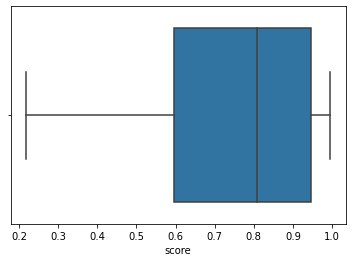

In [17]:
import seaborn as sns
sns.boxplot(x=df.score)

<AxesSubplot:xlabel='score'>

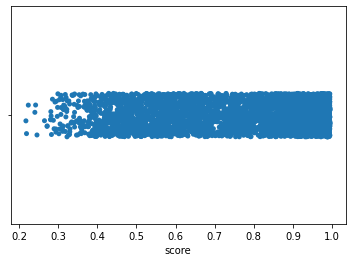

In [18]:
sns.stripplot(x=df.score)

<AxesSubplot:xlabel='score'>

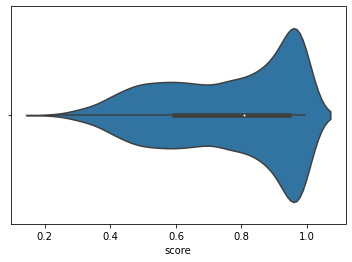

In [19]:
sns.violinplot(x=df.score)

<AxesSubplot:xlabel='score'>

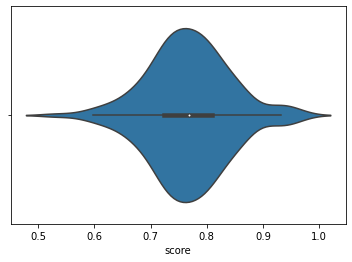

In [20]:
sns.violinplot(x=df.groupby("source").score.mean())

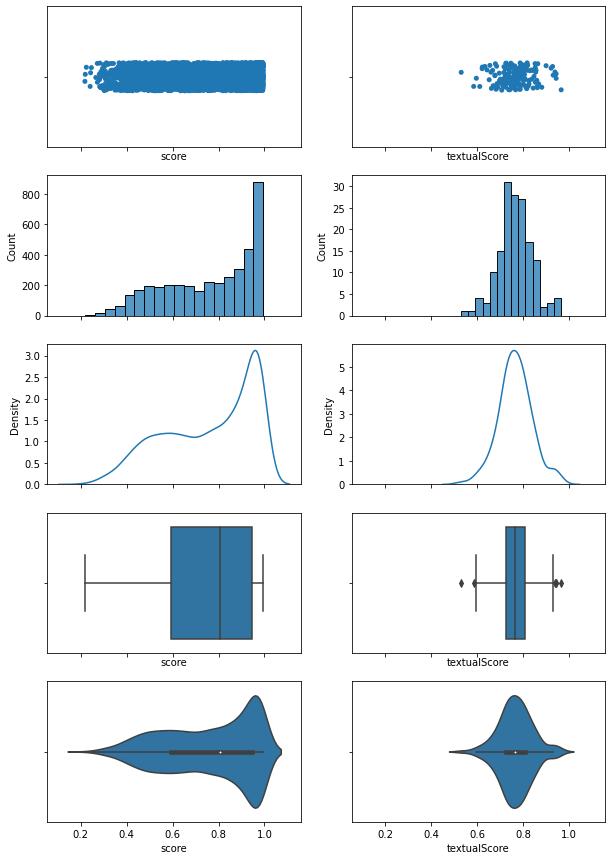

In [21]:
import matplotlib.pyplot as plt
f, axes = plt.subplots(5,2, figsize=(10,15), sharex=True)

for i,f in enumerate([sns.stripplot, sns.histplot, sns.kdeplot, sns.boxplot, sns.violinplot]):
    for j,d in enumerate([df.score, df.rename(columns=dict(score="textualScore")).groupby("source").textualScore.mean()]):
        f(x=d, ax=axes[i, j])

In [22]:
df.groupby("source").score.mean().reset_index()[["score"]].rename(columns={"score":"textualScore"})

textualScore
0        0.813205
1        0.685687
2        0.809620
3        0.800835
4        0.731424
..            ...
154      0.772159
155      0.844647
156      0.714356
157      0.670670
158      0.797801

[159 rows x 1 columns]

<AxesSubplot:>

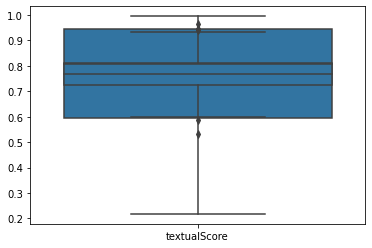

In [23]:
ax = sns.boxplot(data=df[["score"]]) #, x="score")
sns.boxplot(data=df.groupby("source").score.mean().reset_index()[["score"]].rename(columns={"score":"textualScore"}), ax=ax)